### Main results notebook for thesis

This notebook contains most/all of the main results from my Master's thesis, and some more probably.

#### Loading data

I used my own pre-downloaded peaks data for this (containing 'peaks', 'peak_basics', some other stuff), so obviously to replicate you may need to use midway. Have provided some semblance of what that might look like in that case if so.

Note, don't load all of these peaks datasets all at once, each is like 2GB+ and I definitely crashed my kernel and computer once or twice doing that. I had to process a couple at a time using the data_selection file, save those locally, and then clear the cache and reload just the pS2s, DEs, S1s (though you really just need the times for these, right now), and veto regions (not implemented yet?). You might have a better PC than me though, idk

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib.ticker as ticker
import os
import tqdm as tqdm

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

#Offline use:
sys.path.append('C:/Users/conor/Documents/Github/Project/plugins')
import model as mod

# #Screw you and your memory usage
# peaks_031693 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031693.npy",allow_pickle = True)
# peaks_031691 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031691.npy",allow_pickle = True)
# peaks_031690 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031690.npy",allow_pickle = True)
# peaks_031688 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031688.npy",allow_pickle = True)
# peaks_031687 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031687.npy",allow_pickle = True)
# peaks_031686 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031686.npy",allow_pickle = True)
# peaks_031685 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031685.npy",allow_pickle = True)
# peaks_031684 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031684.npy",allow_pickle = True)
# peaks_031683 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031683.npy",allow_pickle = True)
# peaks_031682 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031682.npy",allow_pickle = True)
# peaks_031681 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031681.npy",allow_pickle = True)
# peaks_031680 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031680.npy",allow_pickle = True)
# peaks_031679 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031679.npy",allow_pickle = True)

runs = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/runs.npy",allow_pickle = True)

#Note that only 'runs' uses pandas cause I needed to assign the column names in a nice and easy way. 
#Pandas hates the formatting of the 'peaks' data from straxen, specifically the 'data' data-type (like waveform stuff), 
#so everything else just had to be some kind of structured numpy array.
#I guess I could have made runs with numpy also, ¯\_(ツ)_/¯

#On Midway or whatever:
# import getpass
# user = getpass.getuser()
# sys.path.append('/home/{user}/project_code/plugins') #Midway 

# runs = np.load("/home/{user}/project_code/strax_data/runs.npy", allow_pickle = True)
# peaks_031693 = np.load("/home/{user}/project_code/strax_data/peaks_031693.npy", allow_pickle = True)
#Etc.

#Configure runs
runs_df = pd.DataFrame(runs, columns = ["name", "number", "mode", "end", "source", "start", "tags", 
                                        "livetime", "peak_basics_available", "peaks_available", "event_basics_available"])


In [3]:
"""
The below lines are just here as an example of how to run the data_selection function(s), not the full thing.
Selecting from Keerthana's works in a similar way, except doesn't return vetos (just run the other one if you want them I guess)

Note obviously you need to be on midway or whatever to get the vetos, and original peaks data (which also won't include certain data-types)
If you're on midway then just pass the run_id array alone (not just the run number! You will DIE!)
I might later provide the code to find the runs I used, we shall see. TODO

You will want to only run a couple of these at a time (and save the outputs as e.g. .npy files like I've done it), 
unless you're on midway and have requested a load of RAM or whatever, as otherwise your kernel might/will crash, as I have discovered
"""

# pS2s_031693, DEs_031693, _, peaks_031693, _ = ds.data_selection_new(runs_df.iloc[5], peaks_031693)

# np.save("C:/Users/conor/Documents/Github/Project/processed_data/pS2s_031693.npy", pS2s_031693)
# np.save("C:/Users/conor/Documents/Github/Project/processed_data/DEs_031693.npy", DEs_031693)
# np.save("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031693_fixed.npy", peaks_031693_fixed)



"\nThe below lines are just here as an example of how to run the data_selection function(s), not the full thing.\nSelecting from Keerthana's works in a similar way, except doesn't return vetos (just run the other one if you want them I guess)\n\nNote obviously you need to be on midway or whatever to get the vetos, and original peaks data (which also won't include certain data-types)\nIf you're on midway then just pass the run_id array alone (not just the run number! You will DIE!)\nI might later provide the code to find the runs I used, we shall see. TODO\n\nYou will want to only run a couple of these at a time (and save the outputs as e.g. .npy files like I've done it), \nunless you're on midway and have requested a load of RAM or whatever, as otherwise your kernel might/will crash, as I have discovered\n"

In [3]:
base_path = "C:/Users/conor/Documents/Github/Project/processed_data"

exclude = {31689, 31692}
run_ids = [r for r in range(31679, 31694) if r not in exclude]
run_ids = sorted(run_ids, reverse=True)  # Sort in descending order

pS2s_list, DEs_list, S1s_list = [], [], []
pS2s_ku_list, DEs_ku_list = [], []

for run_id in run_ids: 
    run_str = f"{run_id:06d}"
    pS2s_list.append(np.load(f"{base_path}/pS2s_{run_str}.npy", allow_pickle=True))
    DEs_list.append(np.load(f"{base_path}/DEs_{run_str}.npy", allow_pickle=True))
    S1s_list.append(np.load(f"{base_path}/S1s_{run_str}.npy", allow_pickle=True))
    # vetos_list.append(np.load(f"{base_path}/vetos_{run_str}.npy", allow_pickle=True))
    pS2s_ku_list.append(np.load(f"{base_path}/pS2s_ku_{run_str}.npy", allow_pickle=True))
    DEs_ku_list.append(np.load(f"{base_path}/DEs_ku_{run_str}.npy", allow_pickle=True))

print(f"Loaded runs: {', '.join(f'{r:06d}' for r in run_ids)}")

DEs_all = np.concatenate(DEs_list)
pS2s_all = np.concatenate(pS2s_list)
# S1s_all = np.concatenate(S1s_list)
# pS2s_ku_all = np.concatenate(pS2s_ku_list)
# DEs_ku_all = np.concatenate(DEs_ku_list)

#TODO: Incorporate vetos into code 


Loaded runs: 031693, 031691, 031690, 031688, 031687, 031686, 031685, 031684, 031683, 031682, 031681, 031680, 031679


### Some plots which may or may not be in the thesis

In [ ]:
#How many cut by e-bursts
percent_list = []
for pS2s in pS2s_list:
    before = len(pS2s)
    pS2s = (pS2s[~((pS2s['range_50p_area'] > 4e4) & (pS2s['area'] < 2e6))])
    after = len(pS2s)
    # print(f"Removed {before - after} peaks from run due to new data cut.")
    # print(f"This represents {(before - after)/before*100:.2f}% of the peaks in this run.")
    percent = (before - after)/before*100
    percent_list.append(percent)

average_percent = sum(percent_list) / len(percent_list)
print(f"On average, {average_percent:.3f}% of peaks were removed across all runs due to the new data cut.")

On average, 1.002% of peaks were removed across all runs due to the new data cut.


In [141]:
#Time assignments

def diffs_s2_to_se(s2_peaks, se_peaks):
    """Assign each se peak to the s2 that comes directly before it in time
    
    s2_peaks = input array of S2 signals with a "time" column 
    se_peaks = input array of SE signals with a "time" column

    Returns three arrays:
    1. The indices of the S2s that each SE has been assigned to
    2. The time differences between each SE and the S2 directly before it
    3. An array of all SE peaks that have been assigned to an S2
    """    
    assigned_indices = np.searchsorted(s2_peaks["time"], se_peaks["time"]) -1
    #"-1" removes SEs at beginning of run since otherwise would assign it to S2 at end of run
                                                                    
    valid_indices = assigned_indices[assigned_indices>= 0]                     

    se_no_s2 = len(assigned_indices) - len(valid_indices) #In current runID this is 0? valid_indices is all of assigned_indices

    time_diffs = se_peaks["time"][se_no_s2:] - s2_peaks["time"][valid_indices]  

    assigned_se_peaks = se_peaks[se_no_s2:]
    return valid_indices, time_diffs, assigned_se_peaks


assigned_se_indices_list, time_diffs_se_list, se_peaks_new_list = [], [], []

for i in range(len(runs_df)):
    assigned_se_indices, time_diffs_se, se_peaks_new = diffs_s2_to_se(pS2s_list[i], DEs_list[i])
    assigned_se_indices_list.append(assigned_se_indices)
    time_diffs_se_list.append(time_diffs_se)
    se_peaks_new_list.append(se_peaks_new)

time_diffs_se_all = np.concatenate(time_diffs_se_list)

1.624737330905291
-8314548.823515972


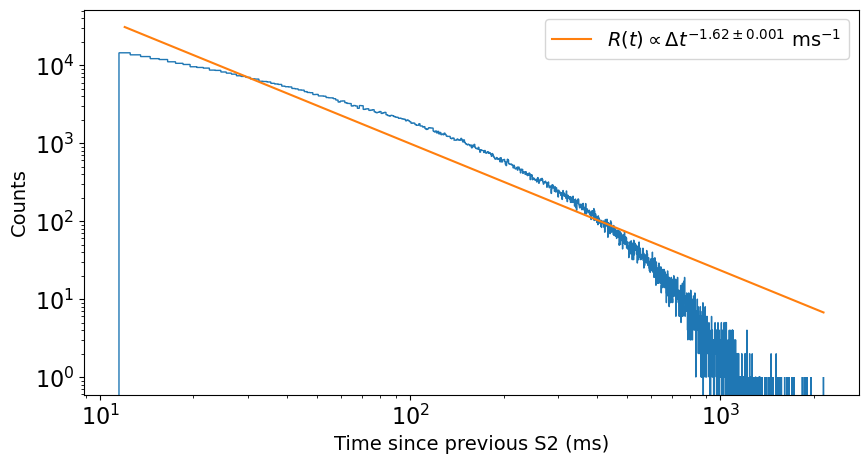

In [145]:
#Basic power law

from iminuit import Minuit, cost 

time_to_fit = time_diffs_se_all*1e-6 #Rename time_diffs_se for our power law, and multiply to get in ms

# time_to_fit_cut = time_diffs_se_cut*1e-6 #Rename time_diffs_se_cut for our power law, and multiply to get in ms
resolution_ms = 1 #Just to adjust resolution of data for fitting/visualising

n_bins = int(((np.max(time_to_fit)-np.min(time_to_fit))/resolution_ms))
bin_edges = np.linspace(np.min(time_to_fit), np.max(time_to_fit), n_bins)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
hist, bin_edges = np.histogram(time_to_fit, bins = bin_edges)

hist_power, bin_edges_power = np.histogram(time_to_fit, bins = np.linspace(np.min(time_to_fit), np.max(time_to_fit), n_bins))
bin_centers_power = (bin_edges_power[:-1] + bin_edges_power[1:])/2

#plotting just to check
# fig,ax = plt.subplots(1,1,figsize=(15,5))
# ax.hist(bin_centers_power, bins = bin_edges_power, weights = hist_power, histtype="step")
# ax.set_title("Histogram of SE signal counts vs time since previous S2")
# ax.set_xlabel("Time since previous S2 (ms)")
# ax.set_ylabel("Counts")
# ax.set_xscale("log")
# ax.set_yscale("log")

# ax.axvline(6.9, color='r', linestyle='dashed', linewidth=1)

def power_law_pdf(t, n, t_min):
    t = np.asarray(t)
    pdf_values = np.zeros_like(t)
    mask = t >= t_min
    pdf_values[mask] = (((n-1)/t_min)*(t[mask]/t_min)**(-n))
    return pdf_values

def power_law_pdf_ext(t, n, t_min, s, k):
    t = np.asarray(t)
    return s + k * (np.max(t) - t_min), s * power_law_pdf(t, n, t_min) + k #Not entirely sure where Keerthana has gotten some of this from?
#What does s+k*(np.max(t)-t_min) do? Is it just a normalisation factor?

c = cost.ExtendedUnbinnedNLL(time_to_fit, power_law_pdf_ext)
m = Minuit(c, n=1.5, t_min=11.5, s=1, k=0)
m.fixed["t_min"] = True
m.limits["n"] = (1.000001, 10)
m.limits["k"] = (0, None)
bin_fit = m.values
m.migrad()
m.hesse()


fig,ax = plt.subplots(1, 1, figsize=(10, 5))

model = power_law_pdf_ext(bin_centres, n = bin_fit["n"], 
                          t_min = bin_fit["t_min"], s = bin_fit["s"], 
                          k = bin_fit["k"])[1]*resolution_ms

ax.hist(bin_centres, bins = bin_edges, weights = hist, histtype = "step")
# ax.plot(bin_centres, model, label="Fit")
ax.set_xscale("log")
ax.set_yscale("log")
# Format in scientific notation
s_val = bin_fit['s']
s_err = m.errors['s']

# Format both values in scientific notation
s_val_str = f"{s_val:.3e}"   # e.g. '4.00e+05'
s_err_str = f"{s_err:.3e}"   # e.g. '2.00e+02'

# Convert '4.00e+05' → '4.00 × 10^{5}' for LaTeX
def sci_notation_to_latex(s):
    base, exp = s.split('e')
    exp = int(exp)
    return fr"{base} \times 10^{{{exp}}}"

s_val_tex = sci_notation_to_latex(s_val_str)
s_err_tex = sci_notation_to_latex(s_err_str)

label = (
    fr"$R(t) \propto"
    fr"\Delta t^{{-{bin_fit['n']:.2f} \pm {m.errors['n']:.3f}}}\ \mathrm{{ms}}^{{-1}}$"
)

ax.plot(bin_centres, model, label=label)


ax.legend(fontsize=14)

plt.xlabel("Time since previous S2 (ms)", fontsize=14)
plt.ylabel("Counts", fontsize=14)
# plt.title("Power law fit to histogram of SE signal counts vs time since last S2, exluding prompt electrons")

print(m.values["n"])
print(m.fval)

1.0446041472782797
3.1895751979660982


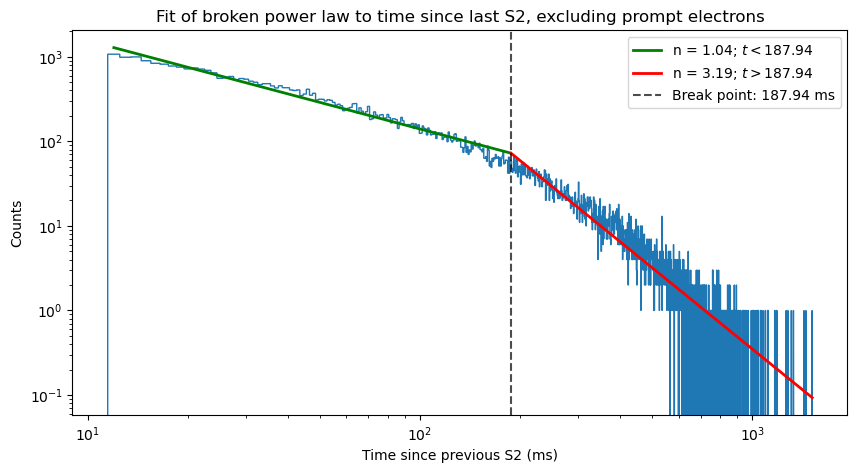

In [ ]:
#Broken power law

def broken_power_law_pdf(t, n1, n2,  t_min, t_b, s, k):
    t = np.asarray(t)
    x1 = (t_b**(1-n1))/(1-n1)
    x2 = (t_min**(1-n1))/(1-n1)
    #x2 = (t_min**(1-n1))/(n1-1) #Keerthana's version
    x3 = (t_b**(1-n1))/(n2-1)
    a = 1/(x1-x2+x3)
    #a = 1/(x1+x2+x3) #Keerthana's version

    def segment1(t):
        pdf1 = np.zeros_like(t)
        mask = t>=t_min
        pdf1[mask] = a*(t[mask])**(-n1)
        return pdf1
    
    def segment2(t):
        return a*((t_b)**(n2-n1))*((t)**(-n2))
    
    # Apply piecewise function for the CDF
    pdf = np.piecewise(t, 
                       [t < t_b, t >= t_b], 
                       [segment1, segment2])
    
    return s + k*(np.max(t)-t_min), s*pdf + k

def broken_power_model_val(t, p):
    """Just a wrap around function to set the values of the variables"""
    s, k, n1, n2, t_min, t_b = p
    return broken_power_law_pdf(bin_centres, s, k, n1, n2, t_min, t_b)

c = cost.ExtendedUnbinnedNLL(time_to_fit, broken_power_law_pdf)
m = Minuit(c, n1 = 1.4, n2 = 1.4, t_min = 11.5, t_b = 50, s = 1, k = 0)
m.fixed["t_min"] = True
m.limits["t_b"] = (11.5, np.max(time_to_fit))
m.limits["n1"] = (1.000001, 10)
m.limits["n2"] = (1.000001, 10)
m.limits["k"] = (0, None)
broken_fit = m.values
m.migrad()
m.hesse()

fig,ax = plt.subplots(1, 1, figsize=(10, 5))

# Split bin_centres based on the break point
mask_n1 = bin_centres < broken_fit["t_b"]
mask_n2 = bin_centres >= broken_fit["t_b"]

# Calculate the full model
full_model = broken_power_law_pdf(bin_centres, n1 = broken_fit["n1"], 
                                  n2 = broken_fit["n2"], t_min = broken_fit["t_min"], 
                                  t_b = broken_fit["t_b"], s = broken_fit["s"],
                                  k = broken_fit["k"])[1] * resolution_ms

ax.hist(bin_centres, bins = bin_edges, weights = hist, histtype = "step")

# Plot the n1 segment in green
ax.plot(bin_centres[mask_n1], full_model[mask_n1], color='green', 
        label=fr"n = {broken_fit['n1']:.2f}; $t < {broken_fit['t_b']:.2f}$", linewidth=2)

# Plot the n2 segment in red  
ax.plot(bin_centres[mask_n2], full_model[mask_n2], color='red', 
        label=fr"n = {broken_fit['n2']:.2f}; $t > {broken_fit['t_b']:.2f}$", linewidth=2)

# Add a vertical line at the break point
ax.axvline(broken_fit["t_b"], color='black', linestyle='--', alpha=0.7, 
           label=f"Break point: {broken_fit['t_b']:.2f} ms")

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
plt.xlabel("Time since previous S2 (ms)")
plt.ylabel("Counts")
plt.title("Fit of broken power law to time since last S2, excluding prompt electrons")

print(m.values["n1"])
print(m.values["n2"])

### Fiducial volume stuff

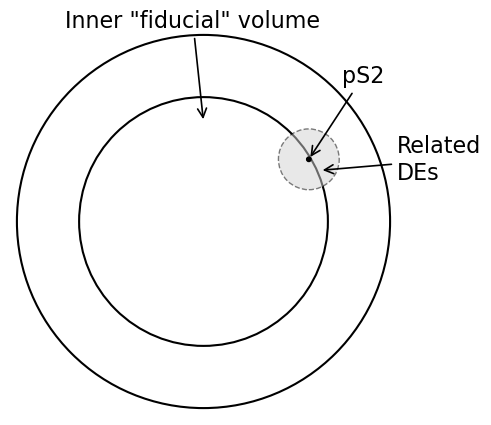

In [489]:
#Fiducialisation diagram

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')

# --- Parameters (toy values) ---
center = (0, 0)
fiducial_radius = 4.5
outer_radius = 6.75

# Place the pS2 right on the edge of the fiducial volume
theta = 30  # degrees
import numpy as np
s2_pos = ((fiducial_radius - 0.1) * np.cos(np.deg2rad(theta)),
          fiducial_radius * np.sin(np.deg2rad(theta)))

related_de_radius = 1.1  # DE region size

# --- Draw detector boundaries ---
outer_circle = patches.Circle(center, outer_radius, fill=False, lw=1.5, color='black')
fiducial_circle = patches.Circle(center, fiducial_radius, fill=False, lw=1.5, color='black')

# --- Draw pS2 and related DEs ---
ps2_dot = plt.Circle(s2_pos, 0.08, color='black', zorder=3)
related_de_circle = patches.Circle(s2_pos, related_de_radius, facecolor='lightgray',
                                   edgecolor='black', linestyle='--', alpha=0.5, zorder=2)

# Add to plot
ax.add_patch(outer_circle)
ax.add_patch(fiducial_circle)
ax.add_patch(related_de_circle)
ax.add_patch(ps2_dot)

# --- Labels ---
# Inner fiducial volume label
ax.annotate('Inner "fiducial" volume', xy=(0, fiducial_radius -0.9), xytext = (-5, 7),
            arrowprops=dict(arrowstyle='->', lw=1.2), fontsize=16)

# pS2 label
ax.annotate('pS2', xy=s2_pos, xytext=(5, 5),
            arrowprops=dict(arrowstyle='->', lw=1.2), fontsize=16)
# Related DEs label
ax.annotate('Related\nDEs', xy=(s2_pos[0] + 0.4, s2_pos[1] - 0.4),
            xytext=(7, 1.5),
            arrowprops=dict(arrowstyle='->', lw=1.2), fontsize=16)

# --- Style ---
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.axis('off')

plt.tight_layout()
plt.show()


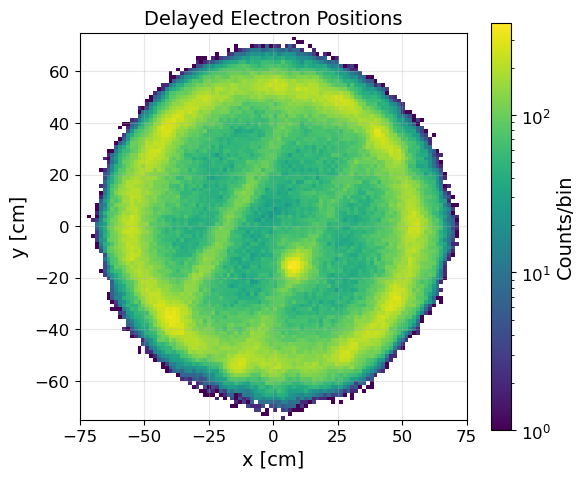

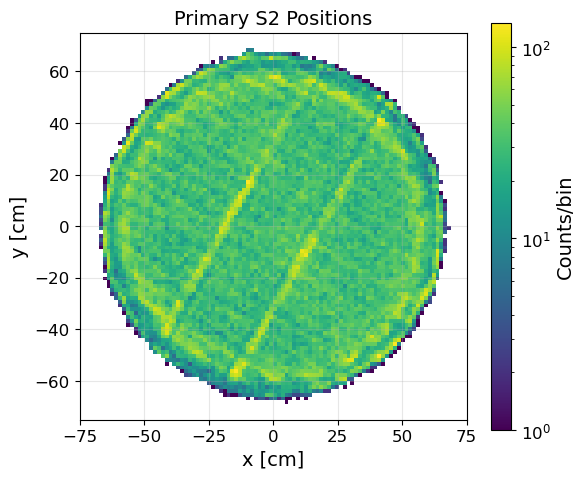

In [ ]:
#DE and pS2 xy density plots
#Some/most of this from Noah's code I believe? I've linked his github somewhere for sure
from matplotlib.colors import LogNorm

def plot_xy_density_single(peaks, title="Event density", bins=100, range_xy=(-75, 75), cmap='viridis', log=True):
    """
    Plot 2D histogram of event density (x vs y) for a given peak dataset.

    Parameters
    ----------
    peaks : structured array
        Peaks with fields ['x', 'y'].
    title : str
        Title for the plot.
    bins : int or [int, int]
        Number of bins in x and y.
    range_xy : tuple or [[xmin, xmax], [ymin, ymax]]
        Axis range in cm (or relevant coordinate units).
    cmap : str
        Matplotlib colormap.
    log : bool
        If True, apply logarithmic color normalization.
    """

    fig, ax = plt.subplots(figsize=(6, 5))

    # Determine ranges
    if isinstance(range_xy[0], (int, float)):
        range_xy = [[range_xy[0], range_xy[1]], [range_xy[0], range_xy[1]]]

    # Plot 2D histogram
    norm = LogNorm() if log else None
    h = ax.hist2d(
        peaks['x_mlp'], peaks['y_mlp'],
        bins=bins,
        range=range_xy,
        cmap=cmap,
        norm=norm
    )

    ax.set_title(title)
    ax.set_xlabel("x [cm]", fontsize=14)
    ax.set_ylabel("y [cm]", fontsize=14)
    ax.set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(h[3], ax=ax)
    cbar.set_label("Counts/bin")

    plt.tight_layout()
    plt.show()
    return fig, ax


fig_de, ax_de = plot_xy_density_single(
    DEs_all, #.flatten() maybe?
    title="Delayed Electron Positions",
    bins=100,
    range_xy=(-75, 75),
)

fig_ps2, ax_ps2 = plot_xy_density_single(
    pS2s_all, #.flatten() maybe?
    title="Primary S2 Positions",
    bins=100,
    range_xy=(-75, 75),
)

Processing run 31693...
Processing run 31691...
Processing run 31690...
Processing run 31688...
Processing run 31687...
Processing run 31686...
Processing run 31685...
Processing run 31684...
Processing run 31683...
Processing run 31682...
Processing run 31681...
Processing run 31680...
Processing run 31679...


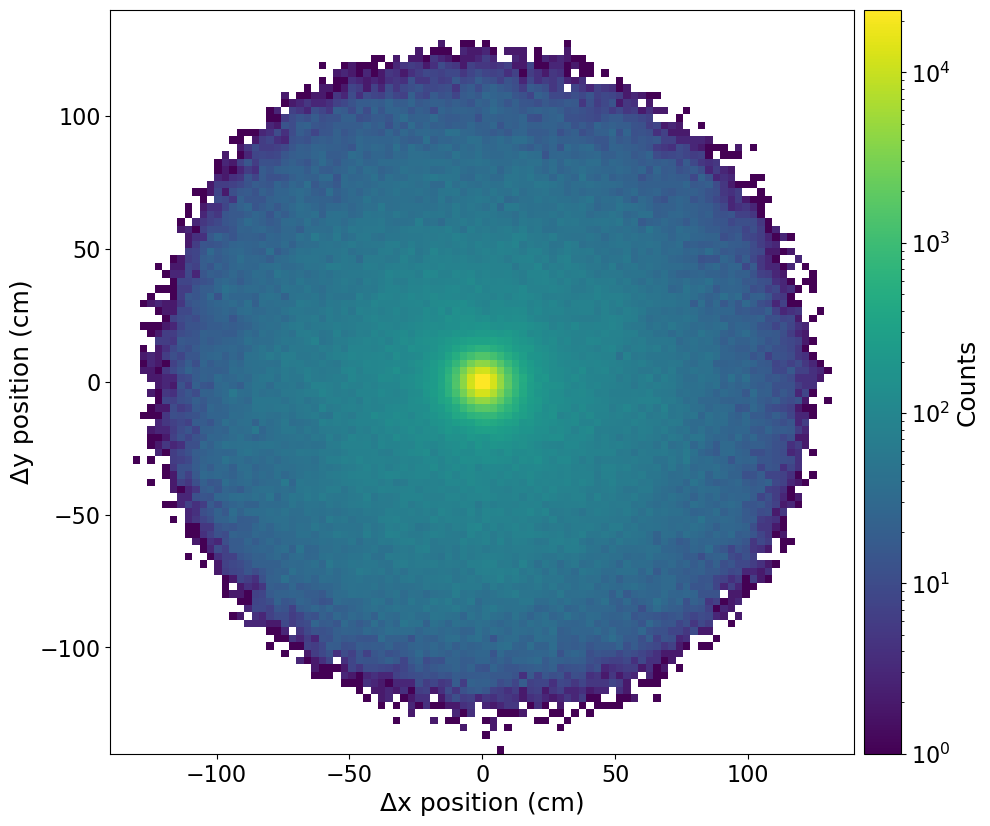

In [ ]:
#Actual position-correlated electrons plot
#Again from Noah's code, adapted to be over all runs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as mcolors
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
def adjust_positions(peaks):
    """
    Adjusts orientation of x and y positions
    """
    peaks = peaks.copy()
    theta = -np.pi/6
    x_original = peaks['x_mlp'].copy()
    y_original = peaks['y_mlp'].copy()
    
    peaks['x_mlp'] = (np.cos(theta) * x_original) + (np.sin(theta) * y_original)
    peaks['y_mlp'] = (-np.sin(theta) * x_original) + (np.cos(theta) * y_original)
    return peaks

# Lists to collect all position differences across runs
all_pos_diffs_x = []
all_pos_diffs_y = []
all_rotated_pos_diffs_x = []
all_rotated_pos_diffs_y = []

# Process each run individually
for i, run_id in enumerate(run_ids):
    print(f"Processing run {run_id}...")
    
    # Get data for this specific run
    pS2s_run = pS2s_list[i]
    DEs_run = DEs_list[i]
    
    # Find matching peaks for this run
    assigned_indices = np.searchsorted(pS2s_run["time"], DEs_run["time"]) - 1
    valid_mask = assigned_indices >= 0
    valid_indices = assigned_indices[valid_mask]
    
    assigned_de_peaks = DEs_run[valid_mask]
    
    # Calculate position differences for this run
    pos_diffs_x = assigned_de_peaks["x_mlp"] - pS2s_run["x_mlp"][valid_indices]
    pos_diffs_y = assigned_de_peaks["y_mlp"] - pS2s_run["y_mlp"][valid_indices]
    
    # Apply rotation and calculate rotated differences
    rotated_DEs = adjust_positions(DEs_run)
    rotated_pS2s = adjust_positions(pS2s_run)
    rotated_pos_diffs_x = rotated_DEs["x_mlp"][valid_mask] - rotated_pS2s["x_mlp"][valid_indices]
    rotated_pos_diffs_y = rotated_DEs["y_mlp"][valid_mask] - rotated_pS2s["y_mlp"][valid_indices]
    
    # Collect results
    all_pos_diffs_x.extend(pos_diffs_x)
    all_pos_diffs_y.extend(pos_diffs_y)
    all_rotated_pos_diffs_x.extend(rotated_pos_diffs_x)
    all_rotated_pos_diffs_y.extend(rotated_pos_diffs_y)
    
    # print(f"  Found {len(pos_diffs_x)} valid pairs")

# Convert to numpy arrays
all_pos_diffs_x = np.array(all_pos_diffs_x)
all_pos_diffs_y = np.array(all_pos_diffs_y)
all_rotated_pos_diffs_x = np.array(all_rotated_pos_diffs_x)
all_rotated_pos_diffs_y = np.array(all_rotated_pos_diffs_y)

# print(f"Total pairs across all runs: {len(all_pos_diffs_x)}")

# Create the plot with all combined data
fig, ax = plt.subplots(figsize=(10, 10))

hist, xedges, yedges = np.histogram2d(all_pos_diffs_x, all_pos_diffs_y, 
                                      bins=(100, 100),
                                      range=([[-140, 140], [-140, 140]]))

image = ax.pcolormesh(xedges, yedges, hist.T, cmap='viridis', norm=mcolors.LogNorm())
ax.set_aspect('equal')
ax.set_xlabel('Δx position (cm)', fontsize=18)
ax.set_ylabel('Δy position (cm)', fontsize=18)
# ax.set_title(f'Position Differences: {len(all_pos_diffs_x)} pairs')

# Create divider for existing axes
divider = make_axes_locatable(ax)

# Add colorbar axes with same height as main plot
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
cbar = fig.colorbar(image, cax=cax)
cbar.ax.tick_params(labelsize=16)  # Colorbar ticks
cbar.set_label('Counts', fontsize=18)

plt.tight_layout()
plt.show()

Processing run 31693...
Processing run 31691...
Processing run 31690...
Processing run 31688...
Processing run 31687...
Processing run 31686...
Processing run 31685...
Processing run 31684...
Processing run 31683...
Processing run 31682...
Processing run 31681...
Processing run 31680...
Processing run 31679...


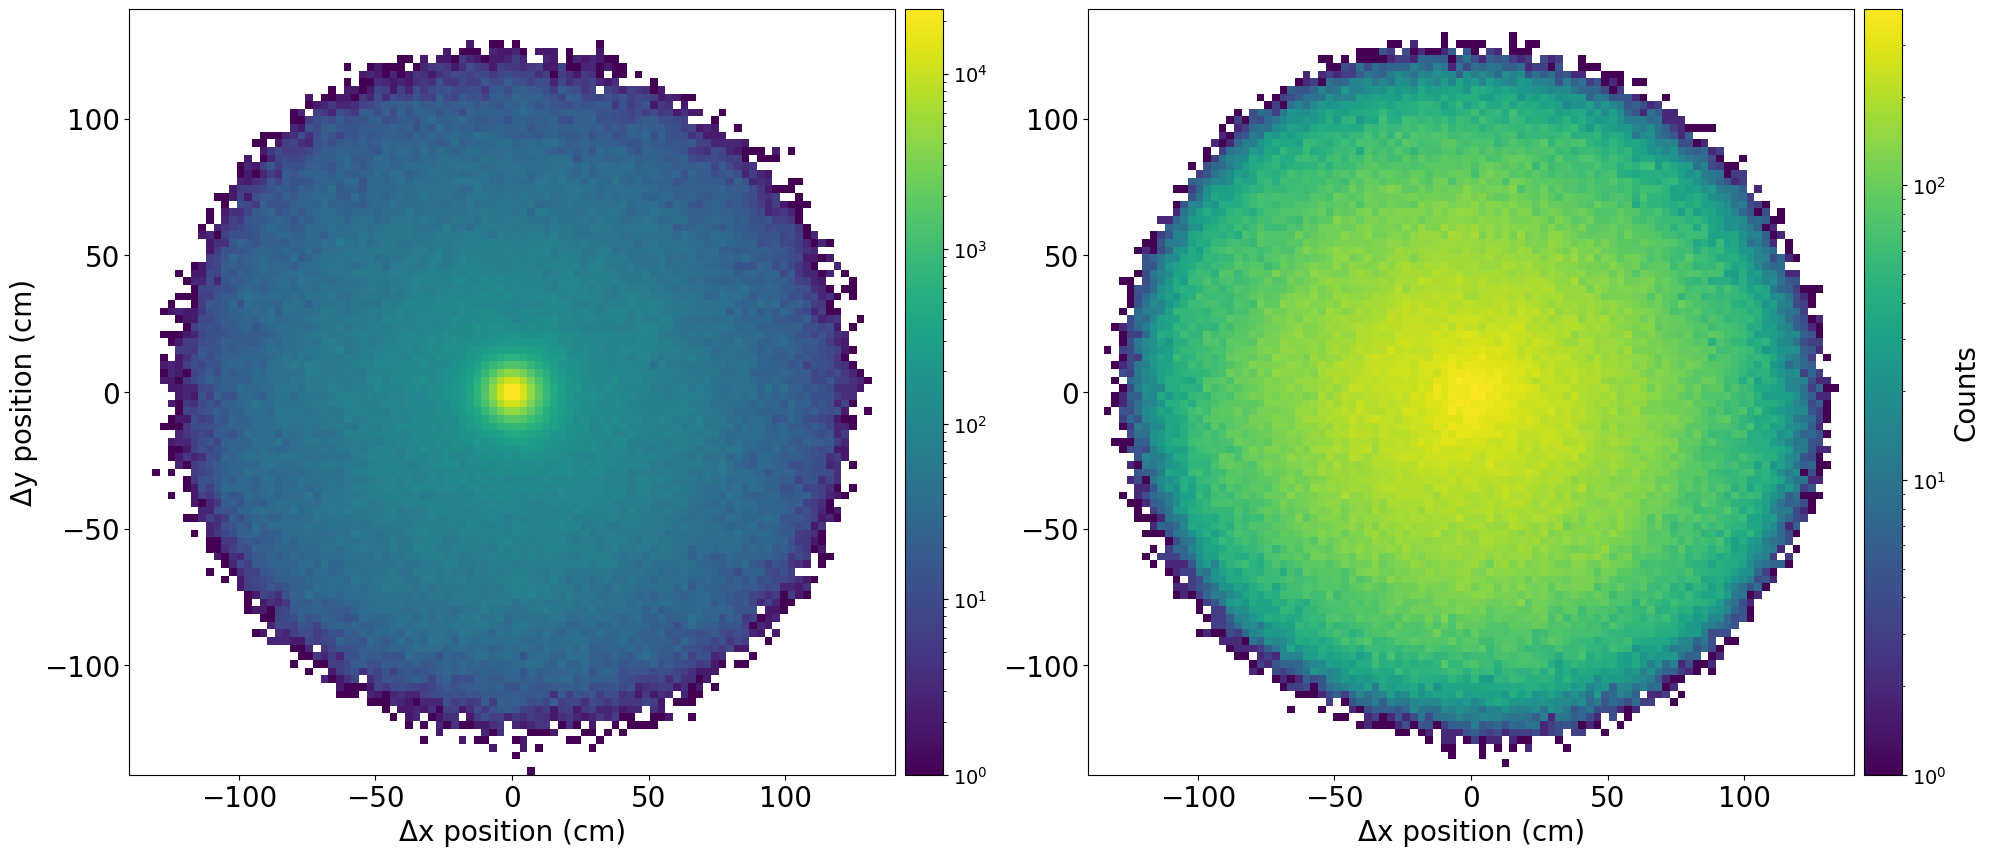

In [614]:
# Position-correlated electrons and uncorrelated background for all runs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

def adjust_positions(peaks):
    """
    Adjusts orientation of x and y positions
    """
    peaks = peaks.copy()
    theta = -np.pi/6
    x_original = peaks['x_mlp'].copy()
    y_original = peaks['y_mlp'].copy()
    
    peaks['x_mlp'] = (np.cos(theta) * x_original) + (np.sin(theta) * y_original)
    peaks['y_mlp'] = (-np.sin(theta) * x_original) + (np.cos(theta) * y_original)
    return peaks

def random_assignments(de_peaks, pS2s):
    """
    Randomly assigns DE peaks to pS2s and returns the position differences.
    """
    assigned_indices = np.random.choice(len(pS2s), size=len(de_peaks), replace=True)
    pos_diffs_x = np.subtract(de_peaks["x_mlp"], pS2s["x_mlp"][assigned_indices])
    pos_diffs_y = np.subtract(de_peaks["y_mlp"], pS2s["y_mlp"][assigned_indices])
    return pos_diffs_x, pos_diffs_y

# Lists to collect all position differences across runs
all_pos_diffs_x = []
all_pos_diffs_y = []
all_rotated_pos_diffs_x = []
all_rotated_pos_diffs_y = []
all_rand_x = []
all_rand_y = []
all_rand_x_rot = []
all_rand_y_rot = []

# Process each run individually
for i, run_id in enumerate(run_ids):
    print(f"Processing run {run_id}...")
    
    # Get data for this specific run
    pS2s_run = pS2s_list[i]
    DEs_run = DEs_list[i]
    
    # Find matching peaks for this run
    assigned_indices = np.searchsorted(pS2s_run["time"], DEs_run["time"]) - 1
    valid_mask = assigned_indices >= 0
    valid_indices = assigned_indices[valid_mask]

    assigned_de_peaks = DEs_run[valid_mask]
    
    # Calculate position differences for this run
    pos_diffs_x = assigned_de_peaks["x_mlp"] - pS2s_run["x_mlp"][valid_indices]
    pos_diffs_y = assigned_de_peaks["y_mlp"] - pS2s_run["y_mlp"][valid_indices]
    
    # Apply rotation and calculate rotated differences
    rotated_DEs = adjust_positions(DEs_run)
    rotated_pS2s = adjust_positions(pS2s_run)
    rotated_pos_diffs_x = rotated_DEs["x_mlp"][valid_mask] - rotated_pS2s["x_mlp"][valid_indices]
    rotated_pos_diffs_y = rotated_DEs["y_mlp"][valid_mask] - rotated_pS2s["y_mlp"][valid_indices]
    
    # Calculate random assignments for background (unrotated)
    rand_x, rand_y = random_assignments(assigned_de_peaks, pS2s_run)
    
    # Calculate random assignments for background (rotated)
    rand_x_rot, rand_y_rot = random_assignments(rotated_DEs[valid_mask], rotated_pS2s)
    
    # Collect results
    all_pos_diffs_x.extend(pos_diffs_x)
    all_pos_diffs_y.extend(pos_diffs_y)
    all_rotated_pos_diffs_x.extend(rotated_pos_diffs_x)
    all_rotated_pos_diffs_y.extend(rotated_pos_diffs_y)
    all_rand_x.extend(rand_x)
    all_rand_y.extend(rand_y)
    all_rand_x_rot.extend(rand_x_rot)
    all_rand_y_rot.extend(rand_y_rot)

# Convert to numpy arrays
all_pos_diffs_x = np.array(all_pos_diffs_x)
all_pos_diffs_y = np.array(all_pos_diffs_y)
all_rotated_pos_diffs_x = np.array(all_rotated_pos_diffs_x)
all_rotated_pos_diffs_y = np.array(all_rotated_pos_diffs_y)
all_rand_x = np.array(all_rand_x)
all_rand_y = np.array(all_rand_y)
all_rand_x_rot = np.array(all_rand_x_rot)
all_rand_y_rot = np.array(all_rand_y_rot)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Correlated delayed electrons (unrotated)
hist_correlated, xedges, yedges = np.histogram2d(all_pos_diffs_x, all_pos_diffs_y, 
                                      bins=(100, 100),
                                      range=([[-140, 140], [-140, 140]]))

im1 = axes[0].pcolormesh(xedges, yedges, hist_correlated.T, cmap='viridis', norm=mcolors.LogNorm())
axes[0].set_aspect('equal')
axes[0].set_xlabel('Δx position (cm)', fontsize=20)
axes[0].set_ylabel('Δy position (cm)', fontsize=20)
# axes[0].set_title('Correlated Delayed Electrons\n(Time-matched pairs)', fontsize=18)

divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
cbar1 = fig.colorbar(im1, cax=cax1)
cbar1.ax.tick_params(labelsize=14)
# cbar1.set_label('Counts', fontsize=20)

# Plot 2: Uncorrelated background (unrotated)
hist_background, xedges, yedges = np.histogram2d(all_rand_x, all_rand_y, 
                                      bins=(100, 100),
                                      range=([[-140, 140], [-140, 140]]))

im2 = axes[1].pcolormesh(xedges, yedges, hist_background.T, cmap='viridis', norm=mcolors.LogNorm())
axes[1].set_aspect('equal')
axes[1].set_xlabel('Δx position (cm)', fontsize=20)
# axes[1].set_ylabel('Δy position (cm)', fontsize=20)
# axes[1].set_title('Uncorrelated Background\n(Random pairings)', fontsize=18)

divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
cbar2 = fig.colorbar(im2, cax=cax2)
cbar2.ax.tick_params(labelsize=14)
cbar2.set_label('Counts', fontsize=20)

plt.tight_layout()
plt.show()

Processing run 31693...
Processing run 31691...
Processing run 31690...
Processing run 31688...
Processing run 31687...
Processing run 31686...
Processing run 31685...
Processing run 31684...
Processing run 31683...
Processing run 31682...
Processing run 31681...
Processing run 31680...
Processing run 31679...
Optimal cut radius for 99% correlated acceptance: 11.01 cm


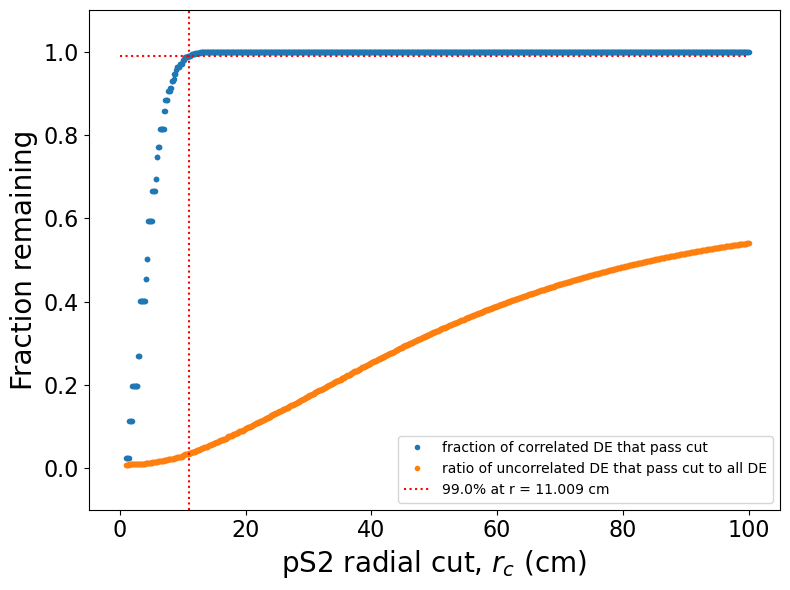

In [618]:
#Fig 3 or 4 in Noah's note

import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

def adjust_positions(peaks):
    """
    Adjusts orientation of x and y positions
    """
    peaks = peaks.copy()
    theta = -np.pi/6
    x_original = peaks['x_mlp'].copy()
    y_original = peaks['y_mlp'].copy()
    
    peaks['x_mlp'] = (np.cos(theta) * x_original) + (np.sin(theta) * y_original)
    peaks['y_mlp'] = (-np.sin(theta) * x_original) + (np.cos(theta) * y_original)
    return peaks

def random_assignments(DEs, pS2s, n_randomizations=1):
    """
    Create random assignments between DEs and pS2s for background estimation
    """
    rand_x, rand_y = [], []
    
    for _ in range(n_randomizations):
        # Shuffle the pS2 positions
        shuffled_indices = np.random.permutation(len(pS2s))
        shuffled_pS2s_x = pS2s["x_mlp"][shuffled_indices]
        shuffled_pS2s_y = pS2s["y_mlp"][shuffled_indices]
        
        # Assign each DE to a random pS2 - handle different array lengths
        n_assignments = min(len(DEs), len(pS2s))
        rand_x.extend(DEs["x_mlp"][:n_assignments] - shuffled_pS2s_x[:n_assignments])
        rand_y.extend(DEs["y_mlp"][:n_assignments] - shuffled_pS2s_y[:n_assignments])
    
    return np.array(rand_x), np.array(rand_y)

# Lists to collect all position differences across runs
all_rotated_pos_diffs_x = []
all_rotated_pos_diffs_y = []
all_rand_x_rot = []
all_rand_y_rot = []

# Process each run individually
for i, run_id in enumerate(run_ids):
    print(f"Processing run {run_id}...")
    
    # Get data for this specific run
    pS2s_run = pS2s_list[i]
    DEs_run = DEs_list[i]
    assigned_indices = np.searchsorted(pS2s_run["time"], DEs_run["time"]) - 1
    valid_mask = assigned_indices >= 0
    valid_indices = assigned_indices[valid_mask]
    
    # Apply rotation
    rotated_DEs = adjust_positions(DEs_run)
    rotated_pS2s = adjust_positions(pS2s_run)
    
    # Calculate rotated position differences for true matches
    rotated_pos_diffs_x = rotated_DEs["x_mlp"][valid_mask] - rotated_pS2s["x_mlp"][valid_indices]
    rotated_pos_diffs_y = rotated_DEs["y_mlp"][valid_mask] - rotated_pS2s["y_mlp"][valid_indices]
    
    # Calculate random assignments for background
    rand_x_rot, rand_y_rot = random_assignments(rotated_DEs[valid_mask], rotated_pS2s)
    
    # Collect results
    all_rotated_pos_diffs_x.extend(rotated_pos_diffs_x)
    all_rotated_pos_diffs_y.extend(rotated_pos_diffs_y)
    all_rand_x_rot.extend(rand_x_rot)
    all_rand_y_rot.extend(rand_y_rot)

# Convert to numpy arrays
all_rotated_pos_diffs_x = np.array(all_rotated_pos_diffs_x)
all_rotated_pos_diffs_y = np.array(all_rotated_pos_diffs_y)
all_rand_x_rot = np.array(all_rand_x_rot)
all_rand_y_rot = np.array(all_rand_y_rot)

# Now run Noah's analysis on the combined data
fig, ax = plt.subplots(figsize=(8, 6))

x_bins = 200
y_bins = 200
(xmin, xmax) = (-140, 140)
(ymin, ymax) = (-140, 140)
x_bins_edges = np.linspace(xmin, xmax, x_bins)
y_bins_edges = np.linspace(ymin, ymax, y_bins)

hist_true, xedges, yedges = np.histogram2d(all_rotated_pos_diffs_x, all_rotated_pos_diffs_y, 
                                        bins=(x_bins_edges, y_bins_edges))
hist_background, xedges, yedges = np.histogram2d(all_rand_x_rot, all_rand_y_rot,
                                        bins=(x_bins_edges, y_bins_edges))

ax.set_xlabel(r'pS2 radial cut, $r_c$ (cm)', fontsize=20)
ax.set_ylabel('Fraction remaining', fontsize=20)

x = xedges[1:] - (xedges[1]-xedges[0])/2
y = yedges[1:] - (yedges[1]-yedges[0])/2

r = np.array([[np.sqrt(i**2 + j**2) for i in y] for j in x])
theta = np.array([[np.arctan2(j, i) for i in y] for j in x])

interp = RegularGridInterpolator((x, y), hist_background)

bounds = (0, [2*np.pi, 10, 10, np.inf, 2])
approx_scale = np.average(hist_true[(r>25)&(r<100)])/np.average(hist_background[(r>25)&(r<100)])
guess = [0, 3, 3, abs(np.max(hist_true)-approx_scale*np.max(hist_background)), approx_scale]

def gauss2d(xy, theta, sx, sy, A, scale):
    x, y = xy
    background = interp((x, y))
    a = np.cos(theta)**2/(2*sx**2)+np.sin(theta)**2/(2*sy**2)
    b = np.sin(2*theta)/(4*sx**2)-np.sin(2*theta)/(4*sy**2)
    c = np.sin(theta)**2/(2*sx**2)+np.cos(theta)**2/(2*sy**2)
    result = scale*background + A*np.exp(-(a*x**2+2*b*x*y +c*y**2))
    return result.ravel()

def no_background_gauss2d(xy, theta, sx, sy, A):
    x, y = xy
    a = np.cos(theta)**2/(2*sx**2)+np.sin(theta)**2/(2*sy**2)
    b = np.sin(2*theta)/(4*sx**2)-np.sin(2*theta)/(4*sy**2)
    c = np.sin(theta)**2/(2*sx**2)+np.cos(theta)**2/(2*sy**2)
    result = A*np.exp(-(a*x**2+2*b*x*y +c*y**2))
    return result.ravel()

x_mesh, y_mesh = np.meshgrid(x, y)
try:
    popt, pcov = curve_fit(gauss2d, (x_mesh, y_mesh), (hist_true).T.ravel(), p0=guess, bounds=bounds)
    scale = popt[-1]
    data_fitted = gauss2d((x_mesh, y_mesh), *popt)
    data_fitted = data_fitted.reshape(x_bins-1, y_bins-1).T
    background_fitted = scale*interp((x_mesh, y_mesh)).T
    correlated = no_background_gauss2d((x_mesh, y_mesh), *popt[:-1])
    correlated = correlated.reshape(x_bins-1, y_bins-1).T

    cut_boundary = np.linspace(1, 100, 1000)
    accept = []
    unwanted = []
    corr = True  # Set to True for correlated DEs, False for uncorrelated DEs
    
    for bound in cut_boundary:
        if corr:
            accept.append(np.sum(correlated[r < bound])/np.sum(correlated))
            unwanted.append(np.sum(background_fitted[r < bound])/(np.sum(background_fitted[r < bound])+np.sum(correlated[r < bound])))
            label_accept = 'fraction of correlated DE that pass cut'
            label_unwanted = 'ratio of uncorrelated DE that pass cut to all DE'
            intercept = np.array(accept)
            intercept[intercept < .99] = 100
            intercept = cut_boundary[np.argmin(intercept)]
            percent = .99
            correlation = 'correlated'
        else:
            accept.append(np.sum(background_fitted[r > bound])/np.sum(background_fitted))
            unwanted.append(np.sum(correlated[r > bound])/(np.sum(background_fitted[r > bound])+np.sum(correlated[r > bound])))
            label_accept = 'fraction of uncorrelated DE that pass cut'
            label_unwanted = 'ratio of correlated DE that pass cut to all DE'
            intercept = np.array(unwanted)
            intercept[intercept > .01] = 0
            intercept = cut_boundary[np.argmax(intercept)]
            percent = .01
            correlation = 'uncorrelated'
    
    ax.set_ylim(-0.1, 1.1)
    ax.plot(cut_boundary, accept, '.', label=label_accept)
    ax.plot(cut_boundary, unwanted, '.', label=label_unwanted)
    ax.plot([0, 100], [percent]*2, 'r:', label=f'{percent*100}% at r = {intercept:.3f} cm')
    ax.plot([intercept]*2, [-0.1, 1.1], 'r:')
    ax.legend(ncol=1)
    # ax.set_title(f'Position Correlation Analysis - {len(run_ids)} runs, {len(all_rotated_pos_diffs_x)} pairs')
    
    print(f"Optimal cut radius for 99% correlated acceptance: {intercept:.2f} cm")
    
except Exception as e:
    print(f"Error in curve fitting: {e}")
    # Fallback: simple radius calculation
    radii = np.sqrt(all_rotated_pos_diffs_x**2 + all_rotated_pos_diffs_y**2)
    containment_99 = np.percentile(radii, 99)
    print(f"Simple 99% containment radius: {containment_99:.2f} cm")
    
    # Plot simple version
    ax.plot([containment_99]*2, [-0.1, 1.1], 'r:', label=f'99% containment: {containment_99:.2f} cm')
    ax.legend(fontsize=18)

plt.tight_layout()
plt.show()


Step 3.5: Creating 1D radial projection...


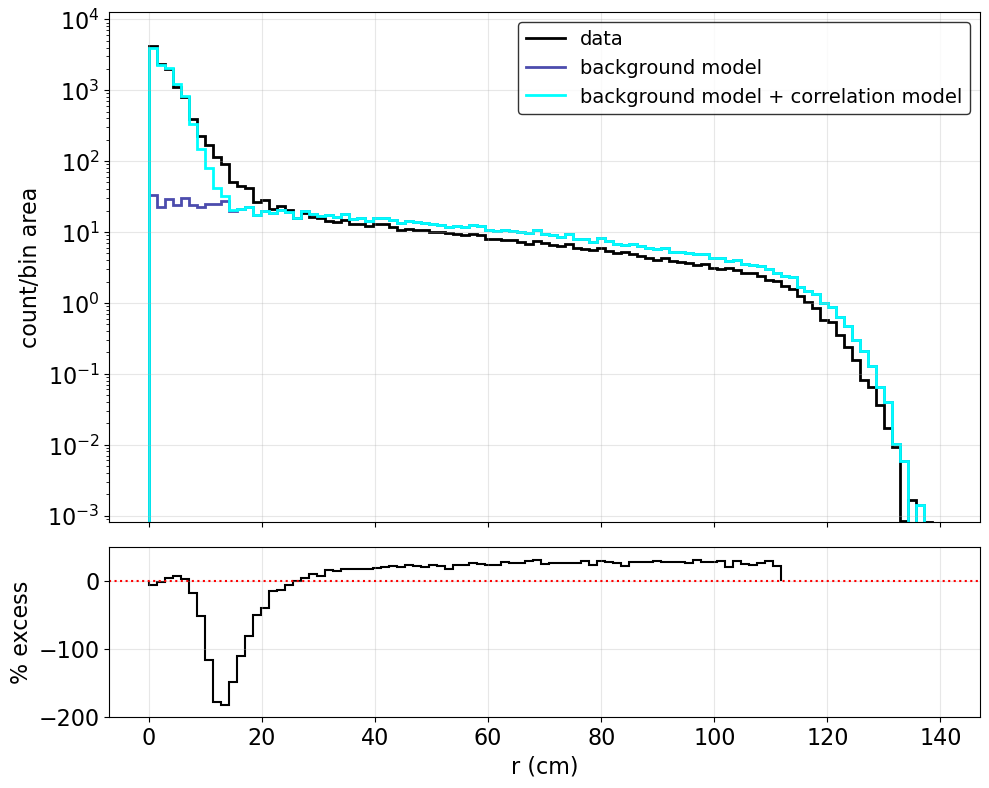

1D radial projection created successfully!
  Mean excess in fit region: 31.0%


In [608]:
# Gaussian fit to 1D radial projection, Fig. 2 in Noah's note

print("\nStep 3.5: Creating 1D radial projection...")

# Use the same binning as the 2D fit
x_bins = 200
y_bins = 200
(xmin, xmax) = (-140, 140)
(ymin, ymax) = (-140, 140)
x_bins_edges = np.linspace(xmin, xmax, x_bins)
y_bins_edges = np.linspace(ymin, ymax, y_bins)

x = x_bins_edges[1:] - (x_bins_edges[1]-x_bins_edges[0])/2
y = y_bins_edges[1:] - (y_bins_edges[1]-y_bins_edges[0])/2

# Calculate r and theta for each bin
r = np.array([[np.sqrt(i**2 + j**2) for i in y] for j in x])
theta = np.array([[np.arctan2(j, i) for i in y] for j in x])

# Get the fitted components (you already have these from the fit)
x_mesh, y_mesh = np.meshgrid(x, y)
data_fitted = gauss2d((x_mesh, y_mesh), *popt)
data_fitted = data_fitted.reshape(x_bins-1, y_bins-1).T
background_fitted = scale*interp((x_mesh, y_mesh)).T
correlated = no_background_gauss2d((x_mesh, y_mesh), *popt[:-1])
correlated = correlated.reshape(x_bins-1, y_bins-1).T

# Now create 1D radial projection
bins_1d = np.linspace(0, 140, 100)
bin_width_1d = bins_1d[1] - bins_1d[0]

# For proper normalization, we need to account for annular bin areas
bins2 = bins_1d**2
correction = np.pi * (bins2[1:] - bins2[:-1])  # Area of each annular bin

# Project the 2D histograms onto 1D by summing over radial bins
hist_binned = []
background_binned = []
data_binned = []

for i, b in enumerate(bins_1d[1:]):
    b_old = bins_1d[i]
    # Sum all 2D bins that fall within this radial range
    mask = (r >= b_old) & (r < b) & (r > 0)
    hist_binned.append(np.sum(hist_true.T[mask]))
    background_binned.append(np.sum(background_fitted[mask]))
    data_binned.append(np.sum(data_fitted[mask]))

hist_binned = np.array(hist_binned)
background_binned = np.array(background_binned)
data_binned = np.array(data_binned)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), 
                                gridspec_kw={'height_ratios': [3, 1]},
                                sharex=True)

# Top panel: data and fits (normalized by bin area)
ax1.stairs(hist_binned / correction, bins_1d, 
           color='black', linewidth=2, label='data')
ax1.stairs(background_binned / correction, bins_1d,
           color='darkblue', linewidth=2, label='background model', alpha=0.7)
ax1.stairs(data_binned / correction, bins_1d, 
           color='cyan', linewidth=2, label='background model + correlation model')

ax1.set_ylabel('count/bin area', fontsize=16)
ax1.set_yscale('log')
# Set y-limits to avoid issues with zero bins
ymin_plot = 1/correction[-1] if correction[-1] > 0 else 1e-3
ymax_plot = 3 * np.max(hist_binned / correction)
ax1.set_ylim(ymin_plot, ymax_plot)
ax1.legend(fontsize=14, frameon=True, facecolor='white', edgecolor='black')
ax1.grid(alpha=0.3)
ax1.tick_params(labelsize=16)

# Bottom panel: residuals (% excess)
# Calculate: 100 * (model - data) / model

# Avoid division by zero or tiny numbers
valid_mask = data_binned > 1e-8  # only consider bins with nonzero model counts

excess = np.zeros_like(data_binned, dtype=float)
excess[valid_mask] = 100 * (data_binned[valid_mask] - hist_binned[valid_mask]) / data_binned[valid_mask]

# excess = 100 * (data_binned.astype(np.float32) - hist_binned.astype(np.float32)) / data_binned.astype(np.float32)
# Handle division by zero or invalid values
# excess[np.isnan(excess) | np.isinf(excess) | (data_binned < 1e-8)] = 0

# Only plot up to ~80% of the range to avoid edge effects
term = int(len(bins_1d) * 0.2)
ax2.stairs(excess[:-term], bins_1d[:-term], 
           color='black', linewidth=1.5)
ax2.axhline(0, color='red', linestyle=':', linewidth=1.5)
ax2.set_xlabel('r (cm)', fontsize=16)
ax2.set_ylabel('% excess', fontsize=16)
ax2.set_ylim(-200, 50)
ax2.grid(alpha=0.3)
ax2.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

print("1D radial projection created successfully!")
print(f"  Mean excess in fit region: {np.mean(np.abs(excess[:-term])):.1f}%")

C:\Users\conor\AppData\Local\Temp\ipykernel_16136\737114188.py:87: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x_smooth, y_smooth, 'r-', linewidth=1.5, alpha=0.8, linestyle = '--')


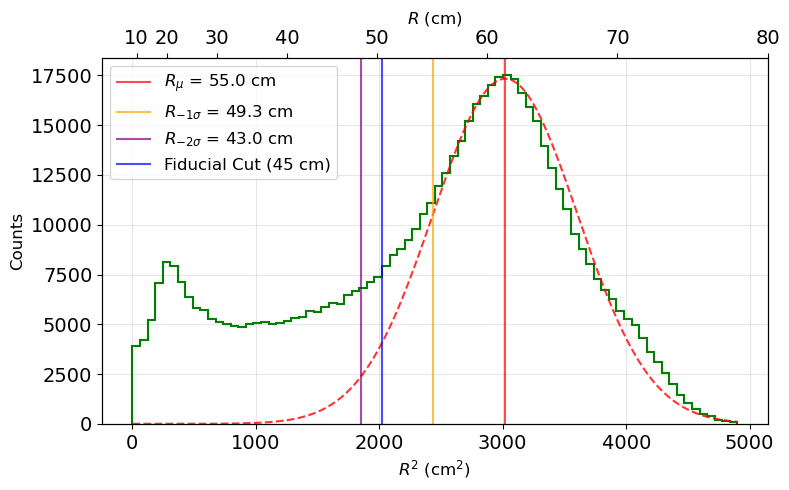

Fitted Gaussian parameters:
  Amplitude: 17332.5
  Mean (r²): 3019.72 cm²
  Sigma (r²): 586.06 cm²

Peak radius: r = 54.952 cm
Peak r²: 3019.72 cm²
r at -1σ: 49.332 cm
r at -2σ: 42.984 cm
Uncertainty in r: ±0.112 cm


In [ ]:
#Gaussian fit to wall peak

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, amp, mu, sigma):
    """Gaussian function for fitting."""
    return amp * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def fit_wall_peak(DE, bins=100, range_r=None, fit_range_r2=None, logy=False):
    """
    Fit a Gaussian to the wall events peak and visualize.
    
    Parameters
    ----------
    DE : structured array
        Dataset with field 'r' (radius in cm).
    bins : int
        Number of histogram bins.
    range_r : tuple, optional
        (r_min, r_max) in cm for the histogram.
    fit_range_r2 : tuple, optional
        (r2_min, r2_max) in cm² for the Gaussian fit region.
        If None, uses the full range.
    logy : bool
        If True, use a logarithmic y-scale.
        
    Returns
    -------
    r_peak : float
        Radius (cm) at which the Gaussian peaks.
    r2_peak : float
        r² value at which the Gaussian peaks.
    popt : array
        Fitted parameters [amplitude, mean, sigma].
    """
    # Compute r^2
    r2 = DE['r'] ** 2
    
    if range_r is None:
        range_r = (0, np.max(DE['r']))
    range_r2 = (range_r[0]**2, range_r[1]**2)
    
    # Create histogram
    counts, edges = np.histogram(r2, bins=bins, range=range_r2)
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    
    # Determine fit range
    if fit_range_r2 is None:
        fit_mask = np.ones(len(bin_centers), dtype=bool)
    else:
        fit_mask = (bin_centers >= fit_range_r2[0]) & (bin_centers <= fit_range_r2[1])
    
    # Initial guess for Gaussian parameters
    max_idx = np.argmax(counts[fit_mask])
    mu_guess = bin_centers[fit_mask][max_idx]
    amp_guess = counts[fit_mask][max_idx]
    sigma_guess = 100  # Initial guess for width
    
    # Fit Gaussian
    try:
        popt, pcov = curve_fit(
            gaussian, 
            bin_centers[fit_mask], 
            counts[fit_mask],
            p0=[amp_guess, mu_guess, sigma_guess],
            maxfev=10000
        )
        
        # Extract results
        r2_peak = popt[1]
        r_peak = np.sqrt(r2_peak)
        sigma_r2 = popt[2]
        
        # Calculate r values at mean and 1, 2 sigma inward
        r_mean = r_peak
        r_1sigma = np.sqrt(r2_peak - sigma_r2)
        r_2sigma = np.sqrt(r2_peak - 2*sigma_r2)
        
        # Create smooth curve for plotting (full range)
        x_smooth = np.linspace(range_r2[0], range_r2[1], 1000)
        y_smooth = gaussian(x_smooth, *popt)
        
        # Plot
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.hist(r2, bins=bins, range=range_r2, histtype='step', color='green', 
                linewidth=1.5)
        ax.plot(x_smooth, y_smooth, 'r-', linewidth=1.5, alpha=0.8, linestyle = '--')
        
        # Plot vertical lines for mean and sigma values
        ax.axvline(r2_peak, color='red', linestyle='-', alpha=0.7, linewidth=1.5,
                  label=f'$R_μ$ = {r_mean:.1f} cm')
        ax.axvline(r_1sigma**2, color='orange', linestyle='-', alpha=0.7, linewidth=1.5,
                  label=f'$R_{{-1\\sigma}}$ = {r_1sigma:.1f} cm')
        ax.axvline(r_2sigma**2, color='purple', linestyle='-', alpha=0.7, linewidth=1.5,
                  label=f'$R_{{-2\\sigma}}$ = {r_2sigma:.1f} cm')
        ax.axvline(45**2, color='blue', linestyle='-', alpha=0.7, linewidth=1.5,
                  label='Fiducial Cut (45 cm)')

        ax.set_xlabel(r"$R^2$ (cm$^2$)", fontsize=12)
        ax.set_ylabel("Counts", fontsize=12)
        ax.legend(fontsize=12)
        ax.grid(alpha=0.3)
        
        # Add top axis for r values with proper scaling
        ax2 = ax.twiny()
        ax2.set_xlabel(r"$R$ (cm)", fontsize=12)
        
        # Get the r^2 limits from bottom axis
        r2_min, r2_max = ax.get_xlim()
        
        # Create nice tick positions in R space
        r_ticks = np.arange(10, np.sqrt(r2_max) + 10, 10)  # Ticks every 10 cm
        r2_ticks = r_ticks**2  # Convert to R^2 positions
        
        # Set the limits and ticks on the top axis
        ax2.set_xlim(r2_min, r2_max)
        ax2.set_xticks(r2_ticks)
        ax2.set_xticklabels([f'{int(r)}' for r in r_ticks])
        
        if logy:
            ax.set_yscale('log')
        
        plt.tight_layout()
        plt.show()
        
        # Print results
        print(f"Fitted Gaussian parameters:")
        print(f"  Amplitude: {popt[0]:.1f}")
        print(f"  Mean (r²): {popt[1]:.2f} cm²")
        print(f"  Sigma (r²): {popt[2]:.2f} cm²")
        print(f"\nPeak radius: r = {r_peak:.3f} cm")
        print(f"Peak r²: {r2_peak:.2f} cm²")
        print(f"r at -1σ: {r_1sigma:.3f} cm")
        print(f"r at -2σ: {r_2sigma:.3f} cm")
        
        # Estimate uncertainties
        perr = np.sqrt(np.diag(pcov))
        r_peak_err = 0.5 * perr[1] / np.sqrt(r2_peak)  # Error propagation
        print(f"Uncertainty in r: ±{r_peak_err:.3f} cm")
        
        return r_peak, r2_peak, popt, pcov
        
    except Exception as e:
        print(f"Fit failed: {e}")
        return None, None, None, None

# Example usage:
r_peak, r2_peak, popt, pcov = fit_wall_peak(
    DEs_all, 
    bins=80, 
    range_r=(0, 70),
    fit_range_r2=(2500, 3200)
)

NameError: name 'peak' is not defined

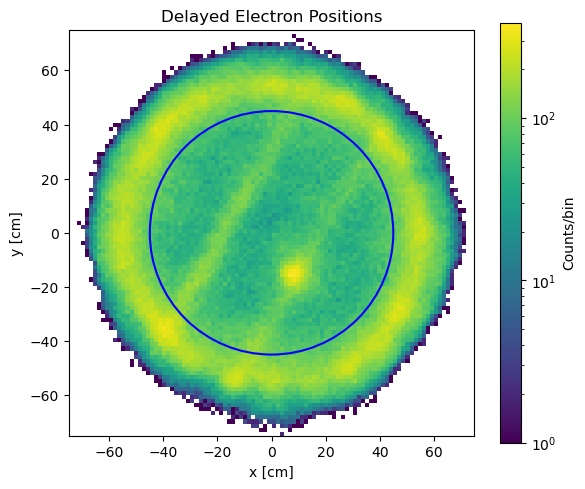

In [ ]:
#Plotting DE xy with wall fit circles

from matplotlib.colors import LogNorm
def plot_xy_density_single(peaks, title="Event density", bins=100, range_xy=(-75, 75), cmap='viridis', log=True):
    """
    Plot 2D histogram of event density (x vs y) for a given peak dataset.
    Parameters
    ----------
    peaks : structured array
        Peaks with fields ['x', 'y'].
    title : str
        Title for the plot.
    bins : int or [int, int]
        Number of bins in x and y.
    range_xy : tuple or [[xmin, xmax], [ymin, ymax]]
        Axis range in cm (or relevant coordinate units).
    cmap : str
        Matplotlib colormap.
    log : bool
        If True, apply logarithmic color normalization.
    """
    fig, ax = plt.subplots(figsize=(6, 5))
    # Determine ranges
    if isinstance(range_xy[0], (int, float)):
        range_xy = [[range_xy[0], range_xy[1]], [range_xy[0], range_xy[1]]]
    # Plot 2D histogram
    norm = LogNorm() if log else None
    h = ax.hist2d(
        peaks['x_mlp'], peaks['y_mlp'],
        bins=bins,
        range=range_xy,
        cmap=cmap,
        norm=norm
    )
    ax.set_title(title)
    ax.set_xlabel("x [cm]")
    ax.set_ylabel("y [cm]")
    ax.set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(h[3], ax=ax)
    cbar.set_label("Counts/bin")
    plt.tight_layout()
    # Don't show yet - return the figure and axis for further modification
    return fig, ax

fig_de, ax_de = plot_xy_density_single(
    DEs_all,
    title="Delayed Electron Positions",
    bins=100,
    range_xy=(-75, 75),
)

# Plot three rings on this plot: r_peak, r_1sigma, r_2sigma from the fit_wall_peak function above
# radii_to_plot = [r_peak, np.sqrt(popt[1] - popt[2]), np.sqrt(popt[1] - 2*popt[2])]
# colors = ['red', 'orange', 'purple', 'blue']
# labels = ['${r_peak}$', '$r_{-1\\sigma}$', '$r_{-2\\sigma}$']

# for radius, color, label in zip(radii_to_plot, colors, labels):
#     circle = plt.Circle((0, 0), radius, color=color, fill=False, linestyle='--', linewidth=1.5)
#     ax_de.add_patch(circle)

# peak = plt.Circle((0, 0), r_peak, color='red', fill=False, linestyle='--', linewidth=1.5)
fid = plt.Circle((0, 0), 45, color='blue', fill=False, linestyle='-', linewidth=1.5)
ax_de.add_patch(fid)
# ax_de.add_patch(peak)
ax_de.legend(loc='upper right')
plt.show()  # Show only once after all circles are added

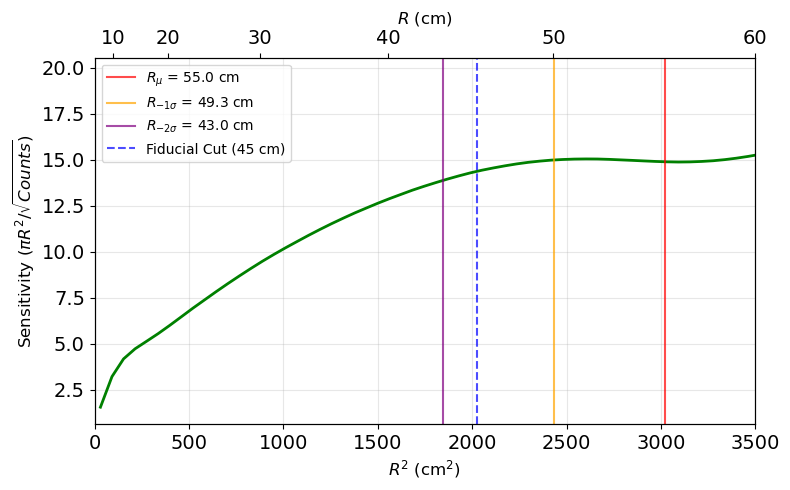

In [ ]:
# Sensitivity vs R^2 plot

def plot_sensitivity_vs_r2(DE, bins=100, range_r=(0, 70), r_peak=None, popt=None):
    """
    Plot sensitivity (area/sqrt(counts)) vs R^2.
    Uses cumulative counts: all events within radius R.
    
    Parameters
    ----------
    DE : structured array
        Dataset with field 'r' (radius in cm).
    bins : int
        Number of histogram bins.
    range_r : tuple
        (r_min, r_max) in cm for the histogram.
    r_peak : float, optional
        Peak radius from Gaussian fit for plotting reference line.
    popt : array, optional
        Fitted parameters [amplitude, mean, sigma] for plotting sigma lines.
    """
    # Compute r^2
    r2 = DE['r'] ** 2
    range_r2 = (range_r[0]**2, range_r[1]**2)
    
    # Create histogram
    counts, edges = np.histogram(r2, bins=bins, range=range_r2)
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    
    # Calculate cumulative counts (all events within radius R)
    cumulative_counts = np.cumsum(counts)
    
    # Calculate sensitivity: (pi * R^2) / sqrt(cumulative_counts)
    # This represents: area / statistical_uncertainty for all events up to radius R
    valid_mask = cumulative_counts > 0
    sensitivity = np.zeros_like(cumulative_counts, dtype=float)
    sensitivity[valid_mask] = (np.pi * bin_centers[valid_mask]) / np.sqrt(cumulative_counts[valid_mask])
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(bin_centers[valid_mask], sensitivity[valid_mask], 'g-', linewidth=2)
    
    # Add reference lines if fit parameters provided
    if r_peak is not None and popt is not None:
        r2_peak = popt[1]
        r_1sigma = np.sqrt(r2_peak - popt[2])
        r_2sigma = np.sqrt(r2_peak - 2*popt[2])
        
        ax.axvline(r2_peak, color='red', linestyle='-', alpha=0.7, linewidth=1.5,
                  label=f'$R_μ$ = {r_peak:.1f} cm')
        ax.axvline(r_1sigma**2, color='orange', linestyle='-', alpha=0.7, linewidth=1.5,
                  label=f'$R_{{-1\\sigma}}$ = {r_1sigma:.1f} cm')
        ax.axvline(r_2sigma**2, color='purple', linestyle='-', alpha=0.7, linewidth=1.5,
                  label=f'$R_{{-2\\sigma}}$ = {r_2sigma:.1f} cm')
        ax.axvline(45**2, color='blue', linestyle='--', alpha=0.7, linewidth=1.5,
                  label='Fiducial Cut (45 cm)')
    
    ax.set_xlim(0, 3500)
    ax.set_xlabel(r"$R^2$ (cm$^2$)", fontsize=12)
    ax.set_ylabel(r"Sensitivity ($\pi R^2 / \sqrt{Counts}$)", fontsize=12)
    ax.legend(fontsize=10, loc='upper left')
    ax.grid(alpha=0.3)
    
    # Add top axis for r values with proper scaling
    ax2 = ax.twiny()
    ax2.set_xlabel(r"$R$ (cm)", fontsize=12)
    
    # Get the r^2 limits from bottom axis
    r2_min, r2_max = ax.get_xlim()
    
    # Create nice tick positions in R space (start at 10 to avoid overlap with 0)
    r_ticks = np.arange(10, np.sqrt(r2_max) + 10, 10)
    r2_ticks = r_ticks**2
    
    # Set the limits and ticks on the top axis
    ax2.set_xlim(r2_min, r2_max)
    ax2.set_xticks(r2_ticks)
    ax2.set_xticklabels([f'{int(r)}' for r in r_ticks])
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Plot sensitivity
fig_sens, ax_sens = plot_sensitivity_vs_r2(
    DEs_all, 
    bins=80, 
    range_r=(0, 70),
    r_peak=r_peak,
    popt=popt
)

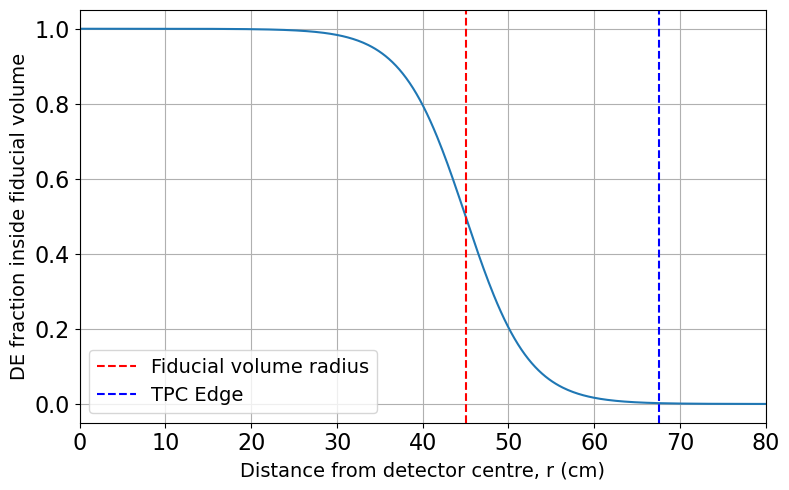

In [630]:
# Radial function graph
from scipy.special import expit

R = 45 # radius of fiducial volume (cm) -- Need to actually check this number
a = 11  # radius of position-correlation circle (cm)

# Generate r values and compute f(r)
r_values = np.linspace(0, 100, 500)
k = 3  # Increase this to make it steeper
f_values = np.array([expit(-k*(r - R)/a) for r in r_values])
# Plot
plt.figure(figsize=(8, 5))
plt.plot(r_values, f_values)
# plt.axvline(R - a, color='gray', linestyle='--', label = f'R - a, ({R - a}cm)')
# plt.axvline(R + a, color='gray', linestyle='--', label = f'R + a ({R + a}cm)')
plt.xlim(0, 80)
plt.xlabel('Distance from detector centre, r (cm)', fontsize=14)
plt.ylabel('DE fraction inside fiducial volume', fontsize=14)
plt.axvline(R, color = 'red', linestyle='--', label = 'Fiducial volume radius')
plt.axvline(67.5, color = 'blue', linestyle='--', label = 'TPC Edge')
plt.legend(fontsize = 14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
#Single electron calc real quick
single_electrons, double_electrons, rest = [], [], []
for i in range(len(DEs_list)):
    # print(f"Run {i}: {len(DEs_list[i])} SE times")
    single_electrons.append(len(DEs_list[i][DEs_list[i]['n_electron_rec'] == 1]))
    double_electrons.append(len(DEs_list[i][DEs_list[i]['n_electron_rec'] == 2]))
    rest.append(len(DEs_list[i][DEs_list[i]['n_electron_rec'] > 2]))
print("Average single electrons per run:", np.mean(single_electrons))
print("Fraction single electrons:", np.sum(single_electrons) / (np.sum(single_electrons) + + np.sum(double_electrons) + np.sum(rest)))
print("Fraction double electrons:", np.sum(double_electrons) / (np.sum(single_electrons) + np.sum(double_electrons) + np.sum(rest)))

Average single electrons per run: 43252.0
Fraction single electrons: 0.9208868274643331
Fraction double electrons: 0.0629613433762269


### Weird data?

In [5]:
# #Peak plotting function(s), mostly from straxen minianalysis somewhere, slightly adapted for subtypes and such

# from matplotlib.lines import Line2D

# def plot_peaks_new(run_id, peaks,
#                t_reference=None,
#                reference_position='center',
#                vetos=None,
#                seconds_range=None, time_range=None,
#                window_ms=5,
#                figsize=(12, 5),
#                ax=None, log=True,
#                disable_axis_offset=True):
#     """
#     Plot peak waveforms from a structured NumPy array, coloring by simplified subtype groups.
#     """

#     run_start = int(run_id['start'].value)  # ns since epoch

#     # Determine window boundaries in ns
#     if seconds_range is not None:
#         t_min_ns = int(seconds_range[0] * 1e9) + run_start
#         t_max_ns = int(seconds_range[1] * 1e9) + run_start
#     elif time_range is not None:
#         t_min_ns, t_max_ns = map(int, time_range)
#     elif t_reference is not None:
#         window_ns = int(window_ms * 1e6)  # ms → ns
#         if reference_position == 'center':
#             half = window_ns // 2
#             t_min_ns = t_reference - half
#             t_max_ns = t_reference + (window_ns - half)
#         elif reference_position == 'right':
#             t_min_ns = t_reference - window_ns
#             t_max_ns = t_reference
#         elif reference_position == 'left':
#             t_min_ns = t_reference
#             t_max_ns = t_reference + window_ns
#         elif isinstance(reference_position, float):
#             f = float(reference_position)
#             if not (0 <= f <= 1):
#                 raise ValueError("reference_position float must be in [0,1]")
#             t_min_ns = t_reference - int(f * window_ns)
#             t_max_ns = t_min_ns + window_ns
#         else:
#             raise ValueError("Invalid reference_position")
#     else:
#         raise ValueError("Must provide t_reference, seconds_range, or time_range")

#     if t_min_ns >= t_max_ns:
#         raise ValueError("Bad time range: t_min >= t_max")

#     # Select peaks
#     peak_selection = peaks[(peaks['time'] >= t_min_ns) & (peaks['time'] <= t_max_ns)]
#     if len(peak_selection) == 0:
#         print("No peaks in selected range.")
#         return None, None

#     # Create axis if needed
#     if ax is None:
#         fig, ax = plt.subplots(figsize=figsize)
#     else:
#         fig = ax.figure

#     # Group definitions
#     de_codes = {20, 21, 23, 271, 272, 273}
#     s1_codes = {10, 11, 12, 13, 28}
#     ps2_codes = {22, 24, 25, 261, 262, 29}

#     # Plot peaks
#     has_subtype = 'subtype' in peaks.dtype.names
#     for p in peak_selection:
#         subtype = p['subtype'] if has_subtype else 'unknown'
#         if subtype in de_codes:
#             colour = "green"
#         elif subtype in s1_codes:
#             colour = "red"
#         elif subtype in ps2_codes:
#             colour = "blue"
#         else:
#             colour = "grey"
#         plot_peak(p, ax=ax, t0=run_start, colour=colour)

#     # Convert ns → ms relative to run start for axis limits
#     t_min_plot = (t_min_ns - run_start) / 1e6
#     t_max_plot = (t_max_ns - run_start) / 1e6
#     ax.set_xlim(t_min_plot, t_max_plot)

#     # Labels
#     ax.set_xlabel("Time [ms since run start]")
#     ax.set_ylabel("Intensity [PE/ns]")

#     if log:
#         ax.set_yscale('log')
#         ax.set_ylim(1e-4, 1e4)

#     if disable_axis_offset:
#         ax.xaxis.get_major_formatter().set_useOffset(False)
#         ax.ticklabel_format(style='plain', useOffset=False, axis='x')

#     # Vetos
#     if vetos is not None:
#         for veto in vetos:
#             start_ms = veto['start(ms)']
#             end_ms = veto['end(ms)']
#             if (end_ms > t_min_plot) and (start_ms < t_max_plot):
#                 ax.axvspan(start_ms, end_ms, color='red', alpha=0.2)

#     # Vertical line at reference
#     if t_reference is not None:
#         ax.axvline((t_reference - run_start) / 1e6, color='orange', linestyle='--')

#     # Simplified legend
#     legend_elements = [
#         Line2D([0], [0], marker='o', color='w', label='S1', markerfacecolor='red', markersize=8),
#         Line2D([0], [0], marker='o', color='w', label='DE', markerfacecolor='green', markersize=8),
#         Line2D([0], [0], marker='o', color='w', label='pS2', markerfacecolor='blue', markersize=8)
#     ]
#     ax.legend(handles=legend_elements, loc='lower center', fontsize=10,
#               bbox_to_anchor=(0.5, -0.35), ncol=3, frameon=True)

#     return fig, ax

# def plot_peak(p, ax, t0=None, colour='gray'):
#     """Plot a single peak waveform."""
#     n = int(p['length'])
#     dt = float(p['dt'])
#     times_ns = int(p['time'])
#     if t0 is None:
#         t0 = 0

#     x = ((times_ns - t0) + np.arange(n) * dt) / 1e6  # ms since run start
#     y = p['data'][:n] / dt
#     ax.plot(x, y, drawstyle='steps-pre', color=colour, linewidth=1, alpha=0.8)

In [ ]:
#Define some functions - actual. Also mostly taken from straxen minianalysis
from matplotlib.lines import Line2D
def plot_peaks_new(run_id, peaks,
               t_reference=None,
               reference_position='center',
               vetos=None,
               seconds_range=None, time_range=None,
               window_ms=5,
               figsize=(12, 5),
               ax=None, log=True,
               disable_axis_offset=True):
    """
    Plot peak waveforms from a structured NumPy array, coloring by simplified subtype groups.
    """

    run_start = int(run_id['start'].value)  # ns since epoch

    # Determine window boundaries in ns
    if seconds_range is not None:
        t_min_ns = int(seconds_range[0] * 1e9) + run_start
        t_max_ns = int(seconds_range[1] * 1e9) + run_start
    elif time_range is not None:
        t_min_ns, t_max_ns = map(int, time_range)
    elif t_reference is not None:
        window_ns = int(window_ms * 1e6)  # ms → ns
        if reference_position == 'center':
            half = window_ns // 2
            t_min_ns = t_reference - half
            t_max_ns = t_reference + (window_ns - half)
        elif reference_position == 'right':
            t_min_ns = t_reference - window_ns
            t_max_ns = t_reference
        elif reference_position == 'left':
            t_min_ns = t_reference
            t_max_ns = t_reference + window_ns
        elif isinstance(reference_position, float):
            f = float(reference_position)
            if not (0 <= f <= 1):
                raise ValueError("reference_position float must be in [0,1]")
            t_min_ns = t_reference - int(f * window_ns)
            t_max_ns = t_min_ns + window_ns
        else:
            raise ValueError("Invalid reference_position")
    else:
        raise ValueError("Must provide t_reference, seconds_range, or time_range")

    if t_min_ns >= t_max_ns:
        raise ValueError("Bad time range: t_min >= t_max")

    # Select peaks
    peak_selection = peaks[(peaks['time'] >= t_min_ns) & (peaks['time'] <= t_max_ns)]
    if len(peak_selection) == 0:
        print("No peaks in selected range.")
        return None, None

    # Create axis if needed
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.figure

    # Group definitions
    de_codes = {20, 21, 23, 271, 272, 273}
    s1_codes = {10, 11, 12, 13, 28}
    ps2_codes = {22, 24, 25, 261, 262, 29}

    # Plot peaks
    has_subtype = 'subtype' in peaks.dtype.names
    for p in peak_selection:
        subtype = p['subtype'] if has_subtype else 'unknown'
        if subtype in de_codes:
            colour = "green"
        elif subtype in s1_codes:
            colour = "red"
        elif subtype in ps2_codes:
            colour = "blue"
        else:
            colour = "grey"
        # --- Change: use t_min_ns as reference so x starts at 0 ---
        plot_peak(p, ax=ax, t0=t_min_ns, colour=colour)

    # --- Change: x-axis in ms, starting from 0 ---
    t_window_ms = (t_max_ns - t_min_ns) / 1e6
    ax.set_xlim(0, t_window_ms)

    # Labels
    ax.set_xlabel("Time [ms since window start]", fontsize = 14)
    ax.set_ylabel("Intensity [PE/ns]", fontsize = 14)

    if log:
        ax.set_yscale('log')
        ax.set_ylim(1e-4, 1e4)

    if disable_axis_offset:
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.ticklabel_format(style='plain', useOffset=False, axis='x')

    # Vetos — shifted relative to window start
    if vetos is not None:
        for veto in vetos:
            start_ms = veto['start(ms)'] - (t_min_ns - run_start) / 1e6
            end_ms = veto['end(ms)'] - (t_min_ns - run_start) / 1e6
            if (end_ms > 0) and (start_ms < t_window_ms):
                ax.axvspan(start_ms, end_ms, color='red', alpha=0.2)

    # Vertical line at reference, shifted to window frame
    # if t_reference is not None:
        # ax.axvline((t_reference - t_min_ns) / 1e6, color='orange', linestyle='--')

    # Simplified legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='S1', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='DE', markerfacecolor='green', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='pS2', markerfacecolor='blue', markersize=8)
    ]
    # ax.legend(handles=legend_elements, loc='lower center', fontsize=10,
    #           bbox_to_anchor=(0.5, -0.35), ncol=3, frameon=True)

    return fig, ax


def plot_peak(p, ax, t0=None, colour='gray'):
    """Plot a single peak waveform."""
    n = int(p['length'])
    dt = float(p['dt'])
    times_ns = int(p['time'])
    if t0 is None:
        t0 = 0

    # --- Change: x relative to t0 (usually t_min_ns) in ms ---
    x = ((times_ns - t0) + np.arange(n) * dt) / 1e6
    y = p['data'][:n] / dt
    ax.plot(x, y, drawstyle='steps-pre', color=colour, linewidth=1, alpha=0.8)


44648.32673 44648.33927


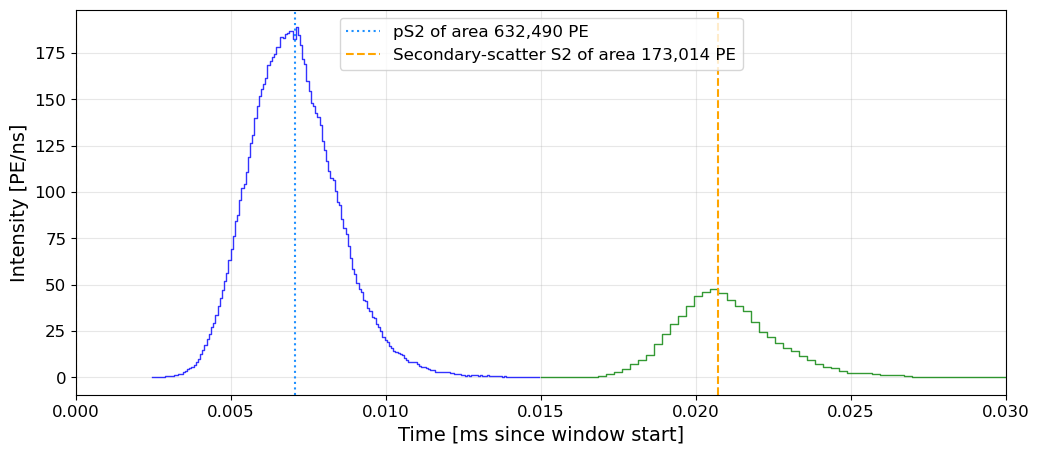

In [211]:
# peaks_031693 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031693.npy",allow_pickle = True)
peaks_031680 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031680.npy",allow_pickle = True)

run_id = runs_df.iloc[-2]
pS2s_93 = pS2s_list[0]
DEs_93 = DEs_list[0]

two72 = peaks_031680[(peaks_031680['subtype'] == 272) & (peaks_031680['area'] > 1e5)]

fig1, ax1 = plot_peaks_new(
    run_id, peaks_031680,
    t_reference=two72['time'][4] - 15000,
    reference_position='left',
    # vetos=DAQ_vetos,
    window_ms=0.03,
    log=False
)

window_start_ns = two72['time'][4] - 15000  # this is your t_reference and window start

# ---- Add the previous pS2 FIRST ----
prev_ps2 = peaks_031680[(peaks_031680['subtype'] == 22) & (peaks_031680['time'] < two72['time'][4])]
if len(prev_ps2) > 0:
    pS2_prev = prev_ps2[-1]
    ps2_time_ms = (pS2_prev['center_time'] - window_start_ns) / 1e6
    ps2_area_str = f"{pS2_prev['area']:,.0f}"
    ax1.axvline(
        ps2_time_ms, color='dodgerblue', linestyle=':',
        label=f"pS2 of area {ps2_area_str} PE"
    )

# ---- Then add the current PI line ----
pi_time_ms = (two72['center_time'][4] - window_start_ns - 500) / 1e6
pi_area_str = f"{two72['area'][4]:,.0f}"
ax1.axvline(
    pi_time_ms, color='orange', linestyle='--',
    label=f"Secondary-scatter S2 of area {pi_area_str} PE"
)
ax1.legend(fontsize=12, loc='upper center')

print(prev_ps2["time_since_start"][-1], two72['time_since_start'][4])

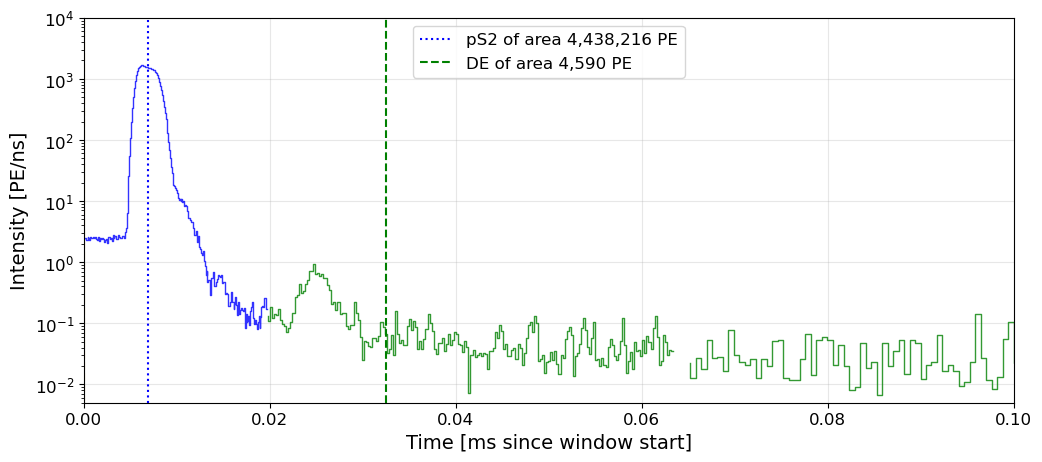

In [ ]:
#Prompt electron potential peak or whatever
large_s2s = pS2s_93[pS2s_93['area'] > 1e6]
run_id = runs_df.iloc[0]
# for i in range(10):
#     fig, ax1 = plot_peaks_new(
#         run_id, peaks_031693,
#         t_reference=large_s2s['time'][i] - 10000,
#         reference_position='left',
#         window_ms=0.5,
#         log=True
#     )


fig1, ax1 = plot_peaks_new(
    run_id, peaks_031693,
    t_reference=large_s2s['time'][1],
    reference_position='left',
    window_ms=0.1,
    log=True
)

window_start_ns = large_s2s['time'][1] # this is your t_reference and window start
s2_time_ms = (large_s2s['center_time'][1] - window_start_ns) / 1e6
s2_area_str = f"{large_s2s['area'][1]:,.0f}"
ax1.axvline(
    s2_time_ms, color='blue', linestyle=':',
    label=f"pS2 of area {s2_area_str} PE"
)
import numpy as np

# Which field holds the DE subtype code?
subtype_field = next(
    (f for f in ("subtype", "subtype_code", "type", "peak_type") if f in peaks_031693.dtype.names),
    None
)
assert subtype_field is not None, f"No subtype field found in peaks: {peaks_031693.dtype.names}"

de_codes = np.array([20, 21, 23, 271, 272, 273])

# Time of this pS2 (in ns)
pS2_time_ns = large_s2s['time'][1]

# Build masks on the peaks array
is_de = np.isin(peaks_031693[subtype_field], de_codes)
in_window = (peaks_031693['time'] > pS2_time_ns) & (peaks_031693['time'] < pS2_time_ns + 1e6)  # 1 ms after pS2
de_candidates = peaks_031693[is_de & in_window]

if len(de_candidates) > 0:
    # Sort by time and take the first DE after the pS2
    first_de = de_candidates[np.argsort(de_candidates['time'])[0]]
    de_time_ms = (first_de['center_time'] - window_start_ns) / 1e6
    de_area_str = f"{first_de['area']:,.0f}"
    ax1.axvline(
        de_time_ms, color='green', linestyle='--',
        label=f"DE of area {de_area_str} PE"
    )
else:
    print("No DE (by subtype) found within 1 ms after pS2.")



ax1.set_ylim(5e-3, 1e4)
ax1.legend(fontsize=12, loc='upper center')
plt.show()

116


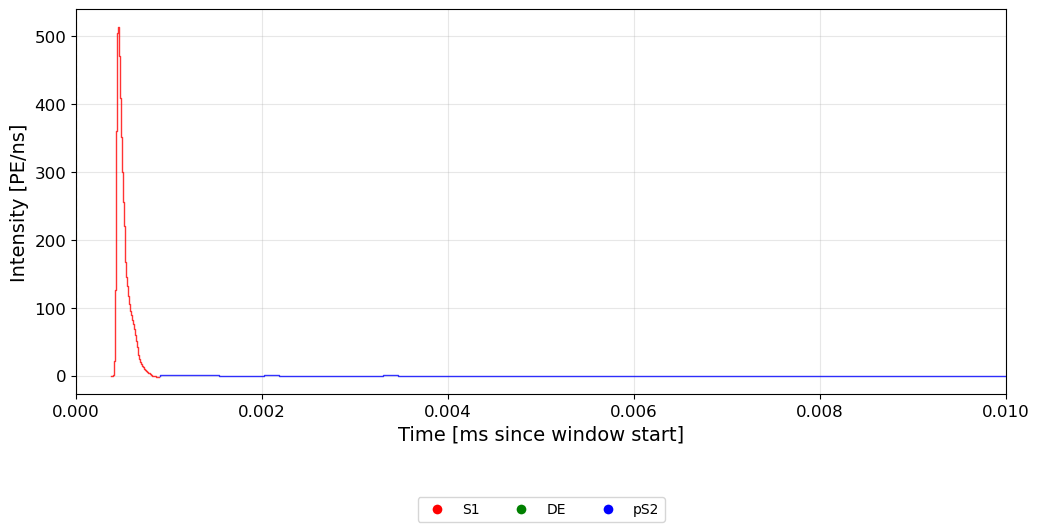

In [ ]:
#Low area fraction pS2s

pS2s_80 = peaks_031680[np.isin(peaks_031680['subtype'], [22, 24, 25, 261, 262, 29])]
low = pS2s_80[pS2s_80['area_fraction_top'] < 0.5]
print(len(low))

for i in range(1):
    fig, ax = plot_peaks_new(run_id, peaks_031680, t_reference = low['time'][i] - 900, reference_position='left', window_ms = 0.01, log=False)

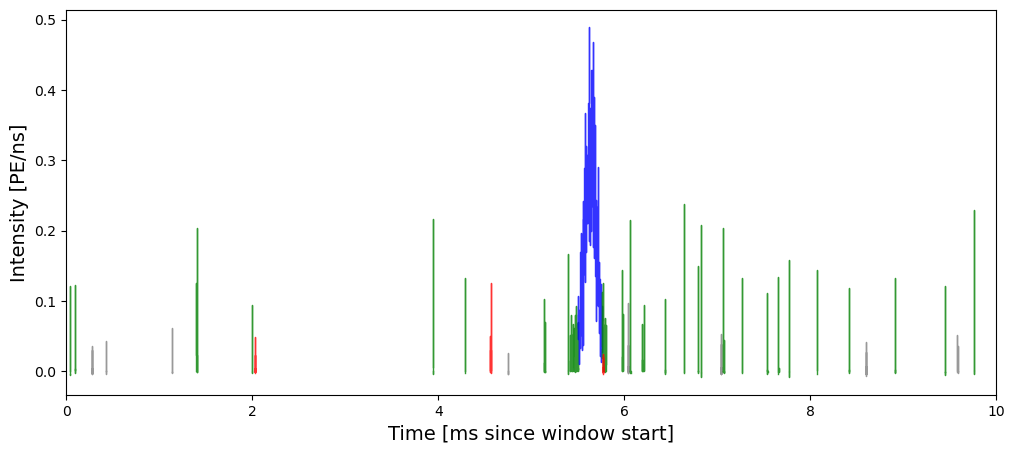

In [38]:
#E-bursts

peaks_031693 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031693.npy",allow_pickle = True)
run_id = runs_df.iloc[0]
pS2s_93 = pS2s_list[0]
DEs_93 = DEs_list[0]

e_bursts = peaks_031693[(peaks_031693['range_50p_area'] > 40000)]

for i in range(1):
    fig, ax = plot_peaks_new(run_id, peaks_031693, t_reference = e_bursts['time'][i+11] - 500000, reference_position='center', window_ms = 10, log=False)


#### Model changes stuff

#### Normalisation, electron counting etc.

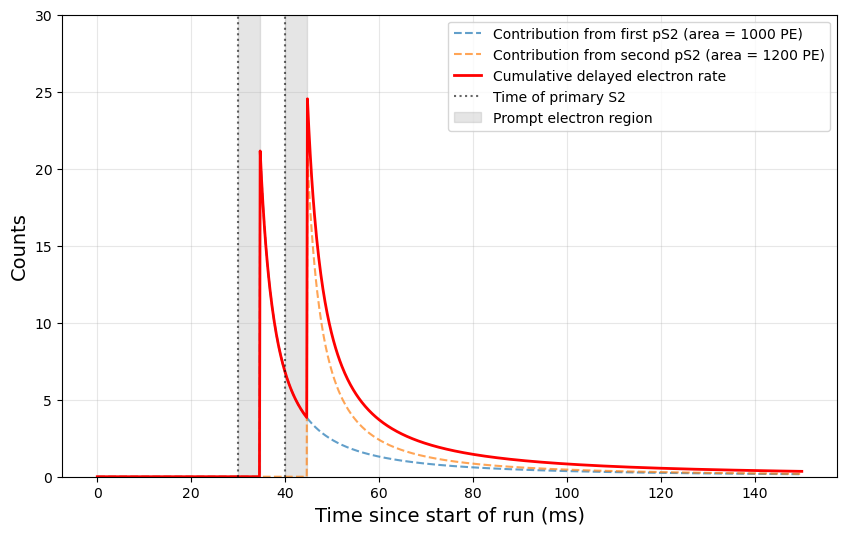

In [ ]:
#Toy model power law overlap
from scipy.stats import pareto

# Parameters for toy model
t = np.linspace(0, 150, 1000)  # ms
tmin = 4.6
n = 1.5
scale = 200  # scale factor to simulate counts instead of pdf

# Define Pareto-like distribution (power law tail)
dist = pareto(b=n-1, scale=tmin)

# Two S2 peaks: one early, one later (double scatter-like)
s2_times = [30, 40]

# Compute contributions from each S2
pdfs = []
for s2 in s2_times:
    shifted_t = t - s2
    pdf_vals = np.zeros_like(shifted_t)
    mask = shifted_t >= tmin
    pdf_vals[mask] = dist.pdf(shifted_t[mask]) * scale
    pdfs.append(pdf_vals)

# Total PDF (without fix)
total_pdf = sum(pdfs)

# Plot
plt.figure(figsize=(10, 6))

# Individual contributions
plt.plot(t, pdfs[0], "--", label="Contribution from first pS2 (area = 1000 PE)", alpha=0.7)
plt.plot(t, pdfs[1], "--", label="Contribution from second pS2 (area = 1200 PE)", alpha=0.7)

# Total
plt.plot(t, total_pdf, "r", label="Cumulative delayed electron rate", linewidth=2)

# Primary S2 markers (legend only once)
for i, s2 in enumerate(s2_times):
    if i == 0:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.6, label="Time of primary S2")
    else:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.6)

    # Shaded forbidden prompt region
    plt.axvspan(s2, s2+tmin, color="gray", alpha=0.2, label ="Prompt electron region" if i == 0 else None)

plt.xlabel("Time since start of run (ms)", fontsize=14)
plt.ylabel("Counts", fontsize=14)
# plt.title("Toy Model of Tail Leakage Between Double-Scatter Peaks")
plt.ylim(0, 30)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


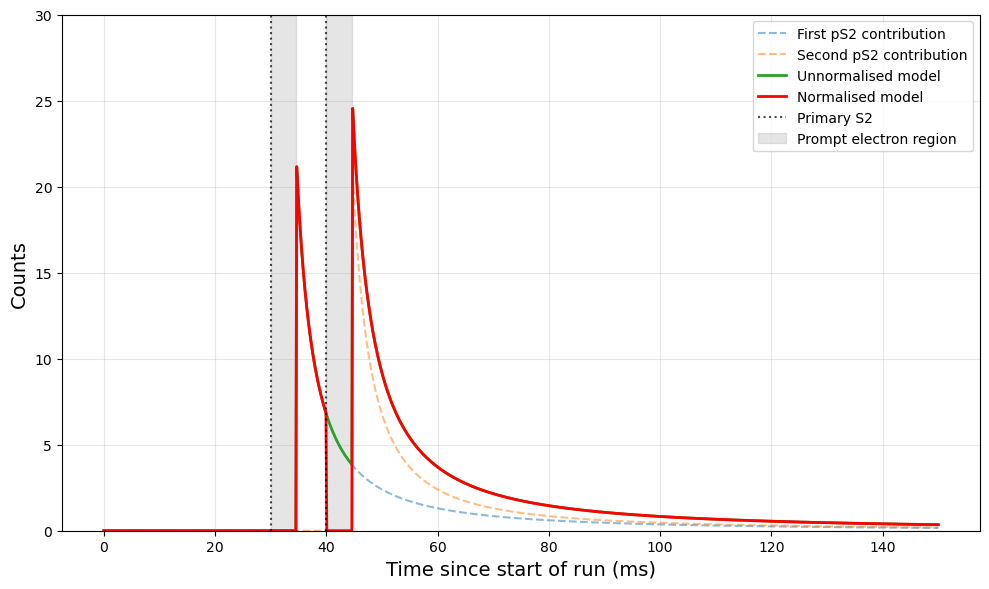

In [ ]:
from scipy.stats import pareto

# Parameters for toy model
t = np.linspace(0, 150, 1000)  # ms
tmin = 4.6
n = 1.5
scale = 200  # scale factor to simulate counts instead of pdf

# Define Pareto-like distribution (power law tail)
dist = pareto(b=n-1, scale=tmin)

# Two S2 peaks: one early, one later (double scatter-like)
s2_times = [30, 40]

# Compute contributions from each S2
pdfs = []
for s2 in s2_times:
    shifted_t = t - s2
    pdf_vals = np.zeros_like(shifted_t)
    mask = shifted_t >= tmin
    pdf_vals[mask] = dist.pdf(shifted_t[mask]) * scale
    pdfs.append(pdf_vals)

# Total PDF (without any masking)
total_pdf = sum(pdfs)

# --- New part: apply "prompt-region mask" ---
fixed_total_pdf = total_pdf.copy()
for s2 in s2_times:
    prompt_mask = (t >= s2) & (t < s2 + tmin)
    fixed_total_pdf[prompt_mask] = 0.0

# Plot
plt.figure(figsize=(10, 6))

# (Optional) individual contributions
plt.plot(t, pdfs[0], "--", alpha=0.5, label="First pS2 contribution")
plt.plot(t, pdfs[1], "--", alpha=0.5, label="Second pS2 contribution")

# Original and fixed cumulative models
plt.plot(t, total_pdf, label="Unnormalised model", linewidth=2)
plt.plot(t, fixed_total_pdf, "r", label="Normalised model", linewidth=2)

# Primary S2 markers + shaded prompt regions
for i, s2 in enumerate(s2_times):
    if i == 0:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.7, label="Primary S2")
    else:
        plt.axvline(s2, color="k", linestyle=":", alpha=0.7)

    # Shaded prompt-electron region
    plt.axvspan(
        s2,
        s2 + tmin,
        color="gray",
        alpha=0.2,
        label="Prompt electron region" if i == 0 else None,
    )

plt.xlabel("Time since start of run (ms)", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.ylim(0, 30)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


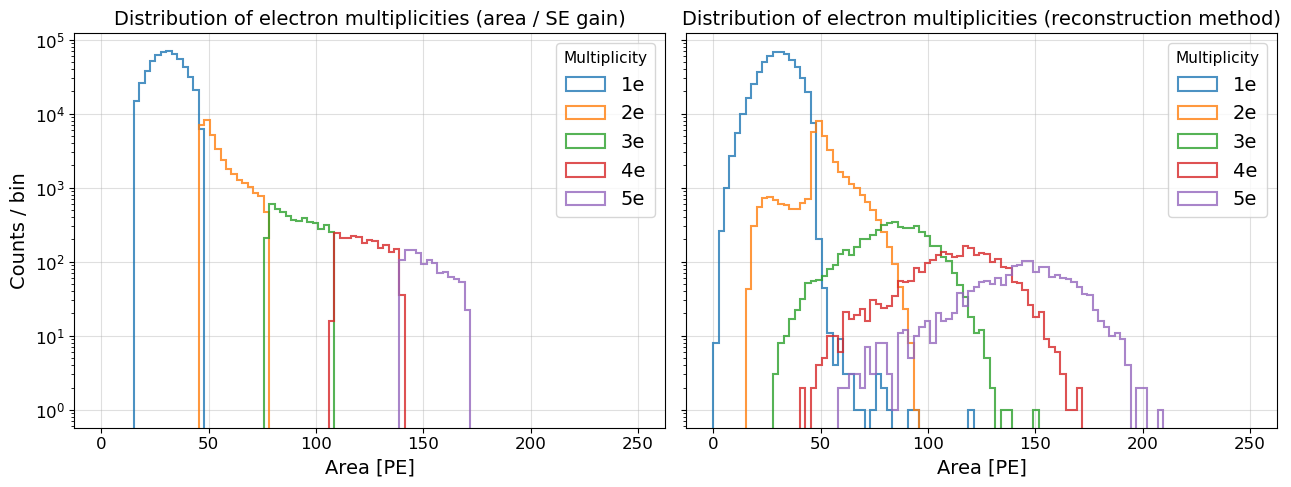

In [275]:
# Electron multiplicity histograms

SE_GAIN = 31  # PE per electron
bins = np.linspace(0, 250, 100)

fig, axs = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

ax = axs[0]
area_per_gain = DEs_all['area'] / SE_GAIN

for n in range(1, 6):
    mask = (np.round(area_per_gain) == n)
    if np.sum(mask) == 0:
        continue
    ax.hist(
        DEs_all['area'][mask],
        bins=bins,
        histtype='step',
        linewidth=1.5,
        label=f'{n}e',
        alpha=0.8,
        density=False
    )

ax.set_xlabel("Area [PE]", fontsize=14)
ax.set_yscale("log")
ax.set_ylabel("Counts / bin", fontsize=14)
ax.set_title("Distribution of electron multiplicities (area / SE gain)", fontsize=14)
ax.grid(alpha=0.4)
ax.legend(title="Multiplicity", fontsize=14)

ax = axs[1]
for n in range(1, 6):
    mask = (DEs_all['n_electron_rec'] == n)
    if np.sum(mask) == 0:
        continue
    ax.hist(
        DEs_all['area'][mask],
        bins=bins,
        histtype='step',
        linewidth=1.5,
        label=f'{n}e',
        alpha=0.8,
        density=False
    )

ax.set_xlabel("Area [PE]", fontsize=14)
ax.set_yscale("log")
ax.set_title("Distribution of electron multiplicities (reconstruction method)", fontsize=14)
ax.grid(alpha=0.4)
ax.legend(title="Multiplicity", fontsize=14)


plt.tight_layout()
plt.show()

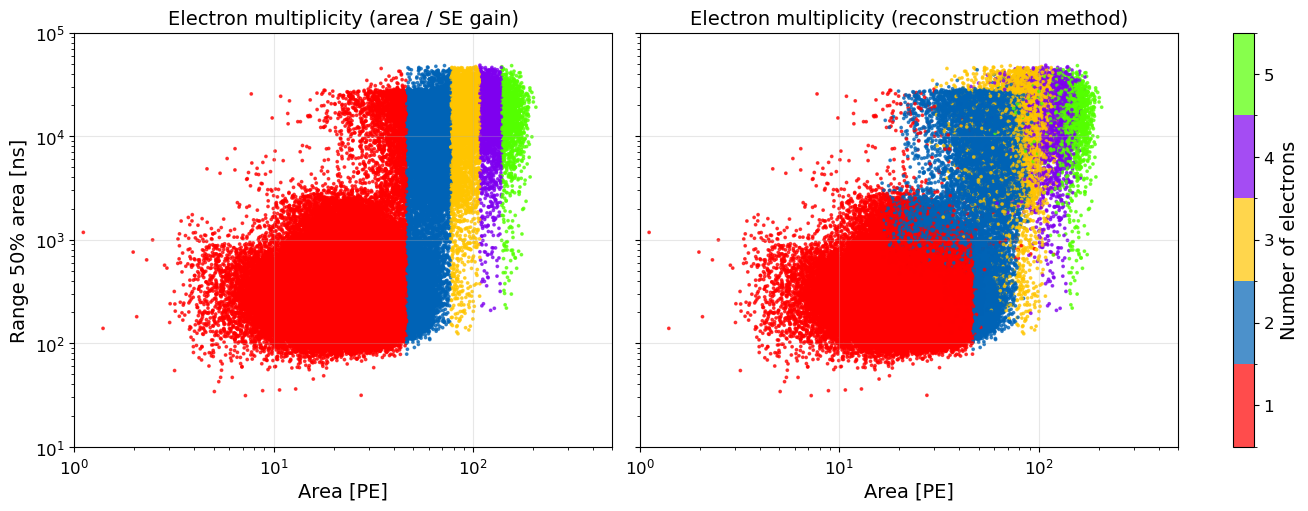

In [ ]:
# Electron multiplicity scatter plots
import matplotlib.colors as mcolors

SE_GAIN = 31  # PE per electron

# Restrict to multiplicities 1–5
mask = (DEs_all['n_electron_rec'] >= 1) & (DEs_all['n_electron_rec'] <= 5)
subset = DEs_all[mask]

# Define consistent color map for both panels
cmap = plt.get_cmap("prism", 5)
norm = mcolors.BoundaryNorm(boundaries=np.arange(0.5, 5.5 + 1), ncolors=5)

fig, axs = plt.subplots(1, 2, figsize=(13, 5), sharey=True, constrained_layout=True)

# --- Left: SE gain method ---
ax = axs[0]
n_electron_gain = np.clip(np.round(subset['area'] / SE_GAIN), 1, 5)

sc1 = ax.scatter(
    subset['area'], subset['range_50p_area'],
    c=n_electron_gain,
    cmap=cmap, norm=norm,
    s=3, alpha=0.7
)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1, 5e2)
ax.set_ylim(1e1, 1e5)
ax.set_xlabel("Area [PE]", fontsize=14)
ax.set_ylabel("Range 50% area [ns]", fontsize=14)
ax.set_title("Electron multiplicity (area / SE gain)", fontsize=14)

# --- Right: reconstructed multiplicity ---
ax = axs[1]
sc2 = ax.scatter(
    subset['area'], subset['range_50p_area'],
    c=subset['n_electron_rec'],
    cmap=cmap, norm=norm,
    s=3, alpha=0.7
)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1, 5e2)
ax.set_ylim(1e1, 1e5)
ax.set_xlabel("Area [PE]", fontsize=14)
ax.set_title("Electron multiplicity (reconstruction method)", fontsize=14)

# --- Shared colorbar ---
cbar = fig.colorbar(sc2, ax=axs, orientation="vertical", ticks=np.arange(1, 6))
cbar.set_label("Number of electrons", fontsize=14)

# plt.tight_layout()
# fig.subplots_adjust(wspace=0.15)  # smaller = less space (default is ~0.2–0.3)

plt.show()


### Running the model

Couple things to note here:
1. Computation does not scale linearly. 50s window takes e.g. 30s to run, 100s window takes 120s to run.
This is not great, I am aware. Choosing not to plot the graph reduces like 2/3 of the time, as I think getting the errors for the model is the most computationally expensive bit (well technically new_power_law_pdf, all the calls to it while getting the model errors).
2. Note that passing the old selection should not take s1_times as an input, since no S1 prompt electron cut was done in the old model/selection, and so no normalisation should be done for those S1 dead-zones either.

In [54]:
import importlib
importlib.reload(mod)

<module 'model' from 'C:\\Users/conor/Documents/Github/Project/plugins\\model.py'>


Random 300s window: 828.8 - 1128.8 seconds

------------------------------------------------------------------------------------------------------------------------

Running model: old
Running without DAQ vetos; cannot guarantee a clean fit.
Running without normalisation from S1 dead zones; some loss of accuracy expected.

This selection will incorporate 2268 pS2s
Corresponding to the seconds range of: 829 to 1129

Running the cost function now
minimization takes 39.7463 s
Minimisation Status: 
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.064e+04                  │              Nfcn = 790              │
│ EDM = 2.57e-05 (Goal: 0.0002)    │           time = 39.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Belo

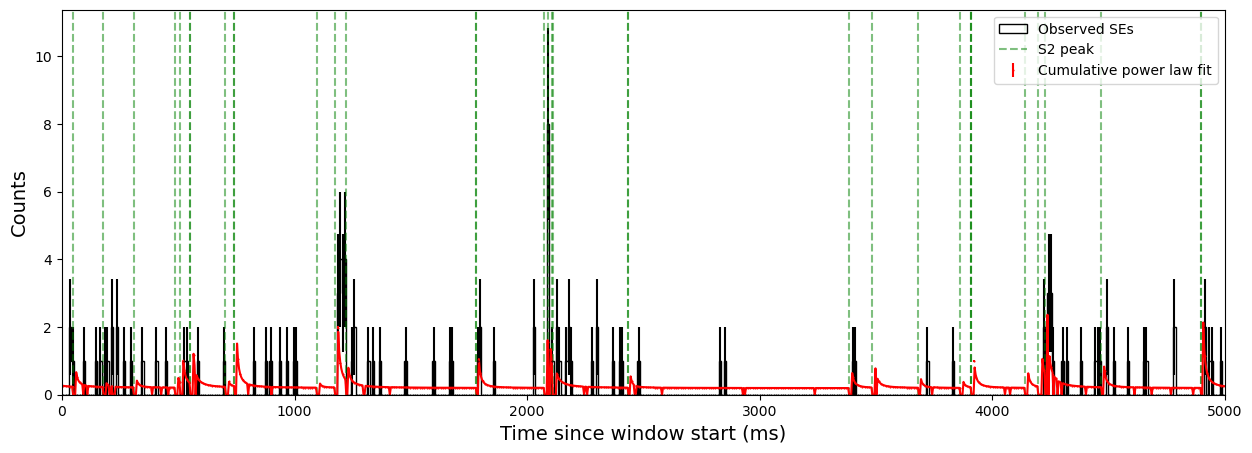

  Zoom region: 209.9 - 214.9 seconds within window
Running new


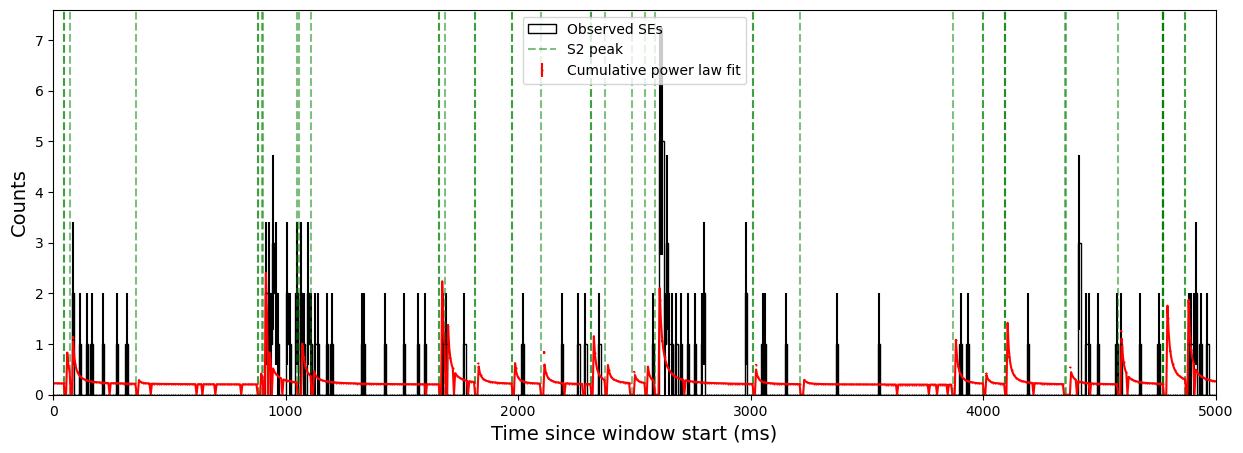

  Zoom region: 89.2 - 94.2 seconds within window
Running new


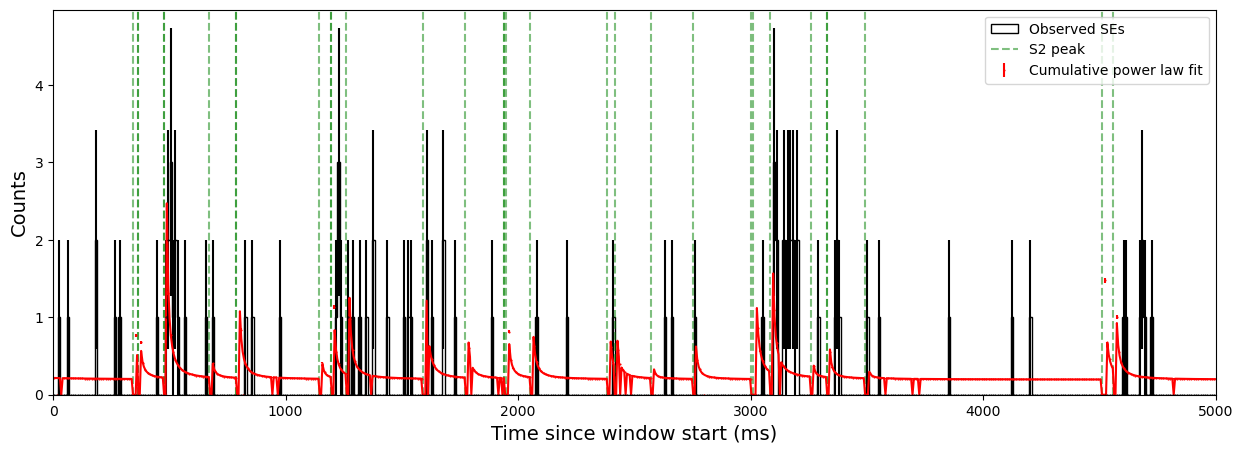

  Zoom region: 276.8 - 281.8 seconds within window
Running new


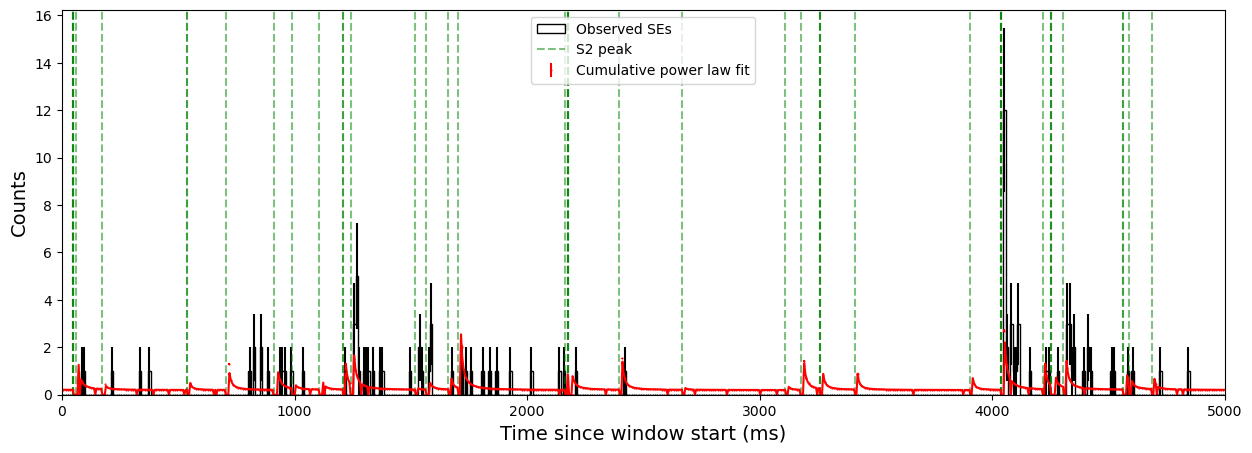

  Zoom region: 56.9 - 61.9 seconds within window
Running new


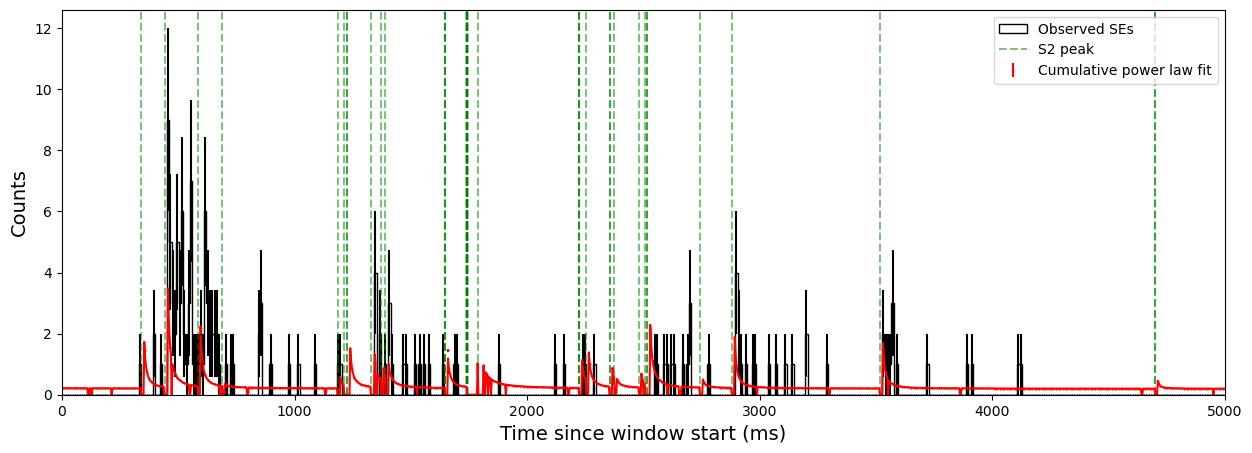

  Zoom region: 224.8 - 229.8 seconds within window
Running new


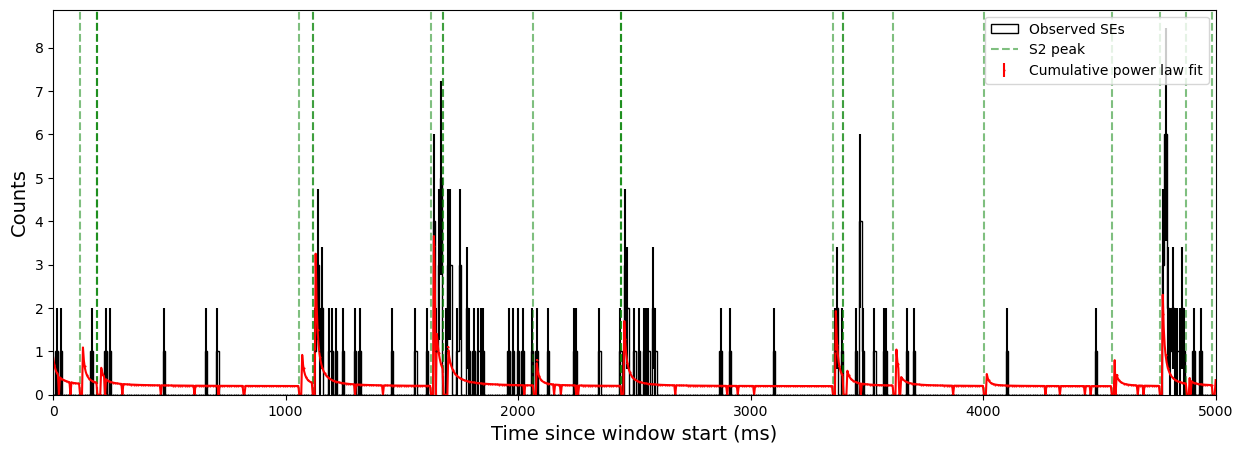

  Zoom region: 48.9 - 53.9 seconds within window
Running new


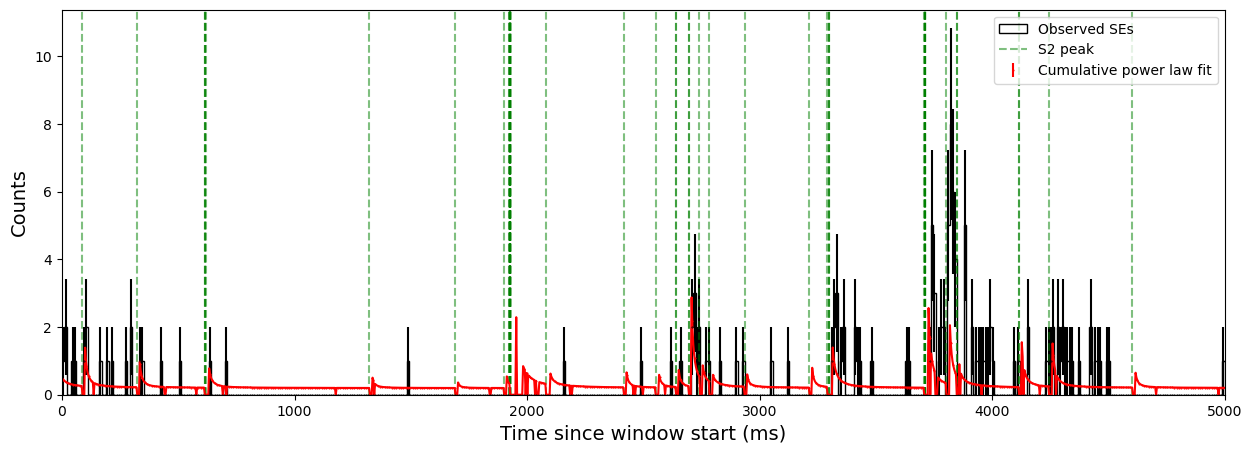

  Zoom region: 285.0 - 290.0 seconds within window
Running new


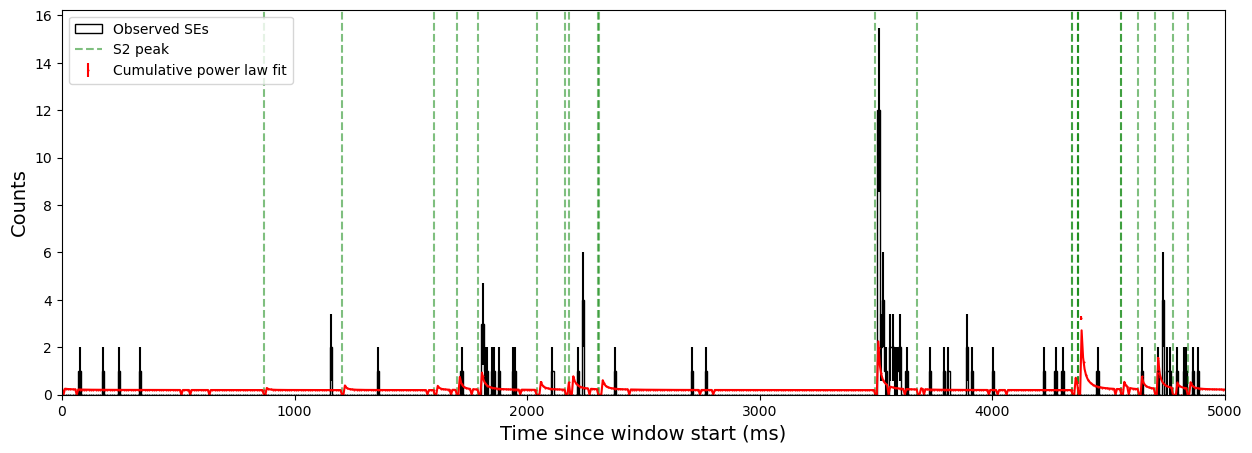

  Zoom region: 257.7 - 262.7 seconds within window
Running new


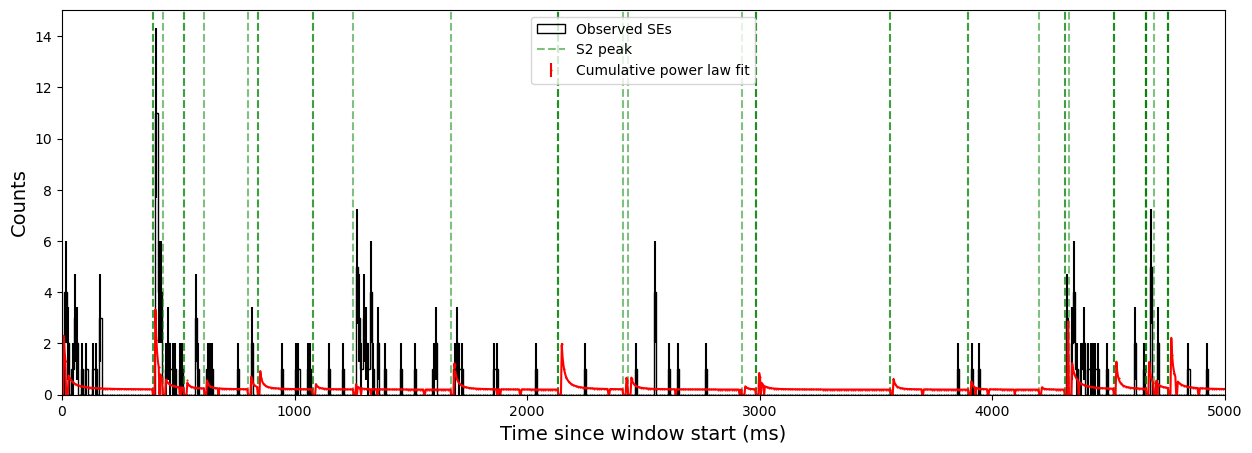

  Zoom region: 31.7 - 36.7 seconds within window
Running new


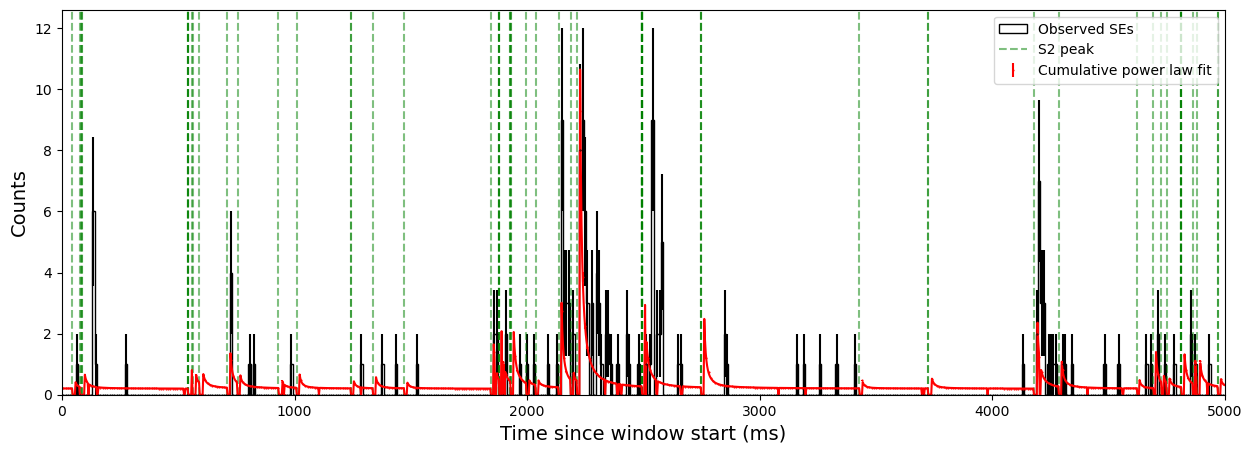


Random 300s window: 979.9 - 1279.9 seconds

------------------------------------------------------------------------------------------------------------------------

Running model: old
Running without DAQ vetos; cannot guarantee a clean fit.
Running without normalisation from S1 dead zones; some loss of accuracy expected.

This selection will incorporate 2293 pS2s
Corresponding to the seconds range of: 980 to 1280

Running the cost function now
minimization takes 39.5591 s
Minimisation Status: 
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.578e+04                  │              Nfcn = 802              │
│ EDM = 1.13e-05 (Goal: 0.0002)    │           time = 39.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Belo

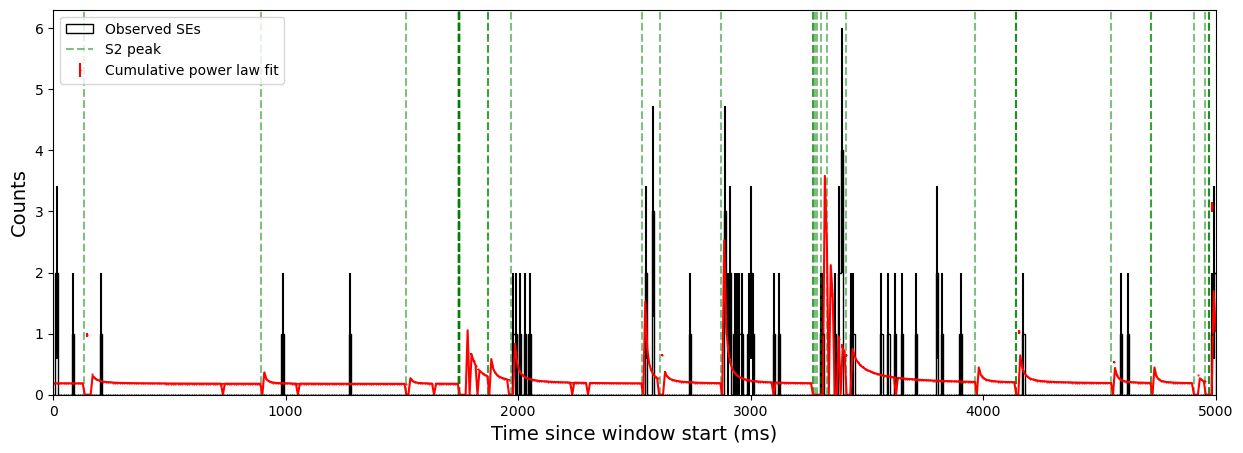

  Zoom region: 150.9 - 155.9 seconds within window
Running new


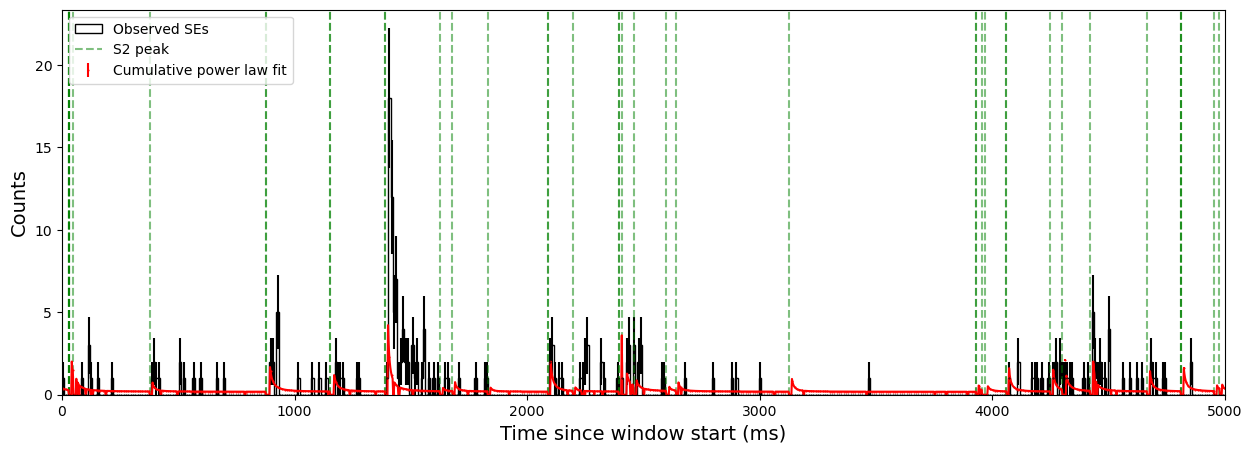

  Zoom region: 250.8 - 255.8 seconds within window
Running new


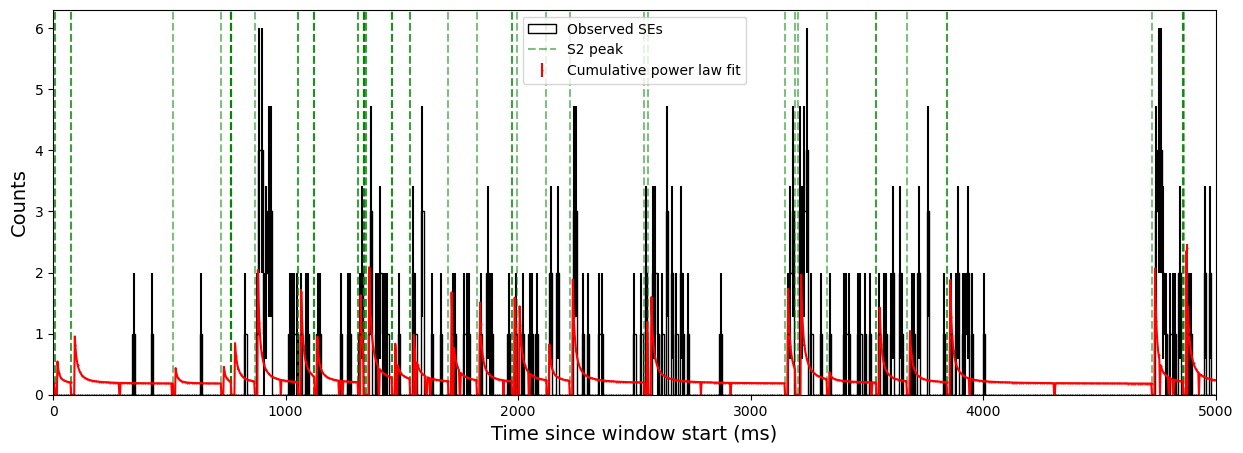

  Zoom region: 45.7 - 50.7 seconds within window
Running new


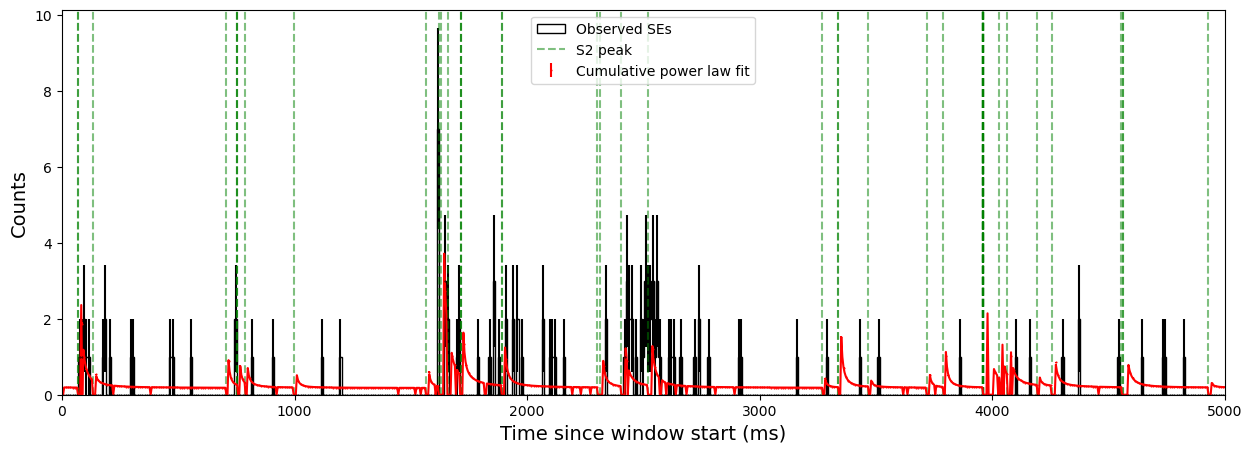

  Zoom region: 64.0 - 69.0 seconds within window
Running new


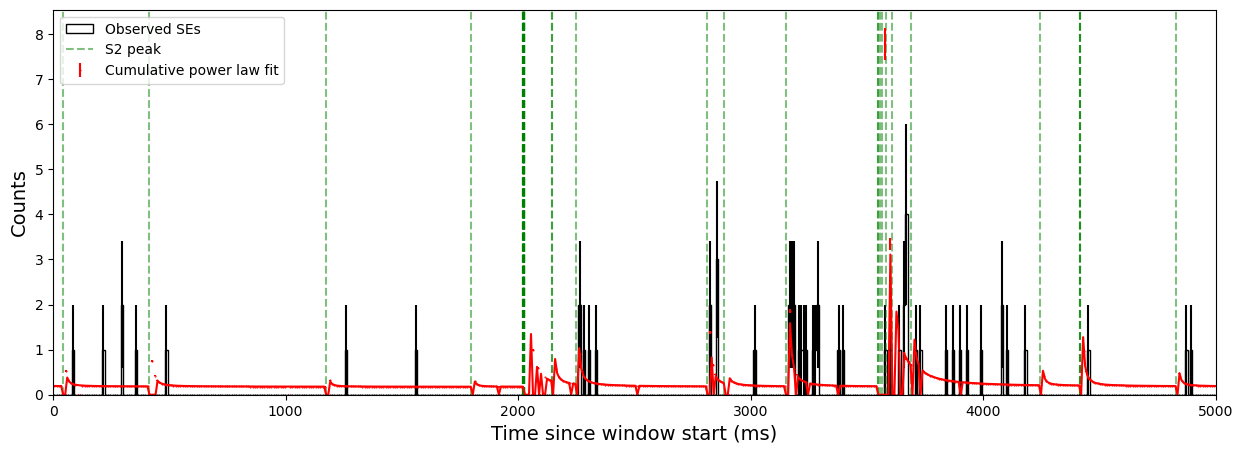

  Zoom region: 21.6 - 26.6 seconds within window
Running new


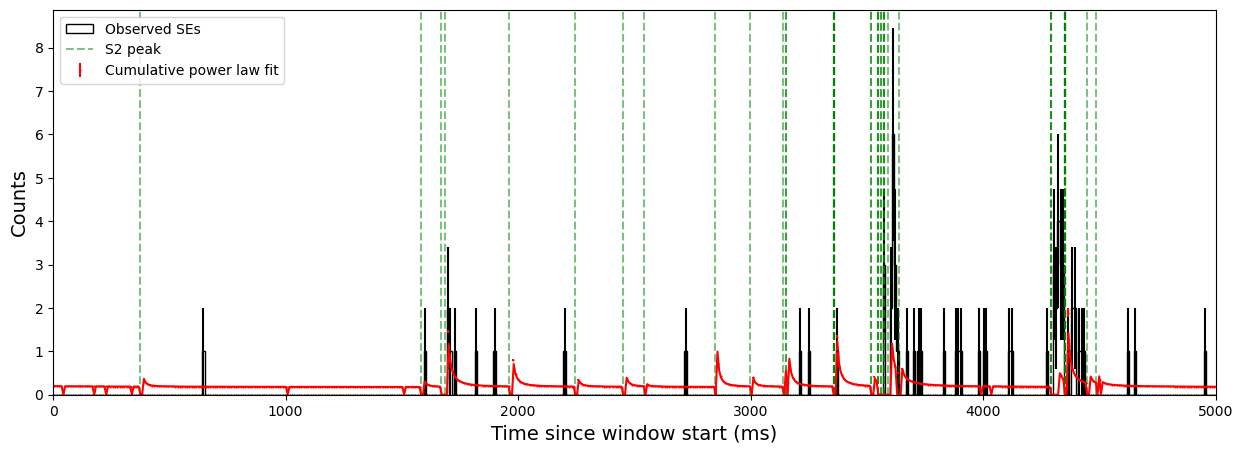

  Zoom region: 18.7 - 23.7 seconds within window
Running new


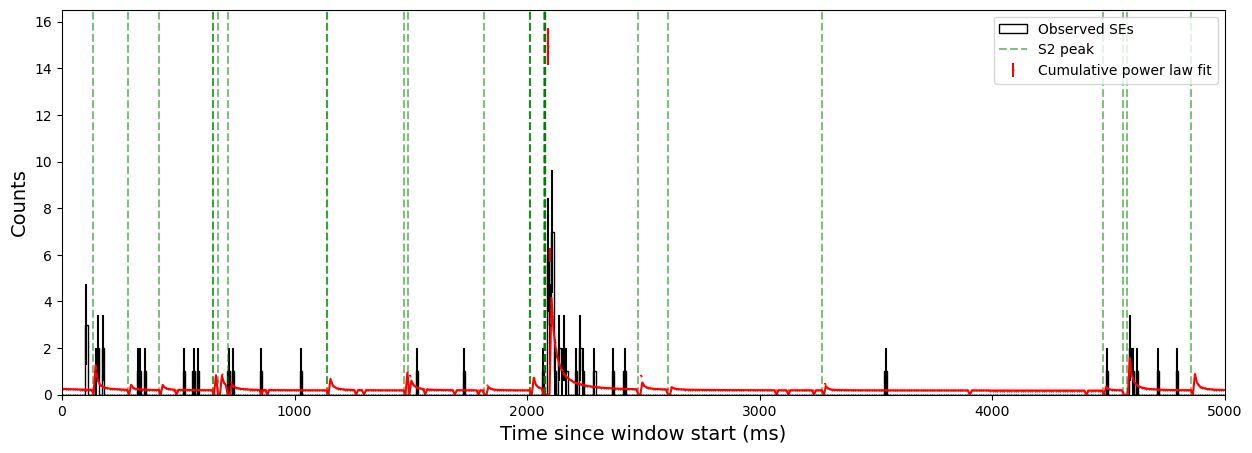

  Zoom region: 147.2 - 152.2 seconds within window
Running new


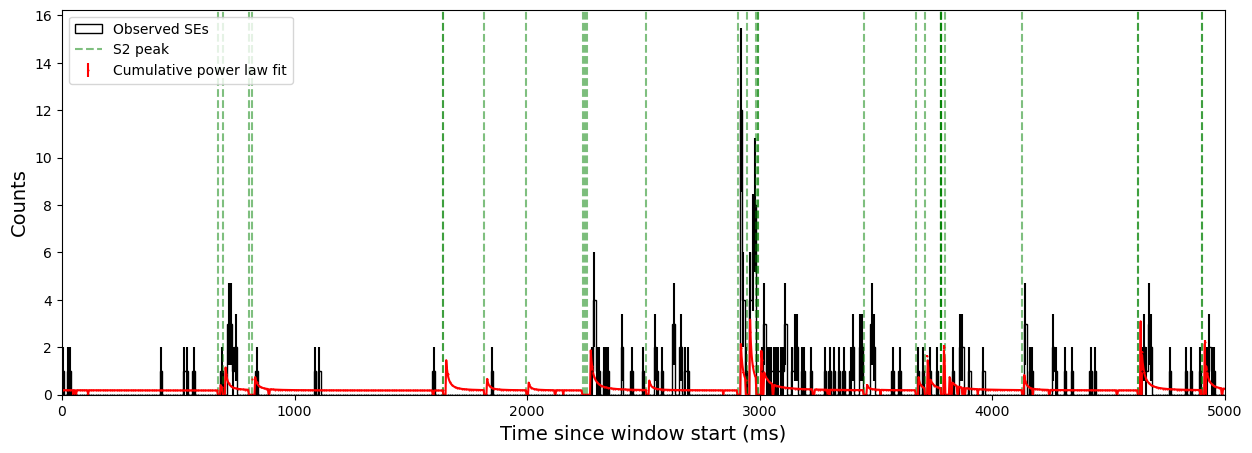

  Zoom region: 48.1 - 53.1 seconds within window
Running new


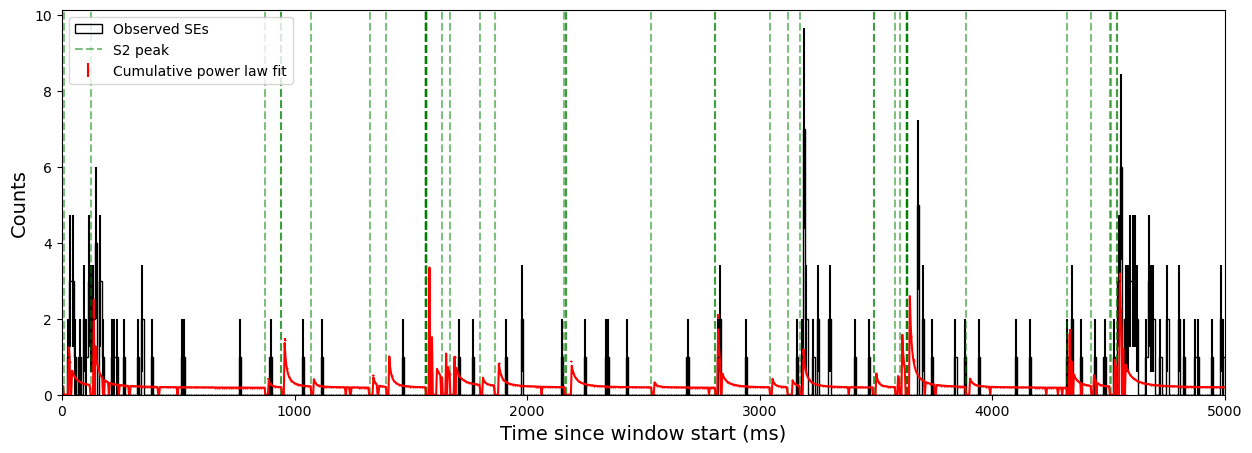

  Zoom region: 38.0 - 43.0 seconds within window
Running new


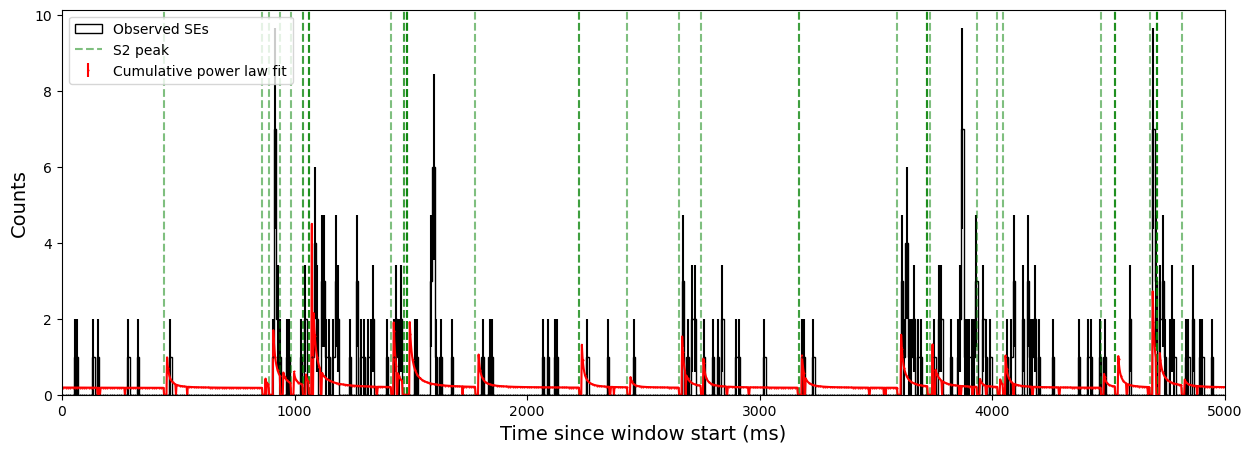


Random 300s window: 1052.8 - 1352.8 seconds

------------------------------------------------------------------------------------------------------------------------

Running model: old
Running without DAQ vetos; cannot guarantee a clean fit.
Running without normalisation from S1 dead zones; some loss of accuracy expected.

This selection will incorporate 2345 pS2s
Corresponding to the seconds range of: 1053 to 1353

Running the cost function now
minimization takes 45.5218 s
Minimisation Status: 
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.738e+04                  │              Nfcn = 898              │
│ EDM = 6.15e-06 (Goal: 0.0002)    │           time = 45.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Be

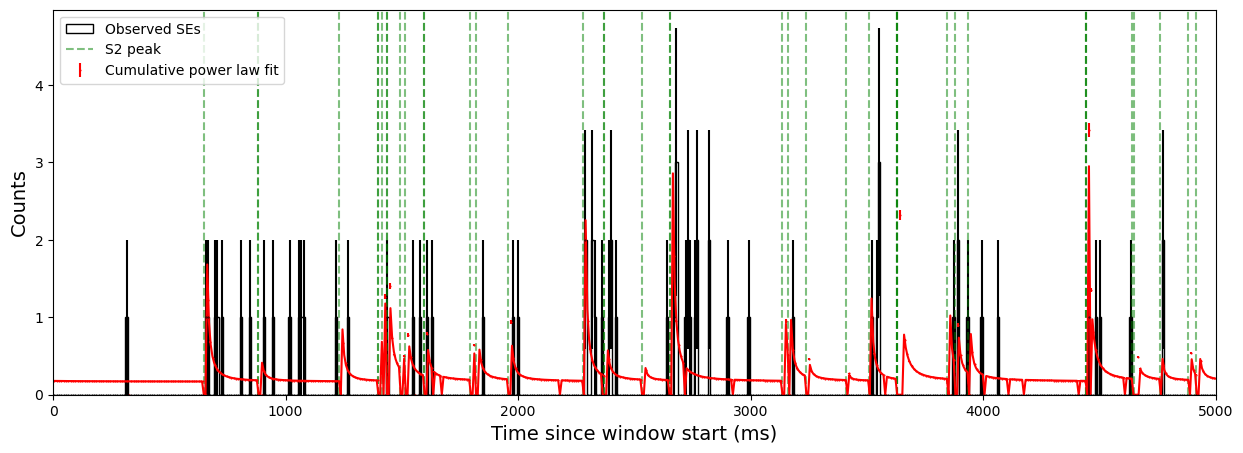

  Zoom region: 100.0 - 105.0 seconds within window
Running new


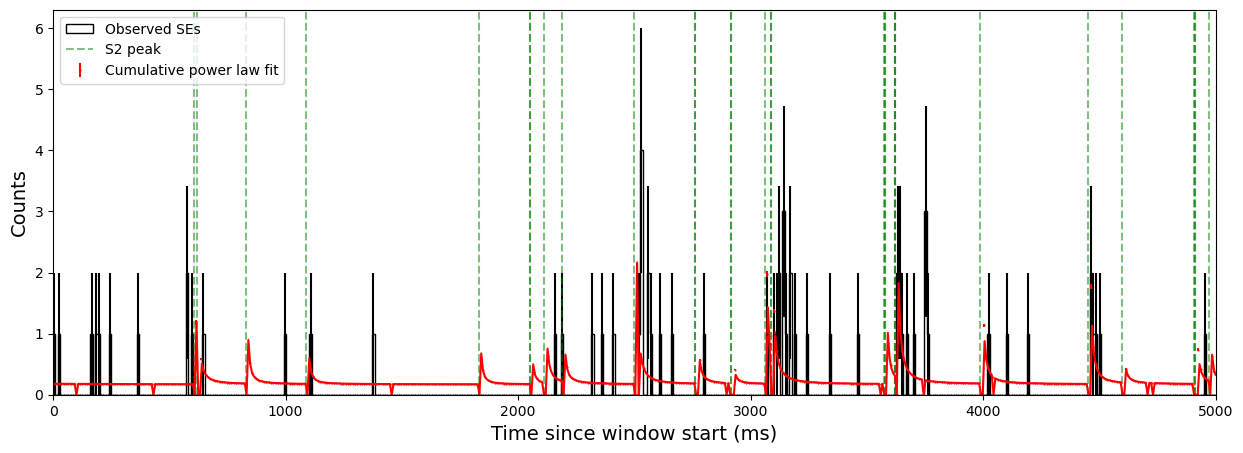

  Zoom region: 99.6 - 104.6 seconds within window
Running new


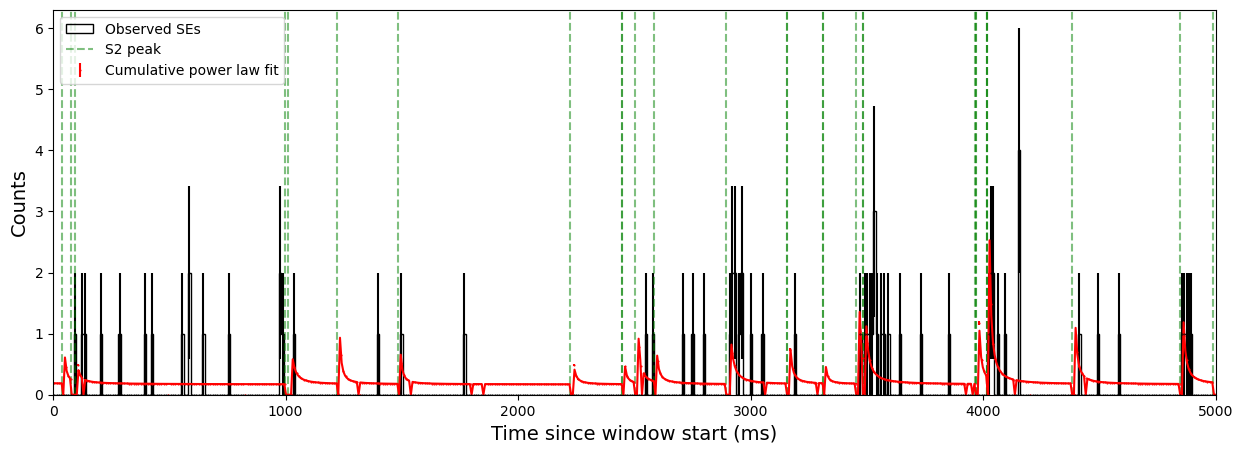

  Zoom region: 248.3 - 253.3 seconds within window
Running new


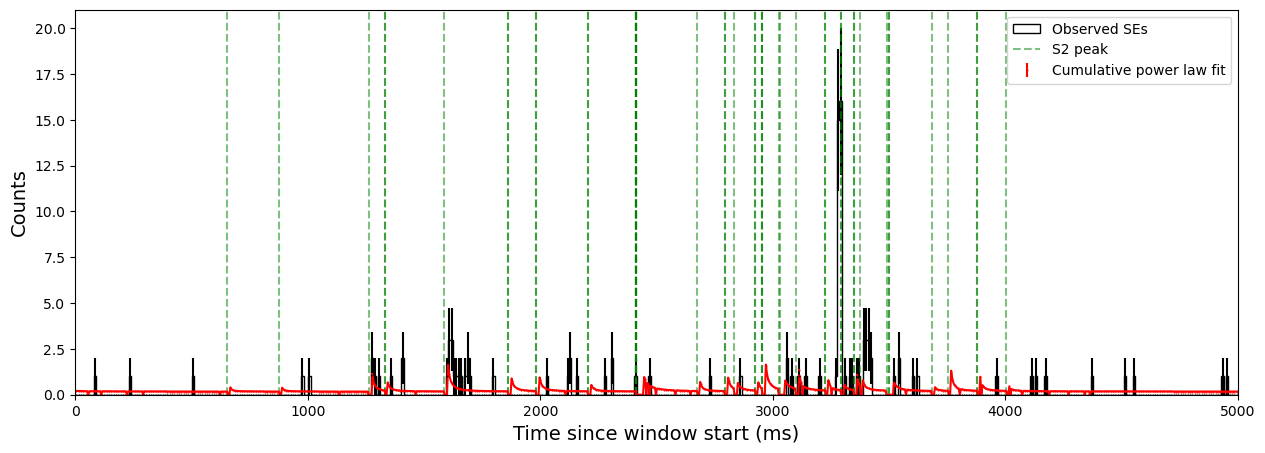

  Zoom region: 80.2 - 85.2 seconds within window
Running new


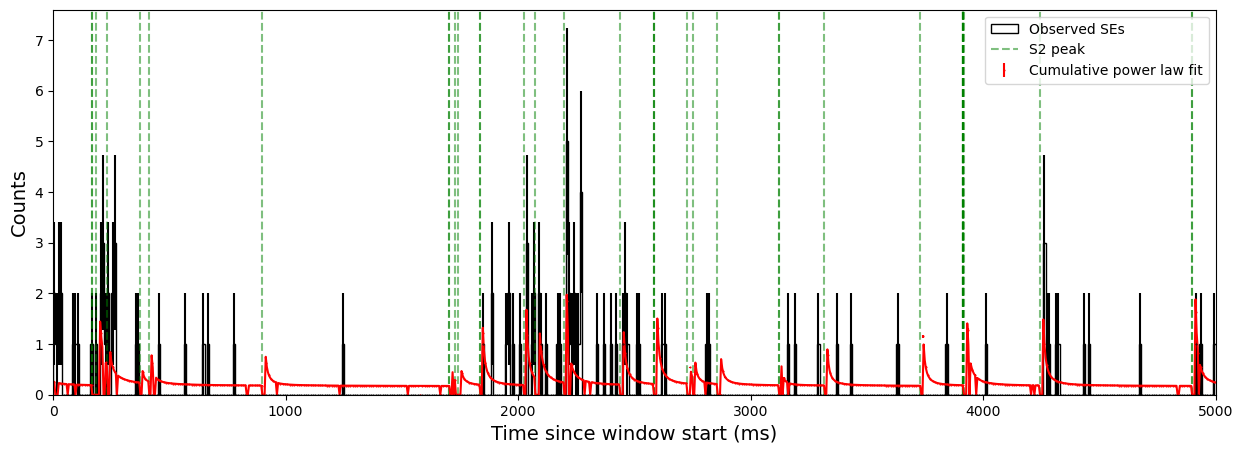

  Zoom region: 191.2 - 196.2 seconds within window
Running new


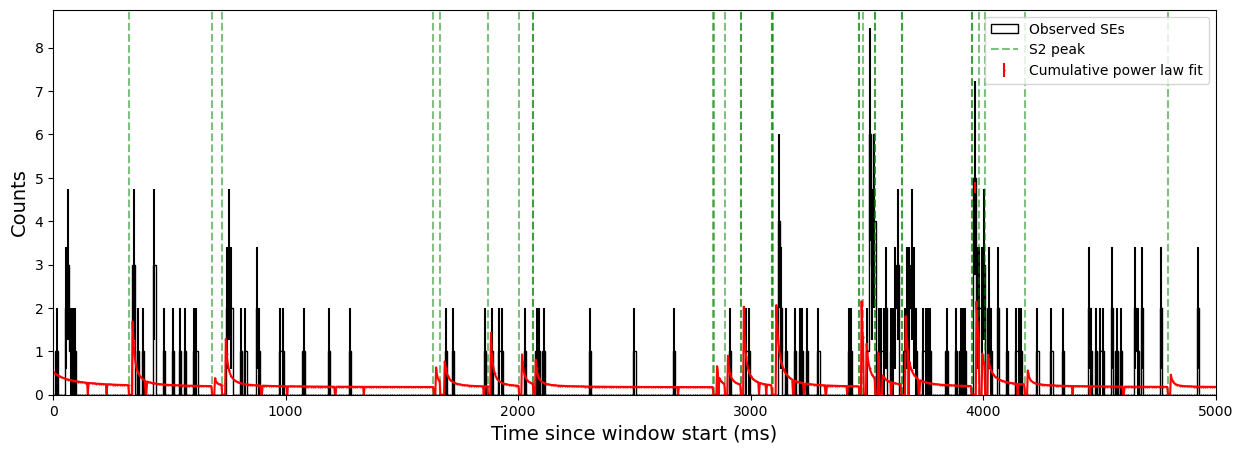

  Zoom region: 276.1 - 281.1 seconds within window
Running new


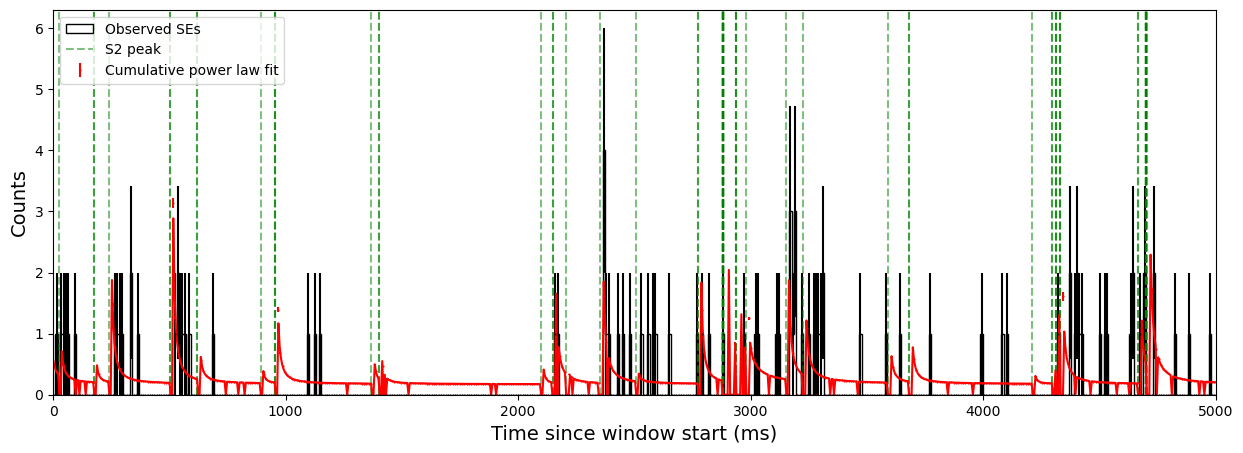

  Zoom region: 168.5 - 173.5 seconds within window
Running new


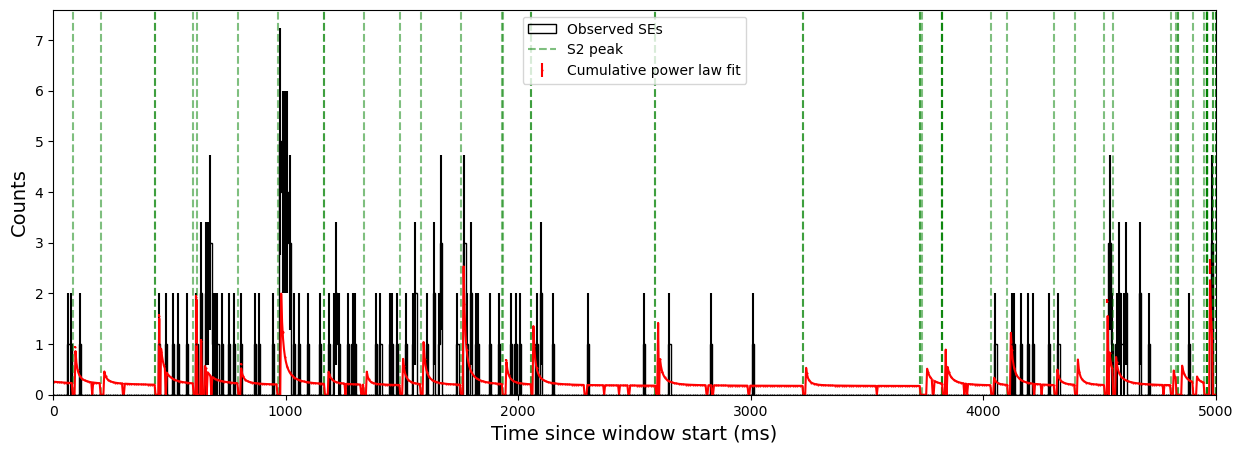

  Zoom region: 83.5 - 88.5 seconds within window
Running new


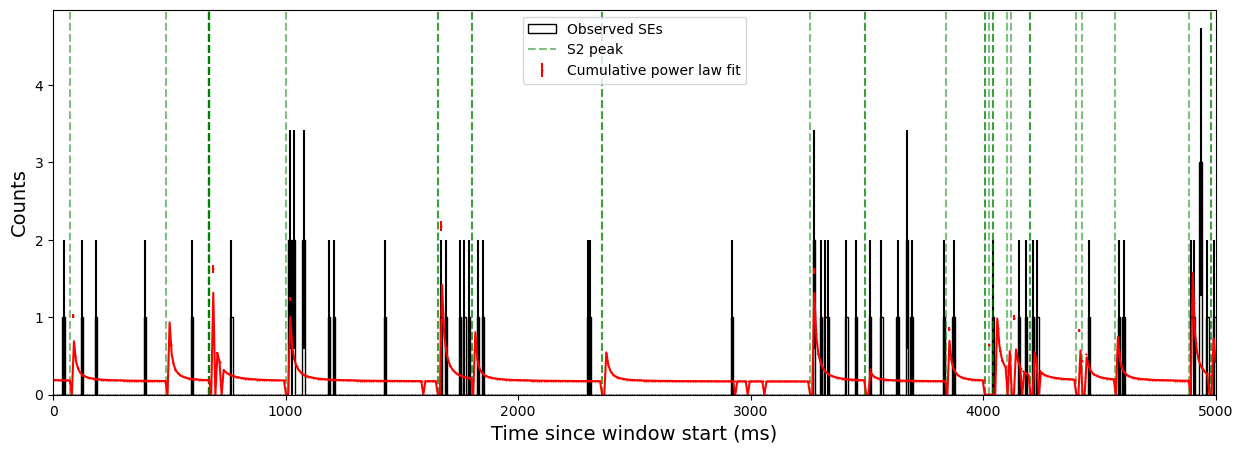

  Zoom region: 40.8 - 45.8 seconds within window
Running new


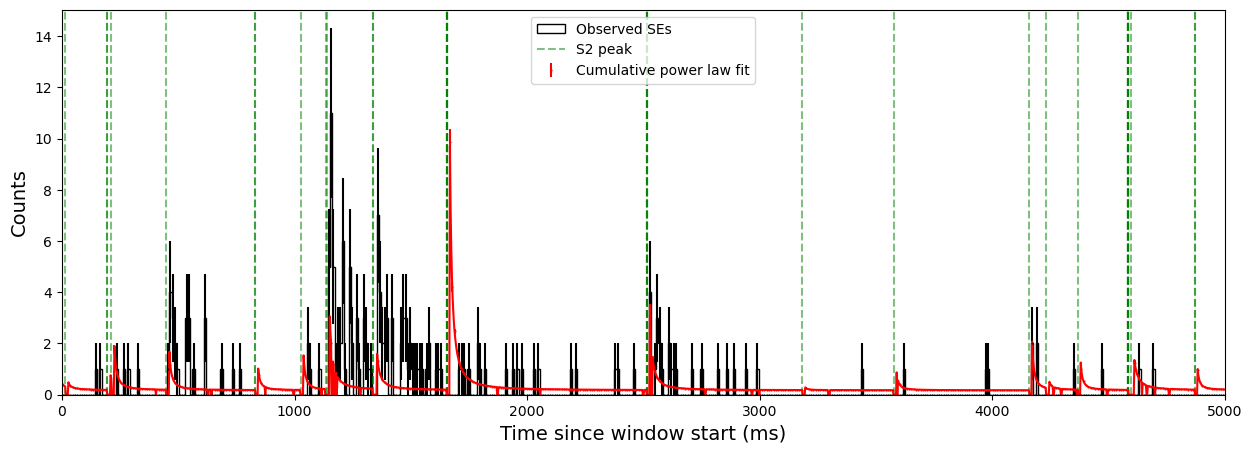


Random 300s window: 985.1 - 1285.1 seconds

------------------------------------------------------------------------------------------------------------------------

Running model: old
Running without DAQ vetos; cannot guarantee a clean fit.
Running without normalisation from S1 dead zones; some loss of accuracy expected.

This selection will incorporate 2302 pS2s
Corresponding to the seconds range of: 985 to 1285

Running the cost function now
minimization takes 39.2466 s
Minimisation Status: 
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.683e+04                  │              Nfcn = 769              │
│ EDM = 5.73e-05 (Goal: 0.0002)    │           time = 39.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Belo

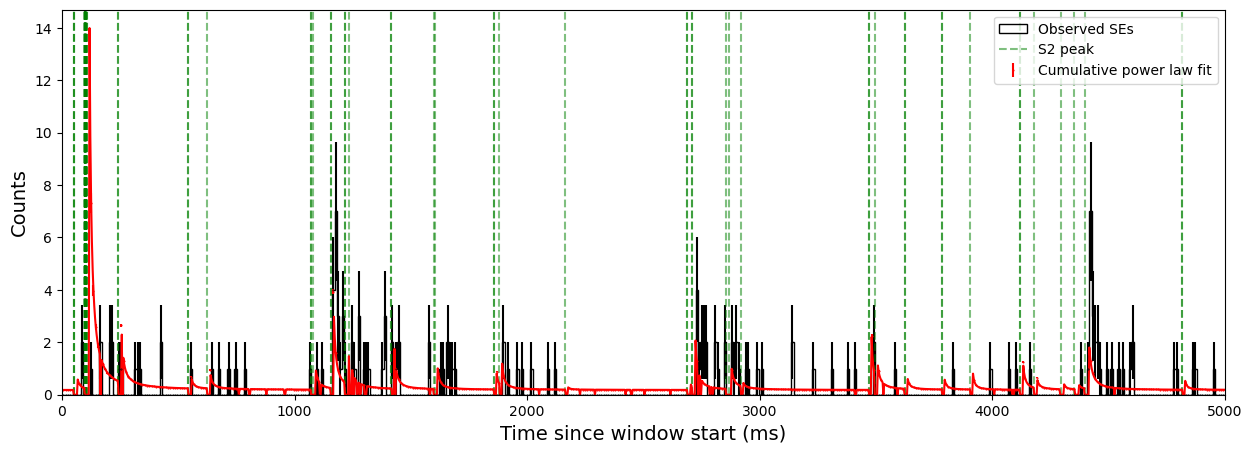

  Zoom region: 118.5 - 123.5 seconds within window
Running new


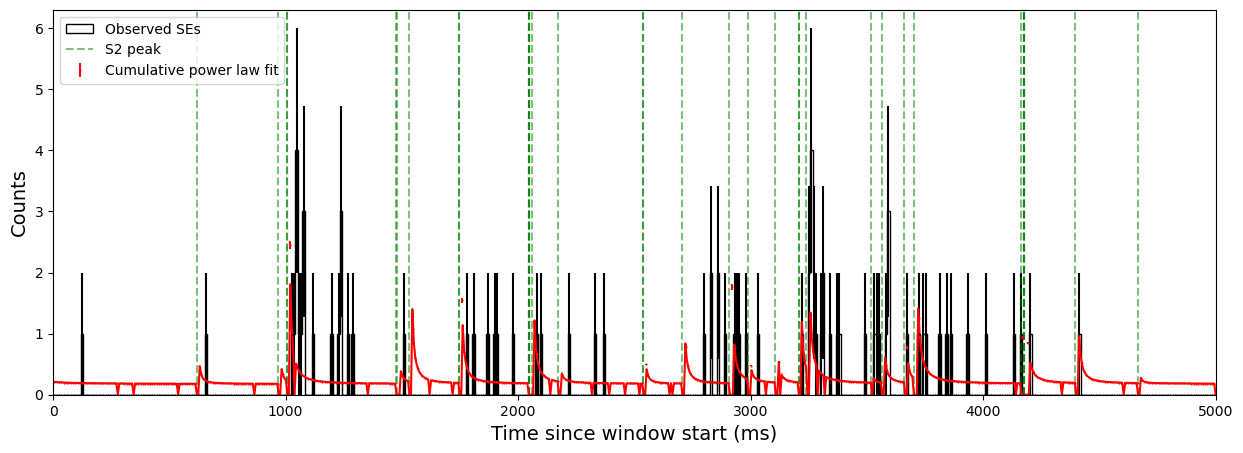

  Zoom region: 240.5 - 245.5 seconds within window
Running new


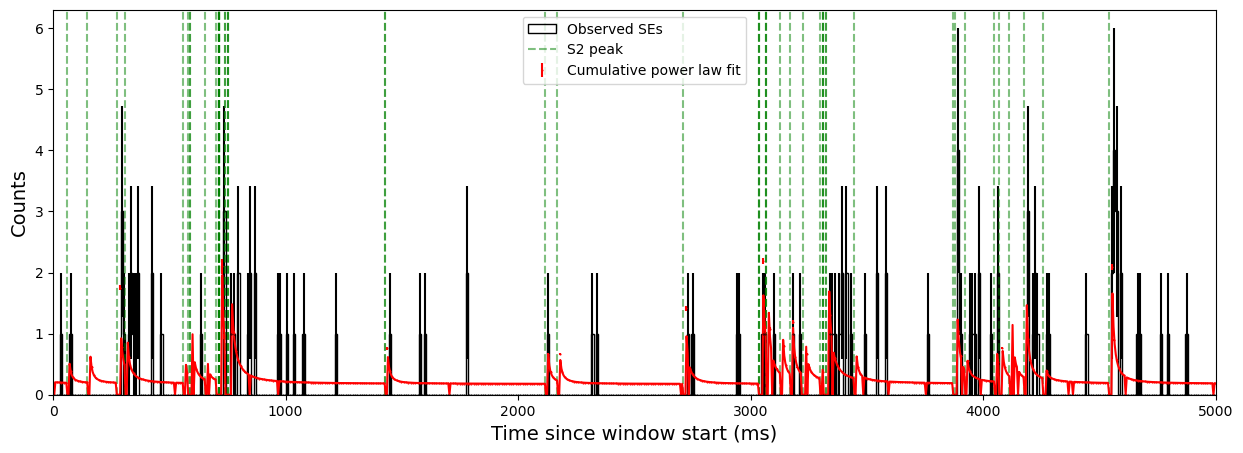

  Zoom region: 230.8 - 235.8 seconds within window
Running new


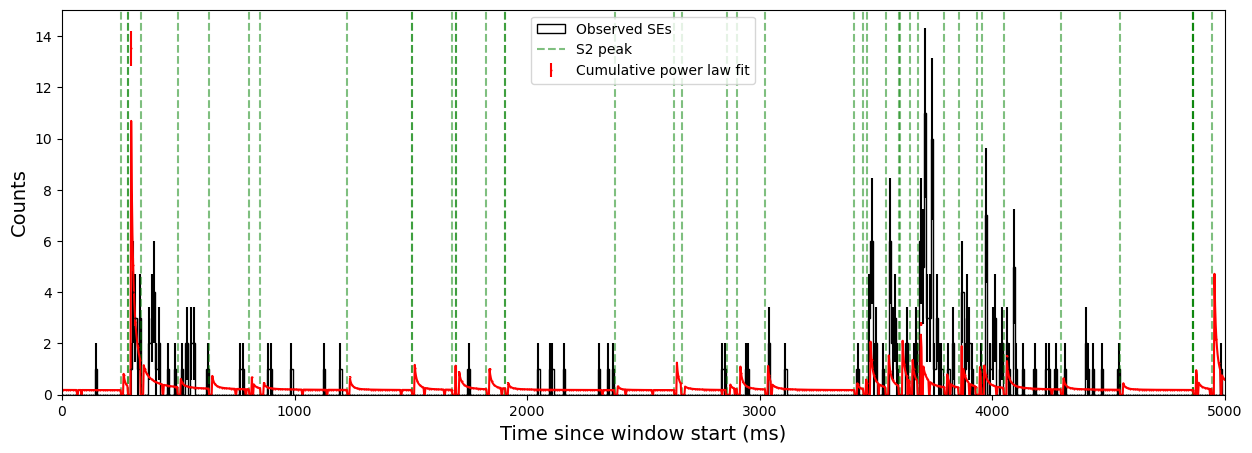

  Zoom region: 81.8 - 86.8 seconds within window
Running new


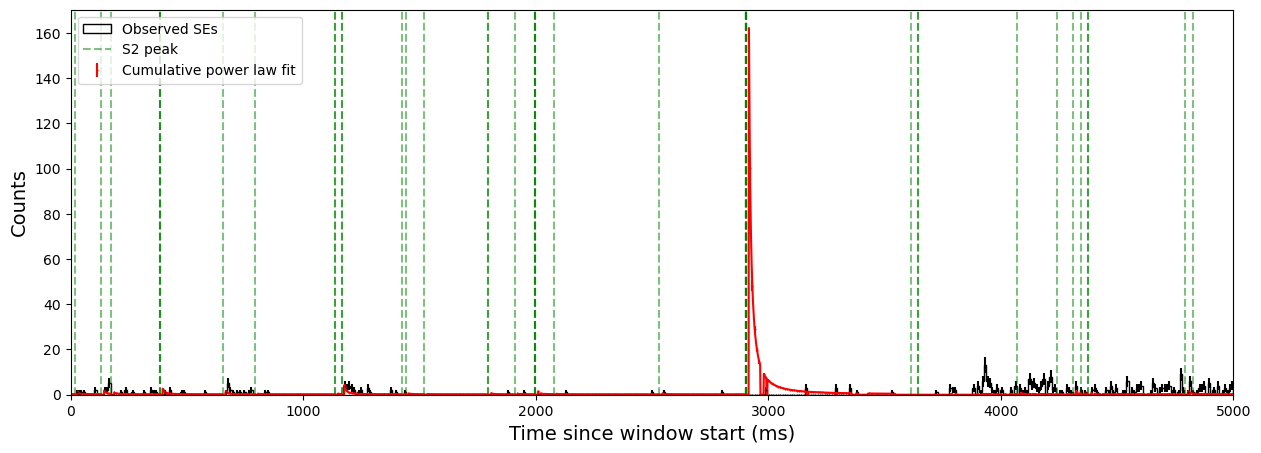

  Zoom region: 108.1 - 113.1 seconds within window
Running new


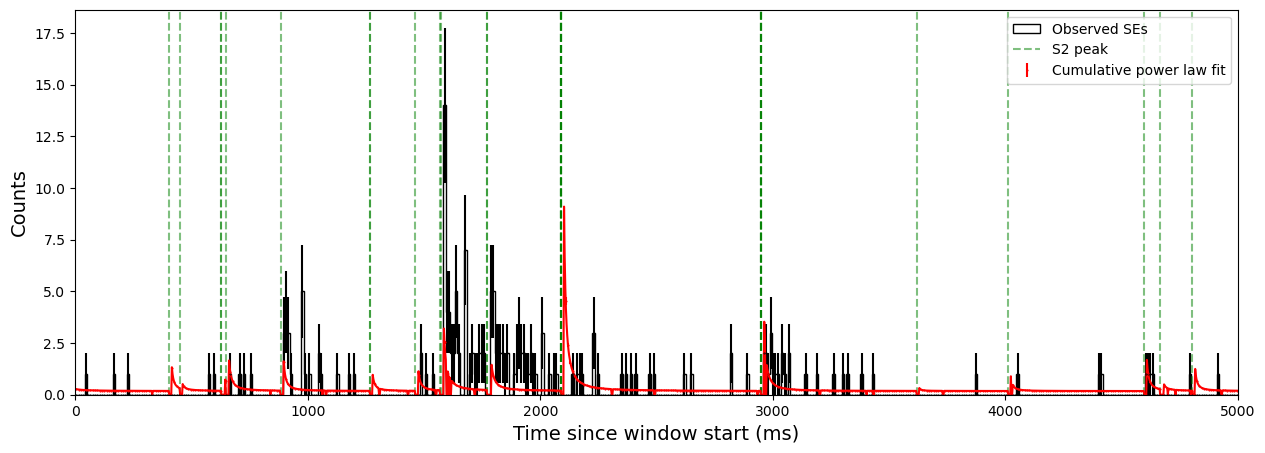

  Zoom region: 85.3 - 90.3 seconds within window
Running new


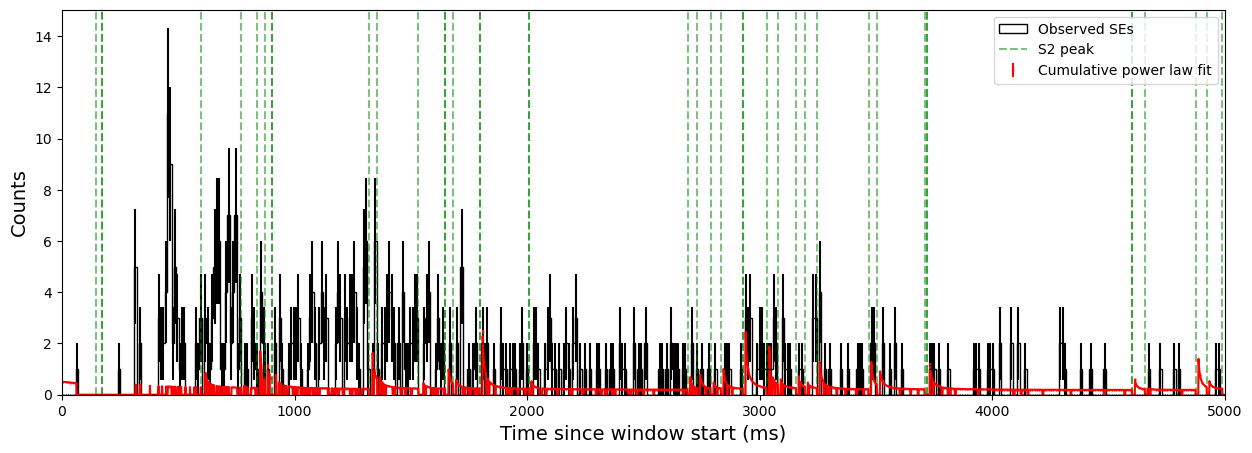

  Zoom region: 86.0 - 91.0 seconds within window
Running new


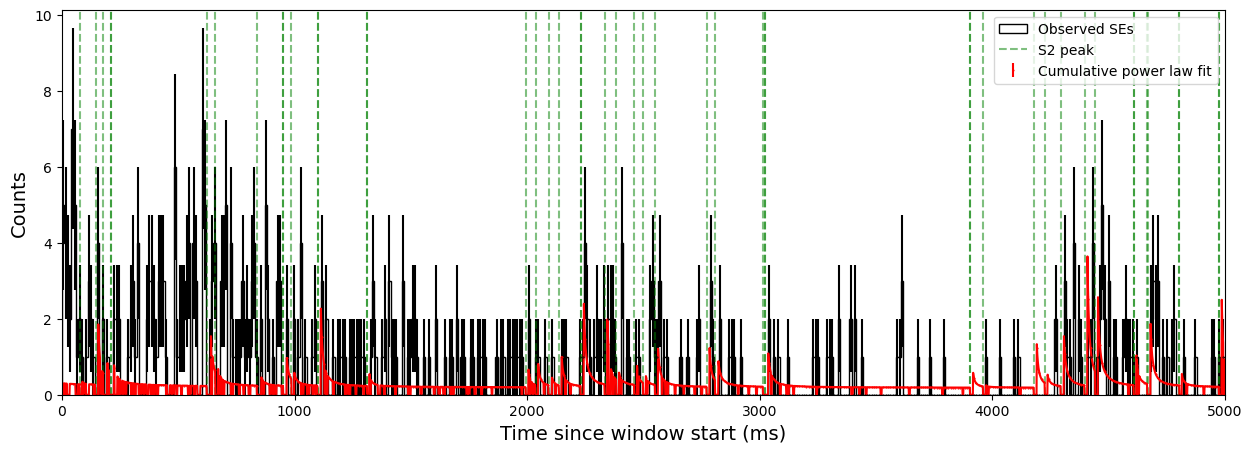

  Zoom region: 146.6 - 151.6 seconds within window
Running new


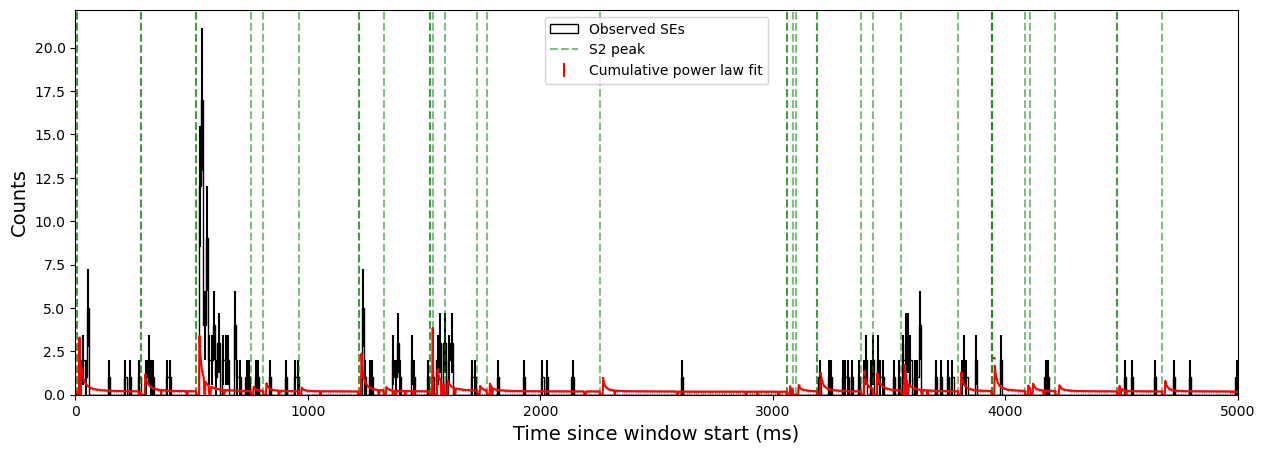

  Zoom region: 34.4 - 39.4 seconds within window
Running new


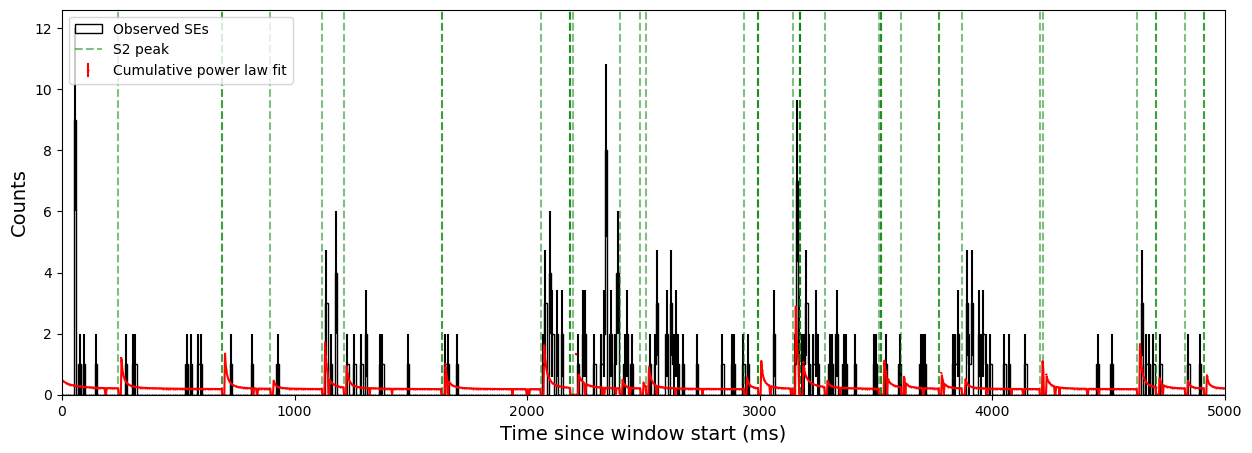

In [ ]:
#Create random selections of some windows, and plot them using mod.time_fitting
#Getting some example histogram model plots
import random
random.seed(48)
run_duration = (runs_df.iloc[0]['end'].value - runs_df.iloc[0]['start'].value)/1e9 #run 031693
window_size = 300 # seconds

for _ in range(4):
    start_sec = random.uniform(10, run_duration - window_size) #Avoid start of run by a small bit
    end_sec = start_sec + window_size
    print(f"\nRandom 300s window: {start_sec:.1f} - {end_sec:.1f} seconds")
    vals, cov, _, _, _ = mod.time_fitting(runs_df.iloc[0], pS2s_93_ku, DEs_93_ku, seconds_range = (start_sec, end_sec), plot = False, model = 'old')
    vals_new, cov_new, _, _, _ = mod.time_fitting(runs_df.iloc[0], pS2s_93, DEs_93, S1s_93['time_since_start'], seconds_range = (start_sec, end_sec), plot = False, model = 'new')
    vals_radial, cov_radial, _, _, _ = mod.time_fitting(runs_df.iloc[0], pS2s_93, DEs_93[DEs_93['r'] < 45], S1s_93['time_since_start'], seconds_range = (start_sec, end_sec), plot = False, model = 'radial')

    pS2s_region = pS2s_93_ku[(pS2s_93_ku['time_since_start'] >= start_sec*1e3) & (pS2s_93_ku['time_since_start'] <= end_sec*1e3)]
    DEs_region = DEs_93_ku[(DEs_93_ku['time_since_start'] >= start_sec*1e3) & (DEs_93_ku['time_since_start'] <= end_sec*1e3)]
    pS2s_region_new = pS2s_93[(pS2s_93['time_since_start'] >= start_sec*1e3) & (pS2s_93['time_since_start'] <= end_sec*1e3)]
    DEs_region_new = DEs_93[(DEs_93['time_since_start'] >= start_sec*1e3) & (DEs_93['time_since_start'] <= end_sec*1e3)]
    S1_region = S1s_93[(S1s_93['time_since_start'] >= start_sec*1e3) & (S1s_93['time_since_start'] <= end_sec*1e3)]
    DEs_cut_region_new = DEs_region_new[DEs_region_new['r'] < 45]

    for _ in range(10):
        width = 5
        start_zoom = random.uniform(0, window_size - width)
        print(f"  Zoom region: {start_zoom:.1f} - {start_zoom + width:.1f} seconds within window")
        # print("Running old")
        # mod.cdf_plot(pS2s_region, DEs_region, S1_region['time_since_start'], vals, cov, model = 'old', seconds_range = (start_sec, end_sec), plot_zoom = (start_zoom, width))
        print("Running new")
        mod.cdf_plot(pS2s_region_new, DEs_region_new, S1_region['time_since_start'], vals_new, cov_new, model = 'new', seconds_range = (start_sec, end_sec), plot_zoom = (start_zoom, width))
        # print("Running radial")
        # mod.cdf_plot(pS2s_region_new, DEs_cut_region_new, S1_region['time_since_start'], vals_radial, cov_radial, model = 'radial', seconds_range = (start_sec, end_sec), plot_zoom = (start_zoom, width))

In [ ]:
# Load veto files for each run - we don't use them here though soz
import os
veto_dir = "C:/Users/conor/Documents/Github/Project/processed_data/"

vetos_list = []
for run_name in runs_df['name']:
    path = f"{veto_dir}/vetos_{run_name}.npy"
    if os.path.exists(path):
        vetos = np.load(path, allow_pickle=True)
    else:
        print(f"Warning: veto file missing for run {run_name}")
        vetos = np.array([], dtype=[('time','int64'),('endtime','int64')])
    vetos_list.append(vetos)

#I was going to include vetos in the calculations below, but the average veto size is so so small:
means = []
for v in [v for v in vetos_list if (len(v) > 0)]:
    mean = v['veto_interval'].mean()
    means.append(mean)
print("Average veto intervals (ns):", means)
print("Overall average veto interval (s):", np.mean(means)/1e9)
print("Largest veto interval (s):", max([v['veto_interval'].max() for v in vetos_list if (len(v) > 0)])/1e9)

#So basically I just figured they made no/a minor difference, sue me

Average veto intervals (ns): [31361743.125, 3191530.0, 103447053.33333333, 12724929.6875, 7263284.810126582, 7446789.323671497, 999980.0, 11920536.363636363, 7385390.0, 3096676.6666666665, 126928040.9090909]
Overall average veto interval (s): 0.02870599583809321
Largest veto interval (s): 0.48436251


In [ ]:
#Main random window testing loop
#Not particularly efficient but whatever
import random
random.seed(200)
save = input("Do you want to save the results to a file? (y/n): ")

path = "C:/Users/conor/Documents/Github/Project/new-data-11"

#Random windows between (10, run_duration - window_size):

window_sizes = [25, 50, 75, 100, 150, 200, 300, 400, 500, 625, 750, 900]#, 1000]  # seconds
n_random_windows = [50, 50, 50, 25, 25, 25, 10, 10, 10, 10, 10, 10]#, 5]  # Number of permutations for gof testing

# Initialize lists for each window size -- all deeply inefficient but who cares
model_vals_list_new = [[] for _ in window_sizes]
model_vals_list_old = [[] for _ in window_sizes]
model_vals_list_radial = [[] for _ in window_sizes]
model_vals_list_counting = [[] for _ in window_sizes]

covariance_list_new = [[] for _ in window_sizes]
covariance_list_old = [[] for _ in window_sizes]
covariance_list_radial = [[] for _ in window_sizes]
covariance_list_counting = [[] for _ in window_sizes]

totals_new = [[] for _ in window_sizes]
totals_old = [[] for _ in window_sizes]
totals_radial = [[] for _ in window_sizes]
totals_counting = [[] for _ in window_sizes]
real_totals = [[] for _ in window_sizes]
real_totals_ku = [[] for _ in window_sizes]
real_radial_totals = [[] for _ in window_sizes]
real_counting_totals = [[] for _ in window_sizes]

BIC_new_list = [[] for _ in window_sizes]
BIC_old_list = [[] for _ in window_sizes]
BIC_radial_list = [[] for _ in window_sizes]
BIC_counting_list = [[] for _ in window_sizes]

diff_rate_new_list = [[] for _ in window_sizes]
diff_rate_old_list = [[] for _ in window_sizes]
diff_rate_radial_list = [[] for _ in window_sizes]
diff_rate_counting_list = [[] for _ in window_sizes]

for i, window_size in enumerate(window_sizes):
    print(f"\n=== ANALYSING RANDOM WINDOWS OF SIZE {window_size}s ===")
    for _ in range(n_random_windows[i]):
        #Randomly choose a run to use: 
        run_idx = random.randint(0, len(runs_df) - 1)
        print(f"Using run: {runs_df['name'].iloc[run_idx]}")
        run_duration = (runs_df.iloc[run_idx]['end'].value - runs_df.iloc[run_idx]['start'].value)/1e9
        DEs = DEs_list[run_idx]
        pS2s = pS2s_list[run_idx]
        pS2s = (pS2s[~((pS2s['range_50p_area'] > 4e4) & (pS2s['area'] < 2e6))]) #roughly remove e-bursts
        S1s = S1s_list[run_idx]

        pS2s_ku = pS2s_ku_list[run_idx]
        DEs_ku = DEs_ku_list[run_idx]

        start_sec = random.uniform(10, run_duration - window_size)
        end_sec = start_sec + window_size

        # Fit models
        model_vals_new, cov_new, total_new, diff_rate_new, BIC_new = mod.time_fitting(
            runs_df.iloc[run_idx], pS2s, DEs, S1s['time_since_start'], 
            seconds_range=(start_sec, end_sec), plot=False, model = 'new'
        )

        DEs_cut = DEs[DEs['r'] <= 45]

        model_vals_r, cov_r, total_r, diff_rate_r, BIC_r = mod.time_fitting(
            runs_df.iloc[run_idx], pS2s, DEs_cut, S1s['time_since_start'], 
            seconds_range=(start_sec, end_sec), plot=False, model = 'radial'
        )

        model_vals_old, cov_old, total_old, diff_rate_old, BIC_old = mod.time_fitting(
            runs_df.iloc[run_idx], pS2s_ku, DEs_ku, 
            seconds_range=(start_sec, end_sec), plot=False,  model = 'old'
        )

        model_vals_counting, cov_counting, total_counting, diff_rate_counting, BIC_counting = mod.time_fitting(
            runs_df.iloc[run_idx], pS2s, DEs, S1s['time_since_start'],
            seconds_range=(start_sec, end_sec), plot=False, model = 'count'
        )

        # Get actual counts
        DE_reg = DEs[(DEs['time_since_start'] >= start_sec * 1e3) & (DEs['time_since_start'] <= end_sec * 1e3)]
        DE_reg_ku = DEs_ku[(DEs_ku['time_since_start'] >= start_sec * 1e3) & (DEs_ku['time_since_start'] <= end_sec * 1e3)]
        DEs_cut_reg = DEs_cut[(DEs_cut['time_since_start'] >= start_sec * 1e3) & (DEs_cut['time_since_start'] <= end_sec * 1e3)]
        DEs_reg_counting = np.repeat(DE_reg, DE_reg['n_electron_rec'])

        # Append to the correct sublist for this window size
        totals_new[i].append(total_new)
        totals_old[i].append(total_old)
        totals_radial[i].append(total_r)
        totals_counting[i].append(total_counting)
        real_totals[i].append(len(DE_reg))
        real_totals_ku[i].append(len(DE_reg_ku))
        real_radial_totals[i].append(len(DEs_cut_reg))
        real_counting_totals[i].append(len(DEs_reg_counting))

        BIC_new_list[i].append(BIC_new)
        BIC_old_list[i].append(BIC_old)
        BIC_radial_list[i].append(BIC_r)
        BIC_counting_list[i].append(BIC_counting)
        diff_rate_new_list[i].append(diff_rate_new)
        diff_rate_old_list[i].append(diff_rate_old)
        diff_rate_radial_list[i].append(diff_rate_r)
        diff_rate_counting_list[i].append(diff_rate_counting)

        model_vals_list_new[i].append(model_vals_new)
        model_vals_list_old[i].append(model_vals_old)
        model_vals_list_radial[i].append(model_vals_r)
        model_vals_list_counting[i].append(model_vals_counting)

        covariance_list_new[i].append(cov_new)
        covariance_list_old[i].append(cov_old)
        covariance_list_radial[i].append(cov_r)
        covariance_list_counting[i].append(cov_counting)

if save == 'y':
    model_vals_list_new_array = np.array(model_vals_list_new, dtype=object)
    model_vals_list_old_array = np.array(model_vals_list_old, dtype=object)
    model_vals_list_radial_array = np.array(model_vals_list_radial, dtype=object)
    model_vals_list_counting_array = np.array(model_vals_list_counting, dtype=object)

    np.save(path + "/model_vals_list_new.npy", model_vals_list_new_array)
    np.save(path + "/model_vals_list_old.npy", model_vals_list_old_array)
    np.save(path + "/model_vals_list_radial.npy", model_vals_list_radial_array)
    np.save(path + "/model_vals_list_counting.npy", model_vals_list_counting_array)

    cov_list_new_array = np.array(covariance_list_new, dtype=object)
    cov_list_old_array = np.array(covariance_list_old, dtype=object)
    cov_list_radial_array = np.array(covariance_list_radial, dtype=object)
    cov_list_counting_array = np.array(covariance_list_counting, dtype=object)

    np.save(path + "/covariance_list_new.npy", cov_list_new_array)
    np.save(path + "/covariance_list_old.npy", cov_list_old_array)
    np.save(path + "/covariance_list_radial.npy", cov_list_radial_array)
    np.save(path + "/covariance_list_counting.npy", cov_list_counting_array)

    totals_new_array = np.array(totals_new, dtype=object)
    totals_old_array = np.array(totals_old, dtype=object)
    totals_radial_array = np.array(totals_radial, dtype=object)
    totals_counting_array = np.array(totals_counting, dtype=object)

    np.save(path + "/totals_new.npy", totals_new_array)
    np.save(path + "/totals_old.npy", totals_old_array)
    np.save(path + "/totals_radial.npy", totals_radial_array)
    np.save(path + "/totals_counting.npy", totals_counting_array)

    real_totals_array = np.array(real_totals, dtype=object)
    real_totals_ku_array = np.array(real_totals_ku, dtype=object)
    real_radial_totals_array = np.array(real_radial_totals, dtype=object)
    real_counting_totals_array = np.array(real_counting_totals, dtype=object)
        
    np.save(path + "/real_totals.npy", real_totals_array)
    np.save(path + "/real_totals_ku.npy", real_totals_ku_array)
    np.save(path + "/real_radial_totals.npy", real_radial_totals_array)
    np.save(path + "/real_counting_totals.npy", real_counting_totals_array)

    BIC_new_list_array = np.array(BIC_new_list, dtype=object)
    BIC_old_list_array = np.array(BIC_old_list, dtype=object)
    BIC_radial_list_array = np.array(BIC_radial_list, dtype=object)
    BIC_counting_list_array = np.array(BIC_counting_list, dtype=object)

    np.save(path + "/BIC_new.npy", BIC_new_list_array)
    np.save(path + "/BIC_old.npy", BIC_old_list_array)
    np.save(path + "/BIC_radial.npy", BIC_radial_list_array)
    np.save(path + "/BIC_counting.npy", BIC_counting_list_array)

    diff_rate_new_array = np.array(diff_rate_new_list, dtype=object)
    diff_rate_old_array = np.array(diff_rate_old_list, dtype=object)
    diff_rate_radial_array = np.array(diff_rate_radial_list, dtype=object)
    diff_rate_counting_array = np.array(diff_rate_counting_list, dtype=object)

    np.save(path + "/diff_rate_new.npy", diff_rate_new_array)
    np.save(path + "/diff_rate_old.npy", diff_rate_old_array)
    np.save(path + "/diff_rate_radial.npy", diff_rate_radial_array)
    np.save(path + "/diff_rate_counting.npy", diff_rate_counting_array)

    np.save(path + "/window_sizes.npy", window_sizes)


=== ANALYSING RANDOM WINDOWS OF SIZE 25s ===
Using run: 031693

------------------------------------------------------------------------------------------------------------------------

Running model: new
Running without DAQ vetos; cannot guarantee a clean fit.

This selection will incorporate 184 pS2s
Corresponding to the seconds range of: 1605 to 1630

Running the cost function now
minimization takes 0.2002 s
Minimisation Status: 
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3507                       │              Nfcn = 362              │
│ EDM = 3.71e-05 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├─────────────────────────────

### Some more interesting plots hopefully

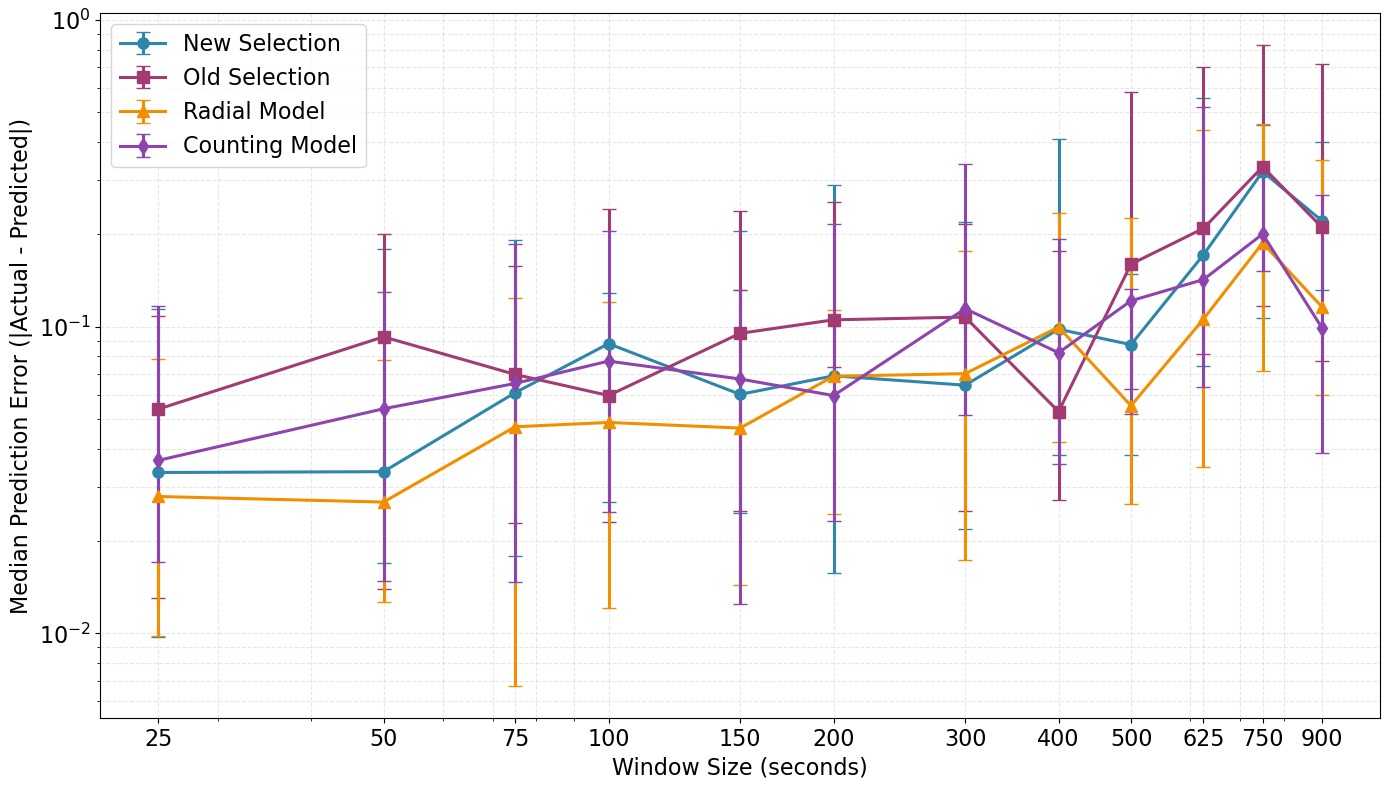

In [116]:
#Working totals plot

#I've realised these actually show nothing if they're all the same. 
# The electron counting one is only big because of the np.repeat cloning of electron times
# If we did that for the "true" totals we'd see much closer results again, basically identical to "new" selection I'd guess
import matplotlib.ticker as ticker

base = "C:/Users/conor/Documents/Github/Project/new-data-11/"

totals_new      = np.load(base + "totals_new.npy",      allow_pickle=True)
totals_old      = np.load(base + "totals_old.npy",      allow_pickle=True)
totals_radial   = np.load(base + "totals_radial.npy",   allow_pickle=True)
totals_counting = np.load(base + "totals_counting.npy", allow_pickle=True)

real_totals        = np.load(base + "real_totals.npy",        allow_pickle=True)
real_totals_ku     = np.load(base + "real_totals_ku.npy",     allow_pickle=True)
real_radial_totals = np.load(base + "real_radial_totals.npy", allow_pickle=True)
real_counting_totals = np.load(base + "real_counting_totals.npy", allow_pickle=True)

window_sizes = np.load(base + "window_sizes.npy", allow_pickle=True)

def robust_abs_error_stats(pred_list, obs_list):
    """
    For each window size:
      - compute err = |obs - pred| for all trials
      - return median(e) and [16th, 84th] spreads around the median - 1 sig
    """
    med, lo, hi = [], [], []
    for pred, obs in zip(pred_list, obs_list):
        err = np.abs(np.asarray(obs) - np.asarray(pred))
        p50 = np.median(err)
        p16 = np.percentile(err, 16)
        p84 = np.percentile(err, 84)
        med.append(p50)
        lo.append(p50 - p16)
        hi.append(p84 - p50)
    return np.array(med), np.array(lo), np.array(hi)

new_med, new_lo, new_hi = robust_abs_error_stats(totals_new, real_totals)
old_med, old_lo, old_hi = robust_abs_error_stats(totals_old, real_totals_ku)
rad_med, rad_lo, rad_hi = robust_abs_error_stats(totals_radial, real_radial_totals)
cnt_med, cnt_lo, cnt_hi = robust_abs_error_stats(totals_counting, real_counting_totals)


# Floor values for log plotting
eps = 1e-4 

def floor_for_log(y, lo, hi, eps=1e-4):
    """
    Ensure the plotted central value is >= eps.
    Adjust the lower asymmetric error so (y - lo_adj) >= eps.
    Upper error unchanged.
    Basically was having problems with the plot before this, looked bad cause log axis.
    """
    y_plot = np.maximum(y, eps)
    lo_adj = np.minimum(lo, y_plot - eps)  # keep positive lower cap
    lo_adj = np.maximum(lo_adj, 0.0)       # guard tiny negatives from numerical noise
    return y_plot, lo_adj, hi

new_y, new_lo_p, new_hi_p = floor_for_log(new_med, new_lo, new_hi, eps)
old_y, old_lo_p, old_hi_p = floor_for_log(old_med, old_lo, old_hi, eps)
rad_y, rad_lo_p, rad_hi_p = floor_for_log(rad_med, rad_lo, rad_hi, eps)
cnt_y, cnt_lo_p, cnt_hi_p = floor_for_log(cnt_med, cnt_lo, cnt_hi, eps)

# Plotting. Using these colours throughout
colours = {
    'new': '#2E86AB',
    'old': '#A23B72',
    'rad': '#F18F01',
    'cnt': '#8E44AD',
}

fig, ax = plt.subplots(figsize=(14, 8))

ax.errorbar(window_sizes, new_y, yerr=[new_lo_p, new_hi_p],
             marker='o', markersize=8, capsize=5, linewidth=2.2,
             color=colours['new'], label='New Selection')

ax.errorbar(window_sizes, old_y, yerr=[old_lo_p, old_hi_p],
             marker='s', markersize=8, capsize=5, linewidth=2.2,
             color=colours['old'], label='Old Selection')

ax.errorbar(window_sizes, rad_y, yerr=[rad_lo_p, rad_hi_p],
             marker='^', markersize=8, capsize=5, linewidth=2.2,
             color=colours['rad'], label='Radial Model')

ax.errorbar(window_sizes, cnt_y, yerr=[cnt_lo_p, cnt_hi_p],
             marker='d', markersize=8, capsize=5, linewidth=2.2,
             color=colours['cnt'], label='Counting Model')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks(window_sizes)
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')
ax.set_xlabel("Window Size (seconds)", fontsize=16)
ax.set_ylabel("Median Prediction Error (|Actual - Predicted|)", fontsize=16)
ax.grid(True, which='both', alpha=0.3, linestyle='--')
ax.legend(fontsize=16)
plt.tight_layout()
plt.show()


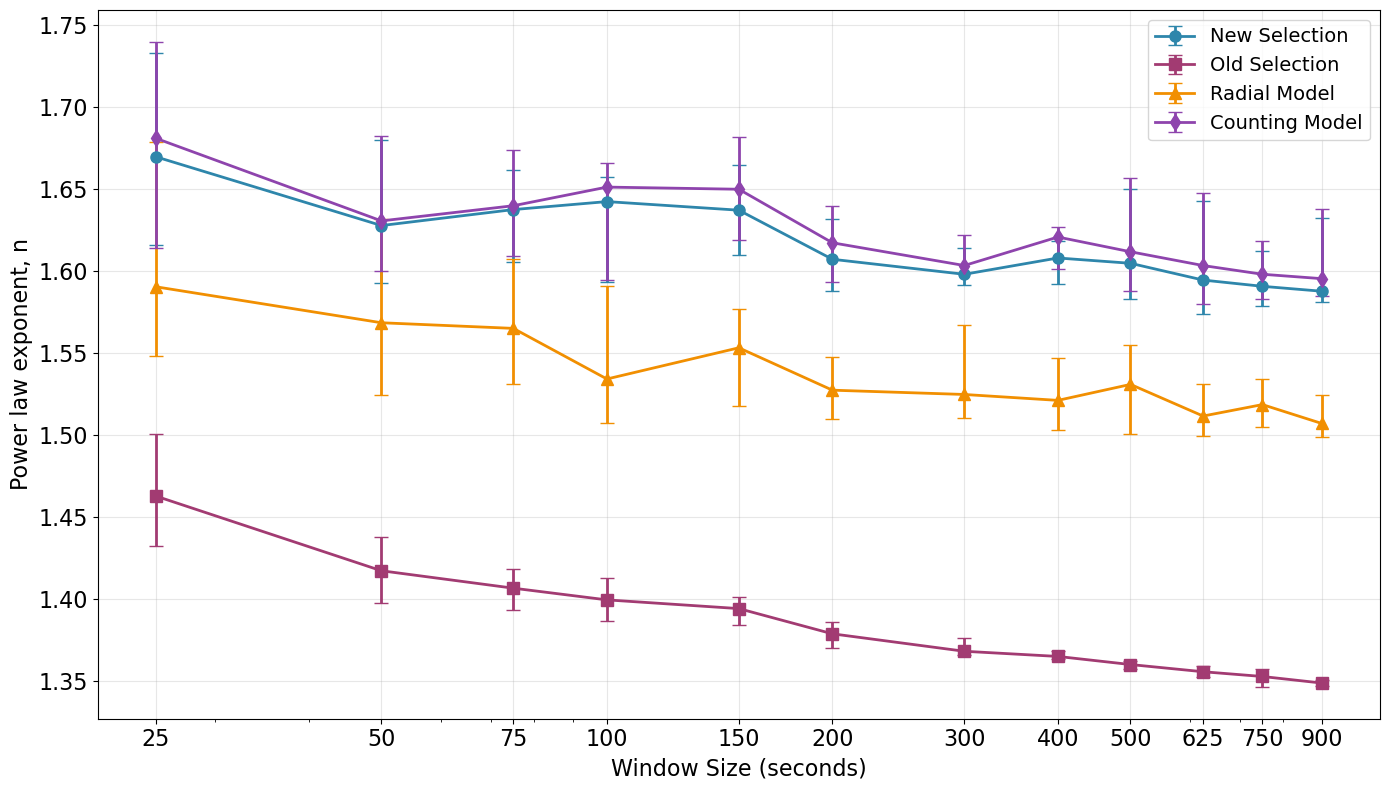

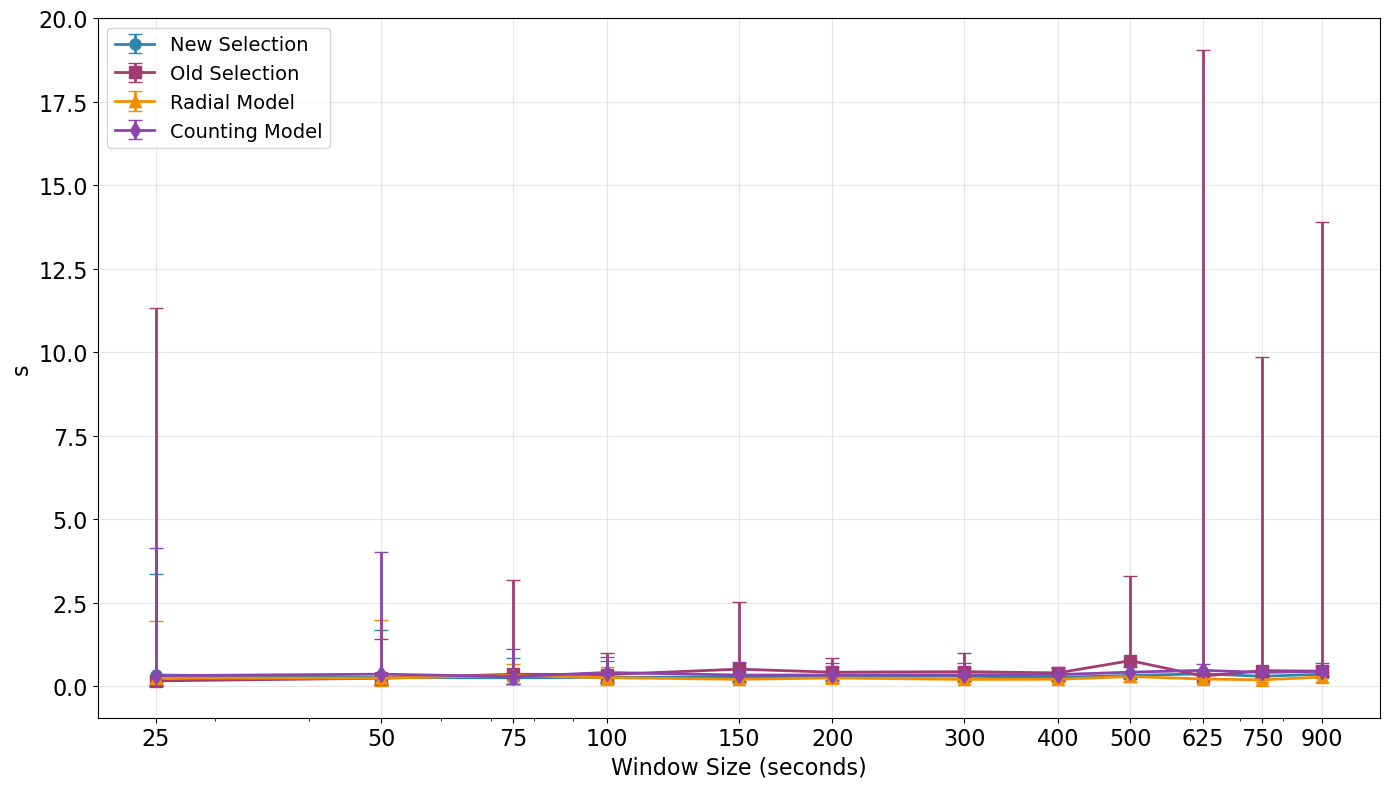

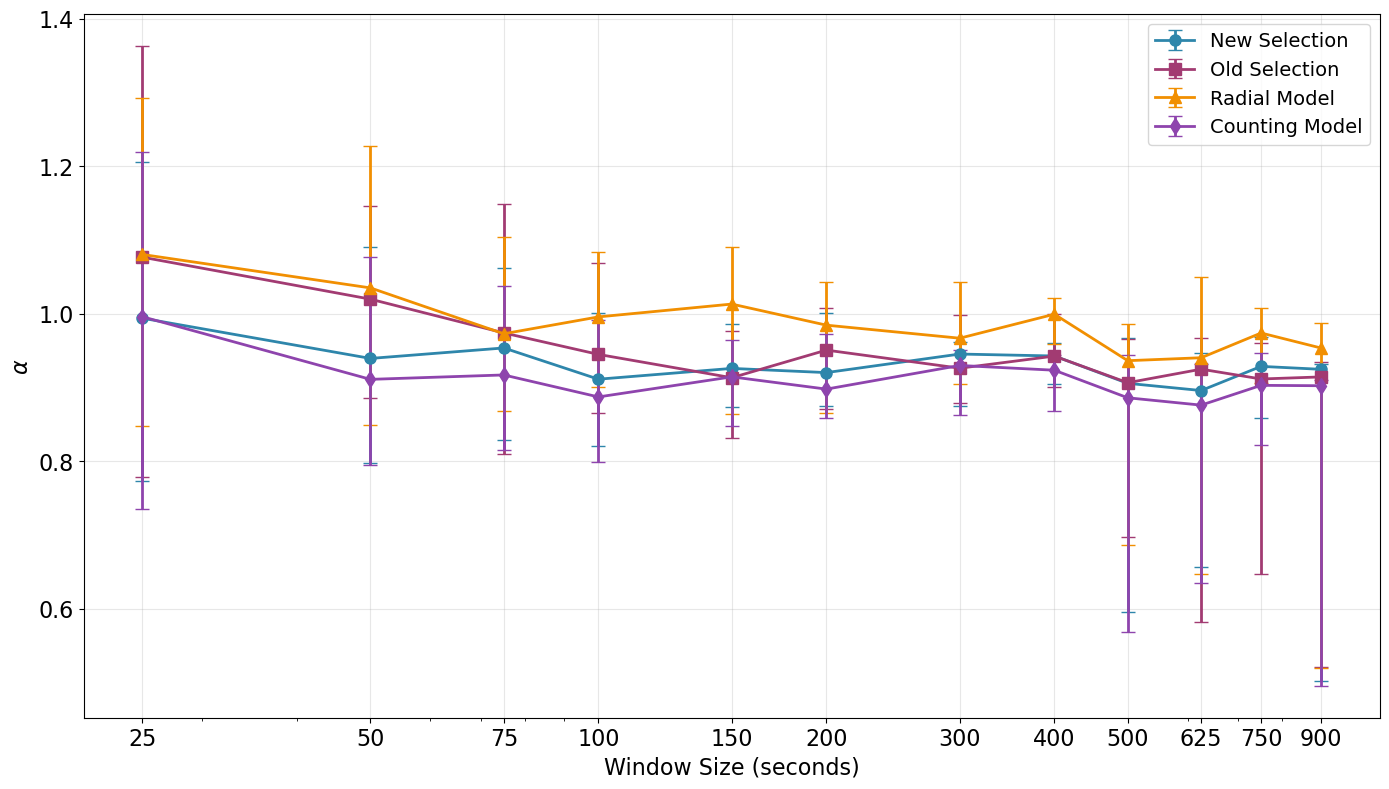

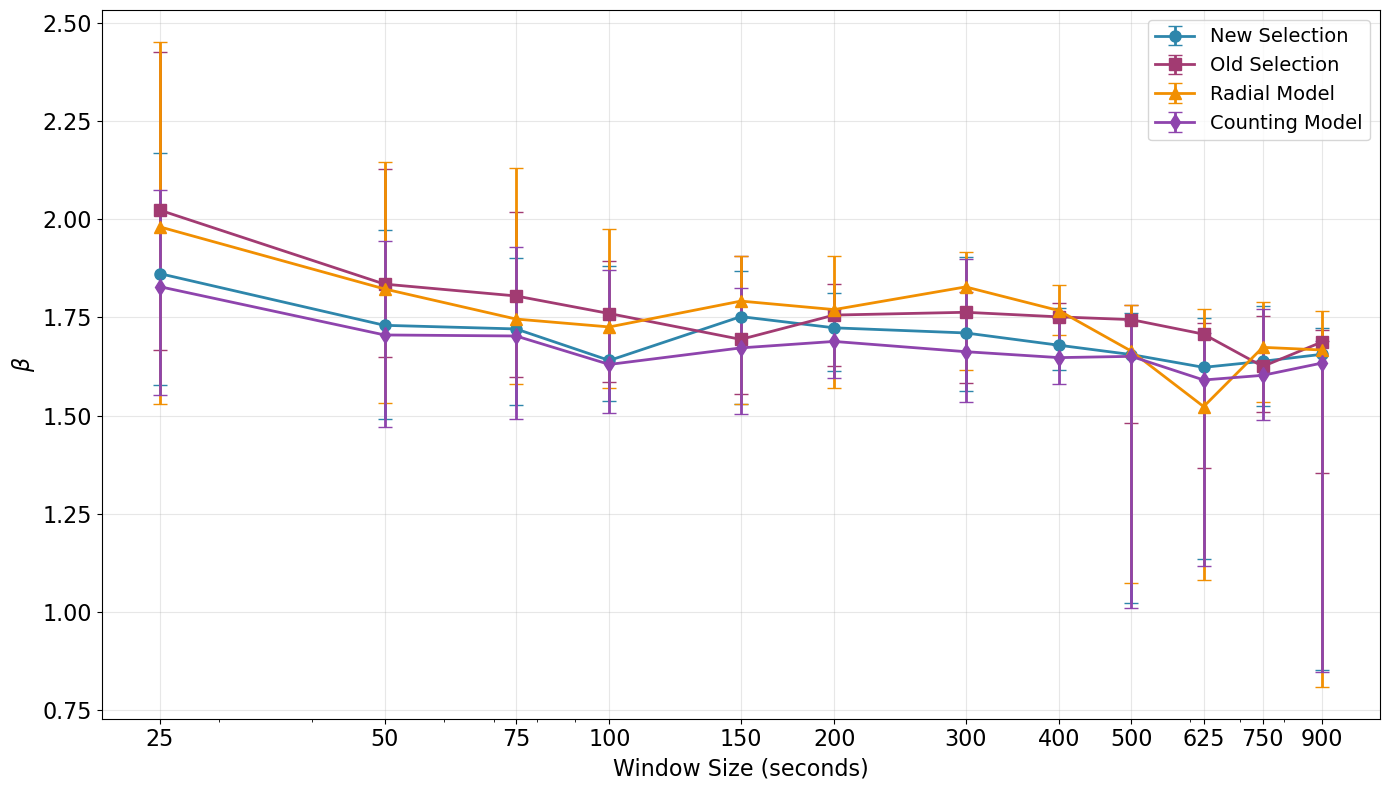

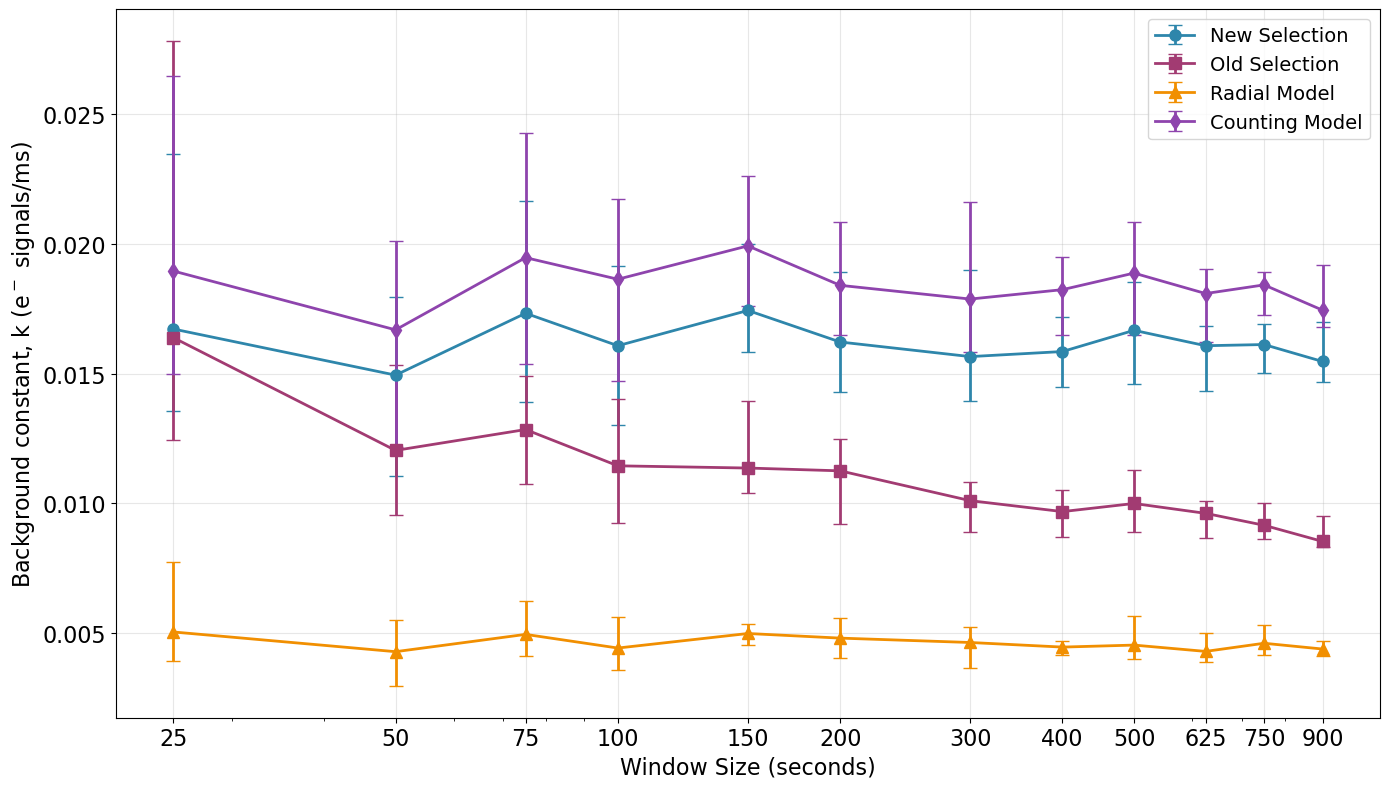

In [150]:
#Plotting model parameters vs window size

# Load data from wherever you saved it earlier
base = "C:/Users/conor/Documents/Github/Project/new-data-11/"

model_vals_list_new      = np.load(base + "model_vals_list_new.npy", allow_pickle=True)
model_vals_list_old      = np.load(base + "model_vals_list_old.npy", allow_pickle=True)
model_vals_list_radial   = np.load(base + "model_vals_list_radial.npy", allow_pickle=True)
model_vals_list_counting = np.load(base + "model_vals_list_counting.npy", allow_pickle=True)
window_sizes             = np.load(base + "window_sizes.npy", allow_pickle=True)

#Need this because model_vals_list_* is like 4 nested arrays or however I stupidly did it
def extract_param(df_like, param_name):
    """
    Extract a parameter value from the DataFrame-style array stored for each fit.
    df_like is something like: array([['Parameter','Value'], ...])
    Returns a float.
    """
    df = pd.DataFrame(df_like, columns=["Parameter", "Value"])
    row = df[df["Parameter"] == param_name]["Value"]
    if len(row) == 0:
        raise ValueError(f"Parameter {param_name} not found.")
    return float(row.values[0])

def compute_stats(model_vals_list, param_name):
    """
    For each window size, return:
        medians : median value
        low_err : median - 16th percentile
        high_err: 84th percentile - median
    """
    medians   = []
    low_errs  = []
    high_errs = []

    for fits_in_window in model_vals_list:
        vals = []
        for df_like in fits_in_window:
            vals.append(extract_param(df_like, param_name))

        vals = np.array(vals)

        med   = np.median(vals)
        p16   = np.percentile(vals, 16)
        p84   = np.percentile(vals, 84)

        medians.append(med)
        low_errs.append(med - p16)
        high_errs.append(p84 - med)

    return np.array(medians), np.array(low_errs), np.array(high_errs)


#Plotting (mostly) same as totals plot above
def plot_parameter_evolution_robust(window_sizes,
                                    model_vals_list_new,
                                    model_vals_list_old,
                                    model_vals_list_radial,
                                    param,
                                    param_name):

    new_med, new_low, new_high = compute_stats(model_vals_list_new, param)
    old_med, old_low, old_high = compute_stats(model_vals_list_old, param)
    rad_med, rad_low, rad_high = compute_stats(model_vals_list_radial, param)
    cnt_med, cnt_low, cnt_high = compute_stats(model_vals_list_counting, param)

    fig, ax = plt.subplots(figsize=(14, 8))

    # Errorbars using asymmetric uncertainty: (low_err, high_err)
    ax.errorbar(window_sizes, new_med, yerr=[new_low, new_high],
                 marker='o', capsize=5, label='New Selection',
                 color='#2E86AB', markersize=8, linewidth=2)

    ax.errorbar(window_sizes, old_med, yerr=[old_low, old_high],
                 marker='s', capsize=5, label='Old Selection',
                 color='#A23B72', markersize=8, linewidth=2)

    ax.errorbar(window_sizes, rad_med, yerr=[rad_low, rad_high],
                 marker='^', capsize=5, label='Radial Model',
                 color='#F18F01', markersize=8, linewidth=2)

    ax.errorbar(window_sizes, cnt_med, yerr=[cnt_low, cnt_high],
                 marker='d', capsize=5, label='Counting Model',
                 color='#8E44AD', markersize=8, linewidth=2)

    ax.set_xlabel("Window Size (seconds)", fontsize=16)
    ax.set_ylabel(fr"{param_name}", fontsize=16)
    ax.set_xscale('log')
    ax.set_xticks(window_sizes)
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.ticklabel_format(style='plain', axis='x') 
    # ax.set_title(f"Evolution of '{param_name}' with Window Size (median ± 16–84 percentile)")
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize = 14, loc = 'best')
    plt.tight_layout()
    plt.show()

#All params plots
param_names = ['Power law exponent, n', 's', r'$\alpha$', r'$\beta$', r'Background constant, k (e$^-$ signals/ms)']
for param, param_name in zip(['n', 's', 'c', 'd', 'k'], param_names):
    plot_parameter_evolution_robust(
        window_sizes,
        model_vals_list_new,
        model_vals_list_old,
        model_vals_list_radial,
        param,
        param_name
    )


In [119]:
#Calculate the median and 16th and 84th percentiles of the n parameter for each window size:
def compute_param_stats(model_vals_list, param_name):
    medians = []
    low_errs = []
    high_errs = []

    for fits_in_window in model_vals_list:
        vals = []
        for df_like in fits_in_window:
            vals.append(extract_param(df_like, param_name))

        vals = np.array(vals)

        med = np.median(vals)
        p16 = np.percentile(vals, 16)
        p84 = np.percentile(vals, 84)

        medians.append(med)
        low_errs.append(med - p16)
        high_errs.append(p84 - med)

    return np.array(medians), np.array(low_errs), np.array(high_errs)

n_new_med, n_new_low, n_new_high = compute_param_stats(model_vals_list_new, 'n')
n_old_med, n_old_low, n_old_high = compute_param_stats(model_vals_list_old, 'n')
n_rad_med, n_rad_low, n_rad_high = compute_param_stats(model_vals_list_radial, 'n')
n_cnt_med, n_cnt_low, n_cnt_high = compute_param_stats(model_vals_list_counting, 'n')

print("N Parameter Statistics by Window Size:")
print("New Model: Median = {}, 16th Percentile = {}, 84th Percentile = {}".format(n_new_med, n_new_low, n_new_high))
print("Old Model: Median = {}, 16th Percentile = {}, 84th Percentile = {}".format(n_old_med, n_old_low, n_old_high))
print("Radial Model: Median = {}, 16th Percentile = {}, 84th Percentile = {}".format(n_rad_med, n_rad_low, n_rad_high))
print("Counting Model: Median = {}, 16th Percentile = {}, 84th Percentile = {}".format(n_cnt_med, n_cnt_low, n_cnt_high))

#For 900 window size (final one), n +- errors:
window_idx = -1  # Last window size
print("\nN Parameter for 900s Window Size:")
print("New Model: n = {} +- {}".format(n_new_med[window_idx], (n_new_high[window_idx] + n_new_low[window_idx]) / 2))
print("Old Model: n = {} +- {}".format(n_old_med[window_idx], (n_old_high[window_idx] + n_old_low[window_idx]) / 2))
print("Radial Model: n = {} +- {}".format(n_rad_med[window_idx], (n_rad_high[window_idx] + n_rad_low[window_idx]) / 2))
print("Counting Model: n = {} +- {}".format(n_cnt_med[window_idx], (n_cnt_high[window_idx] + n_cnt_low[window_idx]) / 2))

#For 900s window size (final one), print k values too:
k_new_med, k_new_low, k_new_high = compute_param_stats(model_vals_list_new, 'k')
k_old_med, k_old_low, k_old_high = compute_param_stats(model_vals_list_old, 'k')
k_rad_med, k_rad_low, k_rad_high = compute_param_stats(model_vals_list_radial, 'k')
k_cnt_med, k_cnt_low, k_cnt_high = compute_param_stats(model_vals_list_counting, 'k')
print("\nK Parameter for 900s Window Size:")
print("New Model: k = {} +- {}".format(k_new_med[window_idx], (k_new_high[window_idx] + k_new_low[window_idx]) / 2))
print("Old Model: k = {} +- {}".format(k_old_med[window_idx], (k_old_high[window_idx] + k_old_low[window_idx]) / 2))
print("Radial Model: k = {} +- {}".format(k_rad_med[window_idx], (k_rad_high[window_idx] + k_rad_low[window_idx]) / 2))
print("Counting Model: k = {} +- {}".format(k_cnt_med[window_idx], (k_cnt_high[window_idx] + k_cnt_low[window_idx]) / 2))

N Parameter Statistics by Window Size:
New Model: Median = [1.66953892 1.62765204 1.63738516 1.64225087 1.637012   1.60709636
 1.597948   1.60789233 1.60465062 1.59442956 1.59061958 1.58762384], 16th Percentile = [0.05401808 0.03473777 0.03177765 0.04894964 0.02731693 0.01956258
 0.00634304 0.01572332 0.02196693 0.02044126 0.01221587 0.00634356], 84th Percentile = [0.06354508 0.0522334  0.0242508  0.01515387 0.02765206 0.02462491
 0.01622189 0.01038252 0.04545391 0.04796751 0.02164424 0.04435921]
Old Model: Median = [1.46275951 1.41726071 1.40664548 1.39951374 1.39420609 1.37883074
 1.36819441 1.36504332 1.36010429 1.35571772 1.35282848 1.34882924], 16th Percentile = [0.030508   0.01960968 0.01325489 0.01272149 0.0102347  0.00842283
 0.00228426 0.00179105 0.00243046 0.00305251 0.00611192 0.00165292], 84th Percentile = [0.03793936 0.02073848 0.01187739 0.01305614 0.00702587 0.0070103
 0.00796748 0.00358254 0.00227706 0.00373996 0.00475507 0.00164312]
Radial Model: Median = [1.59033059 1

In [136]:
#Find alpha and beta for old selection at 900s window size:
c_old_med, c_old_low, c_old_high = compute_param_stats(model_vals_list_old, 'c')
d_old_med, d_old_low, d_old_high = compute_param_stats(model_vals_list_old, 'd')
print("\nAlpha and Beta Parameters for Old Model at 900s Window Size:") 
print("Old Model: alpha = {} +- {}, beta = {} +- {}".format(
    c_old_med[window_idx], (c_old_high[window_idx] + c_old_low[window_idx]) / 2,
    d_old_med[window_idx], (d_old_high[window_idx] + d_old_low[window_idx]) / 2))


Alpha and Beta Parameters for Old Model at 900s Window Size:
Old Model: alpha = 0.9141163187642585 +- 0.206451960182859, beta = 1.6870865042771337 +- 0.18126752356355347


In [138]:
#Random calculation of alpha and beta weights in model
area_cont = np.log(pS2s_93_ku['area'].max() / pS2s_93_ku['area'].min())
width_cont = np.log(pS2s_93_ku['range_50p_area'].max() / pS2s_93_ku['range_50p_area'].min())

#From 900s window
alpha = 0.914
beta = 1.687

print(area_cont*alpha)
print(width_cont*beta)

print((width_cont*beta)/(area_cont*alpha))

#Fairly similarly effective then, area a little higher weight if anything

5.245906964302063
8.593954238891602
1.638220863879727


### Permutation Testing

In [ ]:
#Working permutation testing

#Some of this AI-assisted because numba was annoying

from numba import njit, prange
import matplotlib.ticker as ticker
from tqdm import tqdm

# ---------------------- CONFIG ----------------------
BASE = "C:/Users/conor/Documents/Github/Project/new-data-11/"
OUT  = "C:/Users/conor/Documents/Github/Project/permutation_testing_data/"
os.makedirs(OUT, exist_ok=True)

MAX_WINDOW = 900        # run windows <= 900 s
N_PERM     = 1000        # permutations per window
NBINS_CDF  = 2500       # CDF grid

# ---------------------- LOAD -----------------------
mv_new      = np.load(BASE + "model_vals_list_new.npy",      allow_pickle=True)
mv_old      = np.load(BASE + "model_vals_list_old.npy",      allow_pickle=True)
mv_radial   = np.load(BASE + "model_vals_list_radial.npy",   allow_pickle=True)
mv_counting = np.load(BASE + "model_vals_list_counting.npy", allow_pickle=True)
window_sizes= np.load(BASE + "window_sizes.npy",             allow_pickle=True)

# Must already exist in your workspace:
#   DEs_list, pS2s_list, S1s_list, DEs_ku_list, pS2s_ku_list, runs_df
assert 'DEs_list'     in globals()
assert 'pS2s_list'    in globals()
assert 'S1s_list'     in globals()
assert 'DEs_ku_list'  in globals()
assert 'pS2s_ku_list' in globals()
assert 'runs_df'      in globals()

name_to_idx = {str(runs_df['name'].iloc[i]): i for i in range(len(runs_df))}

@njit(cache=False)
def _compute_norms_basic(s, c, d, areas, ranges):
    return s * (areas ** c) * (ranges ** d)

@njit(cache=False)
def _compute_norms_radial(s, c, d, A, r0, r_p, areas, ranges, r):
    return s * (areas ** c) * (ranges ** d) * (1.0 / (1.0 + np.exp(A*(r - r0)/r_p)))

@njit(cache=False)
def _cdf_scalar(x, tmin, n):
    # same as manual_cdf for a scalar x; avoids tiny array allocations
    return 0.0 if x < tmin else 1.0 - (tmin / x) ** (n - 1.0)

# ---------------------- dead-time checks (binary search) ----------------------

@njit(cache=False)
def _last_leq(arr, x):
    """Index of last element <= x in sorted arr, or -1 if none."""
    lo = 0
    hi = arr.size - 1
    idx = -1
    while lo <= hi:
        mid = (lo + hi) // 2
        if arr[mid] <= x:
            idx = mid
            lo = mid + 1
        else:
            hi = mid - 1
    return idx

@njit(cache=False)
def _in_dead_s2(t, s2_t, tmin):
    """s2_t must be sorted ascending. True if t in any [s2, s2+tmin]."""
    if s2_t.size == 0:
        return False
    idx = _last_leq(s2_t, t)
    if idx == -1:
        return False
    # If the nearest s2 at/before t is within tmin, we're inside an S2 dead zone
    return (t - s2_t[idx]) <= tmin

@njit(cache=False)
def _in_dead_s1(t, s1_t):
    """s1_t must be sorted ascending. True if t in any [s1, s1+4.6]."""
    if s1_t.size == 0:
        return False
    idx = _last_leq(s1_t, t)
    if idx == -1:
        return False
    return (t - s1_t[idx]) <= 4.6

@njit(cache=False, parallel=True, fastmath=True)
def powerlaw_pdf_basic(t, s, n, tmin, c, d, k,
                       s2_t, s2_area, s2_rng,
                       s1_t_sorted):
    norms = _compute_norms_basic(s, c, d, s2_area, s2_rng)
    pdf   = np.full(t.size, k)
    scale = (n - 1.0) / tmin

    # Active times: add correlated contribution where not dead
    for i in prange(t.size):
        ti = t[i]
        if _in_dead_s2(ti, s2_t, tmin) or _in_dead_s1(ti, s1_t_sorted):
            continue
        acc = 0.0
        for j in range(s2_t.size):
            dt = ti - s2_t[j]
            if dt > tmin:
                acc += norms[j] * scale * (dt/tmin)**(-n)
        pdf[i] += acc

    # Normalization correction
    cut = np.zeros(s2_t.size)
    for j in range(s2_t.size):
        up = _cdf_scalar(s2_t[j] + tmin, tmin, n)
        lo = _cdf_scalar(s2_t[j],         tmin, n)
        cut[j] = norms[j] * (up - lo)

    total_time = t[-1] - t[0]
    live = total_time
    # subtract dead time portions
    live -= s2_t.size * tmin
    live -= s1_t_sorted.size * 4.6
    if live < 0.0:
        live = 0.0

    total_rate = norms.sum() - cut.sum() + k*live
    return total_rate, pdf


@njit(cache=False, parallel=True, fastmath=True)
def powerlaw_pdf_radial(t, s, n, tmin, c, d, k,
                        A, r0, r_p,
                        s2_t, s2_area, s2_rng, s2_r,
                        s1_t_sorted):
    norms = _compute_norms_radial(s, c, d, A, r0, r_p, s2_area, s2_rng, s2_r)
    pdf   = np.full(t.size, k)
    scale = (n - 1.0) / tmin

    for i in prange(t.size):
        ti = t[i]
        if _in_dead_s2(ti, s2_t, tmin) or _in_dead_s1(ti, s1_t_sorted):
            continue
        acc = 0.0
        for j in range(s2_t.size):
            dt = ti - s2_t[j]
            if dt > tmin:
                acc += norms[j] * scale * (dt/tmin)**(-n)
        pdf[i] += acc

    cut = np.zeros(s2_t.size)
    for j in range(s2_t.size):
        up = _cdf_scalar(s2_t[j] + tmin, tmin, n)
        lo = _cdf_scalar(s2_t[j],         tmin, n)
        cut[j] = norms[j] * (up - lo)

    total_time = t[-1] - t[0]
    live = total_time
    live -= s2_t.size * tmin
    live -= s1_t_sorted.size * 4.6
    if live < 0.0:
        live = 0.0

    total_rate = norms.sum() - cut.sum() + k*live
    return total_rate, pdf

@njit(cache=False)
def _sample_powerlaw_basic(s, n, tmin, c, d, k,
                           s2_t, s2_area, s2_rng, s1_t_sorted,
                           start_ms, end_ms):
    out = []

    # Correlated component (Poisson per S2)
    for j in range(s2_t.size):
        lam = s * (s2_area[j]**c) * (s2_rng[j]**d)
        m = np.random.poisson(lam)
        if m > 0:
            delta = tmin * np.random.pareto(n-1.0, size=m)
            cand = s2_t[j] + delta
            for tval in cand:
                if tval <= s2_t[j] + tmin:
                    continue
                if tval < start_ms or tval > end_ms:
                    continue
                # fast dead-time check
                if _in_dead_s2(tval, s2_t, tmin):
                    continue
                if _in_dead_s1(tval, s1_t_sorted):
                    continue
                out.append(tval)

    # Uniform background via rejection in live-time
    total_time = end_ms - start_ms
    live = total_time - s2_t.size*tmin - s1_t_sorted.size*4.6
    if live < 0.0:
        live = 0.0
    b = np.random.poisson(k*live)

    if b > 0:
        draws = 0
        accepted = 0
        # modest cap for safety; does not bias unless live ~ 0 & k huge
        max_draws = 20*b + 200
        while accepted < b and draws < max_draws:
            draws += 1
            tval = start_ms + np.random.random()*(end_ms - start_ms)
            if _in_dead_s2(tval, s2_t, tmin):
                continue
            if _in_dead_s1(tval, s1_t_sorted):
                continue
            out.append(tval)
            accepted += 1

    return np.sort(np.array(out))


@njit(cache=False)
def _sample_powerlaw_radial(s, n, tmin, c, d, k,
                            A, r0, r_p,
                            s2_t, s2_area, s2_rng, s2_r, s1_t_sorted,
                            start_ms, end_ms):
    out = []

    for j in range(s2_t.size):
        lam = s * (s2_area[j]**c) * (s2_rng[j]**d) * (1.0/(1.0+np.exp(A*(s2_r[j]-r0)/r_p)))
        m = np.random.poisson(lam)
        if m > 0:
            delta = tmin * np.random.pareto(n-1.0, size=m)
            cand = s2_t[j] + delta
            for tval in cand:
                if tval <= s2_t[j] + tmin:
                    continue
                if tval < start_ms or tval > end_ms:
                    continue
                if _in_dead_s2(tval, s2_t, tmin):
                    continue
                if _in_dead_s1(tval, s1_t_sorted):
                    continue
                out.append(tval)

    total_time = end_ms - start_ms
    live = total_time - s2_t.size*tmin - s1_t_sorted.size*4.6
    if live < 0.0:
        live = 0.0
    b = np.random.poisson(k*live)

    if b > 0:
        draws = 0
        accepted = 0
        max_draws = 20*b + 200
        while accepted < b and draws < max_draws:
            draws += 1
            tval = start_ms + np.random.random()*(end_ms - start_ms)
            if _in_dead_s2(tval, s2_t, tmin):
                continue
            if _in_dead_s1(tval, s1_t_sorted):
                continue
            out.append(tval)
            accepted += 1

    return np.sort(np.array(out))

# ---------------------------------------------------
#                   UTILITY HELPERS
# ---------------------------------------------------

def _extract(df, key):
    for param, val in zip(df["Parameter"], df["Value"]):
        if param == key:
            return val
    raise KeyError(key)

def _select_times(arr, start_ms, end_ms):
    m = (arr['time_since_start'] >= start_ms) & (arr['time_since_start'] <= end_ms)
    return arr[m]

def _build_eval_grid(start_ms, end_ms, nbins=NBINS_CDF):
    return np.linspace(start_ms, end_ms, nbins)

@njit(cache=False)
def _empirical_cdf(sorted_times, eval_points):
    cdf = np.zeros(eval_points.size)
    n = sorted_times.size
    j = 0
    for i in range(eval_points.size):
        x = eval_points[i]
        while j < n and sorted_times[j] <= x:
            j += 1
        cdf[i] = j / max(n, 1)
    return cdf

# ---------------------------------------------------
#          MODEL PDF WRAPPER (handles OLD S1 logic)
# ---------------------------------------------------

def _model_pdf_on_grid(eval_points, df_params,
                       pS2s_win, s1_times_win,
                       is_radial):

    s  = float(_extract(df_params,'s'))
    n  = float(_extract(df_params,'n'))
    tmin = float(_extract(df_params,'tmin'))
    c  = float(_extract(df_params,'c'))
    d  = float(_extract(df_params,'d'))
    k  = float(_extract(df_params,'k'))

    # Prepare S2 inputs
    s2_t   = np.ascontiguousarray(pS2s_win['time_since_start'].astype(np.float64))
    s2_area= np.ascontiguousarray(pS2s_win['area'].astype(np.float64))
    s2_rng = np.ascontiguousarray((pS2s_win['range_50p_area']/1e6).astype(np.float64))

    # S1 times: old selection passes empty array; always sort for binary search
    s1_t = np.sort(np.ascontiguousarray(s1_times_win.astype(np.float64)))

    # RADIAL needs s2_r
    if not is_radial:
        _, pdf = powerlaw_pdf_basic(
            eval_points, s, n, tmin, c, d, k,
            s2_t, s2_area, s2_rng,
            s1_t
        )
    else:
        A  = float(_extract(df_params,'A'))
        r0 = float(_extract(df_params,'r0'))
        rp = float(_extract(df_params,'r_p'))
        s2_r = np.ascontiguousarray(pS2s_win['r'].astype(np.float64))

        _, pdf = powerlaw_pdf_radial(
            eval_points, s, n, tmin, c, d, k,
            A, r0, rp,
            s2_t, s2_area, s2_rng, s2_r,
            s1_t
        )

    pdf = np.clip(pdf, 0, None)
    ssum = pdf.sum()
    if ssum > 0:
        pdf /= ssum
    return pdf

# ---------------------------------------------------
#      SAMPLE WRAPPER (correct OLD/NEW S1 handling)
# ---------------------------------------------------

def _sample_from_model(df_params, pS2s_win, s1_times_win,
                       start_ms, end_ms, is_radial):

    s  = float(_extract(df_params,'s'))
    n  = float(_extract(df_params,'n'))
    tmin = float(_extract(df_params,'tmin'))
    c  = float(_extract(df_params,'c'))
    d  = float(_extract(df_params,'d'))
    k  = float(_extract(df_params,'k'))

    s2_t   = np.ascontiguousarray(pS2s_win['time_since_start'].astype(np.float64))
    s2_area= np.ascontiguousarray(pS2s_win['area'].astype(np.float64))
    s2_rng = np.ascontiguousarray((pS2s_win['range_50p_area']/1e6).astype(np.float64))
    s1_t   = np.sort(np.ascontiguousarray(s1_times_win.astype(np.float64)))

    if not is_radial:
        return _sample_powerlaw_basic(
            s, n, tmin, c, d, k,
            s2_t, s2_area, s2_rng, s1_t,
            start_ms, end_ms
        )
    else:
        A  = float(_extract(df_params,'A'))
        r0 = float(_extract(df_params,'r0'))
        rp = float(_extract(df_params,'r_p'))
        s2_r = np.ascontiguousarray(pS2s_win['r'].astype(np.float64))
        return _sample_powerlaw_radial(
            s, n, tmin, c, d, k,
            A, r0, rp,
            s2_t, s2_area, s2_rng, s2_r, s1_t,
            start_ms, end_ms
        )

# ---------------------------------------------------
#                      METRICS
# ---------------------------------------------------

def _metrics(obs_times_sorted, eval_points, model_pdf):
    model_cdf = np.cumsum(model_pdf)
    model_cdf /= max(model_cdf[-1], 1.0)

    obs_cdf = _empirical_cdf(obs_times_sorted, eval_points)

    ks = np.max(np.abs(obs_cdf - model_cdf))

    obs_pdf = np.diff(np.r_[0.0, obs_cdf])
    w_time = stats.wasserstein_distance(
        eval_points, eval_points,
        u_weights=obs_pdf,
        v_weights=model_pdf
    )

    draw_idx = np.random.choice(
        eval_points.size,
        size=max(obs_times_sorted.size, 2000),
        p=model_pdf
    )
    model_sample = eval_points[draw_idx]
    e = stats.energy_distance(obs_times_sorted, model_sample)

    return dict(ks=ks, wass_time=w_time, energy=e)

# ---------------------------------------------------
#                 SINGLE TRIAL FOR 1 WINDOW
# ---------------------------------------------------

def run_one_window_trial(mv_df, DEs, pS2s, S1s,
                         is_radial, n_perm=N_PERM, nbins=NBINS_CDF):
    run_name = _extract(mv_df, 'Run ID')
    start_s  = float(_extract(mv_df,'Start Time (s)'))
    end_s    = float(_extract(mv_df,'End Time (s)'))
    start_ms, end_ms = start_s*1e3, end_s*1e3

    se_win  = _select_times(DEs,  start_ms, end_ms)
    pS2_win = _select_times(pS2s, start_ms, end_ms)

    # OLD selection uses no S1 dead-time → pass empty array
    if S1s is None:
        s1_win = np.zeros(0, dtype=np.float64)
    else:
        m = (S1s['time_since_start'] >= start_ms) & (S1s['time_since_start'] <= end_ms)
        s1_win = S1s['time_since_start'][m].astype(np.float64)

    obs_times = se_win['time_since_start'].astype(np.float64)
    obs_times.sort()
    if obs_times.size < 3 or pS2_win.size == 0:
        return None

    eval_points = _build_eval_grid(start_ms, end_ms, nbins)
    model_pdf   = _model_pdf_on_grid(eval_points, mv_df, pS2_win, s1_win, is_radial)

    obs = _metrics(obs_times, eval_points, model_pdf)

    null = {k: np.zeros(n_perm) for k in obs.keys()}
    for b in range(n_perm):
        sim = _sample_from_model(mv_df, pS2_win, s1_win, start_ms, end_ms, is_radial)
        if sim.size == 0:
            for k in null: null[k][b] = np.nan
            continue
        sim.sort()
        m = _metrics(sim, eval_points, model_pdf)
        for k in null:
            null[k][b] = m[k]

    pvals, zscores = {}, {}
    for k in obs:
        vals = null[k]
        vals = vals[~np.isnan(vals)]
        if len(vals) == 0:
            pvals[k] = np.nan
            zscores[k] = np.nan
        else:
            pvals[k] = np.mean(vals >= obs[k])
            mu = np.mean(vals); sd = np.std(vals, ddof=1)
            zscores[k] = (obs[k] - mu)/sd if sd > 0 else np.nan

    return dict(run=run_name, start_s=start_s, end_s=end_s,
                n_obs=len(obs_times), obs=obs, null=null, pvals=pvals, z=zscores)

# ---------------------------------------------------
#                PER-MODEL DRIVER
# ---------------------------------------------------

def run_model_upto(mv_array, model_key, is_radial,
                   max_window=MAX_WINDOW, n_perm=N_PERM):
    results_by_ws = {}
    for iw, ws in enumerate(window_sizes):
        if ws > max_window:
            continue
        trials = mv_array[iw]
        out_ws = []
        print(f"\n=== {model_key.upper()} :: {ws}s :: {len(trials)} trials ===")

        for j in tqdm(range(len(trials)), desc=f"{model_key.upper()} {ws}s", leave=False):
            mv_df = trials[j]
            run_name = _extract(mv_df, 'Run ID')
            if run_name not in name_to_idx:
                continue
            ridx = name_to_idx[run_name]

            # Correct dataset routing
            if model_key == 'old':
                DEs  = DEs_ku_list[ridx]
                pS2s = pS2s_ku_list[ridx]
                S1s  = None  # no S1 dead-time for old selection
            elif is_radial:
                DEs  = DEs_list[ridx]
                DEs  = DEs[DEs['r'] < 45]  # radial cut on DEs
                pS2s = pS2s_list[ridx]
                S1s  = S1s_list[ridx]
            else:
                DEs  = DEs_list[ridx]
                pS2s = pS2s_list[ridx]
                S1s  = S1s_list[ridx]

            pack = run_one_window_trial(mv_df, DEs, pS2s, S1s,
                                        is_radial, n_perm=n_perm, nbins=NBINS_CDF)
            if pack is not None:
                out_ws.append(pack)

        results_by_ws[ws] = out_ws

    np.save(os.path.join(OUT, f"{model_key}_gof_upto_{max_window}s.npy"),
            results_by_ws, allow_pickle=True)
    return results_by_ws

# ---------------------------------------------------
#                  SUMMARY PLOTS (optional)
# ---------------------------------------------------

# ---------------------------------------------------
#                  RUN (enable what you need)
# ---------------------------------------------------

results = {}
results['new'] = run_model_upto(mv_new,      'new', is_radial=False,
                                max_window=MAX_WINDOW, n_perm=N_PERM)
results['old'] = run_model_upto(mv_old,      'old', is_radial=False,
                                max_window=MAX_WINDOW, n_perm=N_PERM)
results['rad'] = run_model_upto(mv_radial,   'rad', is_radial=True,
                                max_window=MAX_WINDOW, n_perm=N_PERM)
results['cnt'] = run_model_upto(mv_counting, 'cnt', is_radial=False,
                                max_window=MAX_WINDOW, n_perm=N_PERM)




=== NEW :: 25s :: 50 trials ===



=== NEW :: 50s :: 50 trials ===



=== NEW :: 75s :: 50 trials ===



=== NEW :: 100s :: 25 trials ===



=== NEW :: 150s :: 25 trials ===



=== NEW :: 200s :: 25 trials ===



=== NEW :: 300s :: 10 trials ===



=== NEW :: 400s :: 10 trials ===



=== NEW :: 500s :: 10 trials ===



=== NEW :: 625s :: 10 trials ===



=== NEW :: 750s :: 10 trials ===



=== NEW :: 900s :: 10 trials ===



=== OLD :: 25s :: 50 trials ===



=== OLD :: 50s :: 50 trials ===



=== OLD :: 75s :: 50 trials ===



=== OLD :: 100s :: 25 trials ===



=== OLD :: 150s :: 25 trials ===



=== OLD :: 200s :: 25 trials ===



=== OLD :: 300s :: 10 trials ===



=== OLD :: 400s :: 10 trials ===



=== OLD :: 500s :: 10 trials ===



=== OLD :: 625s :: 10 trials ===



=== OLD :: 750s :: 10 trials ===



=== OLD :: 900s :: 10 trials ===



=== RAD :: 25s :: 50 trials ===



=== RAD :: 50s :: 50 trials ===



=== RAD :: 75s :: 50 trials ===



=== RAD :: 100s :: 25 trials ===



=== RAD :: 150s :: 25 trials ===



=== RAD :: 200s :: 25 trials ===



=== RAD :: 300s :: 10 trials ===



=== RAD :: 400s :: 10 trials ===



=== RAD :: 500s :: 10 trials ===



=== RAD :: 625s :: 10 trials ===



=== RAD :: 750s :: 10 trials ===



=== RAD :: 900s :: 10 trials ===



=== CNT :: 25s :: 50 trials ===



=== CNT :: 50s :: 50 trials ===



=== CNT :: 75s :: 50 trials ===



=== CNT :: 100s :: 25 trials ===



=== CNT :: 150s :: 25 trials ===



=== CNT :: 200s :: 25 trials ===



=== CNT :: 300s :: 10 trials ===



=== CNT :: 400s :: 10 trials ===



=== CNT :: 500s :: 10 trials ===



=== CNT :: 625s :: 10 trials ===



=== CNT :: 750s :: 10 trials ===



=== CNT :: 900s :: 10 trials ===


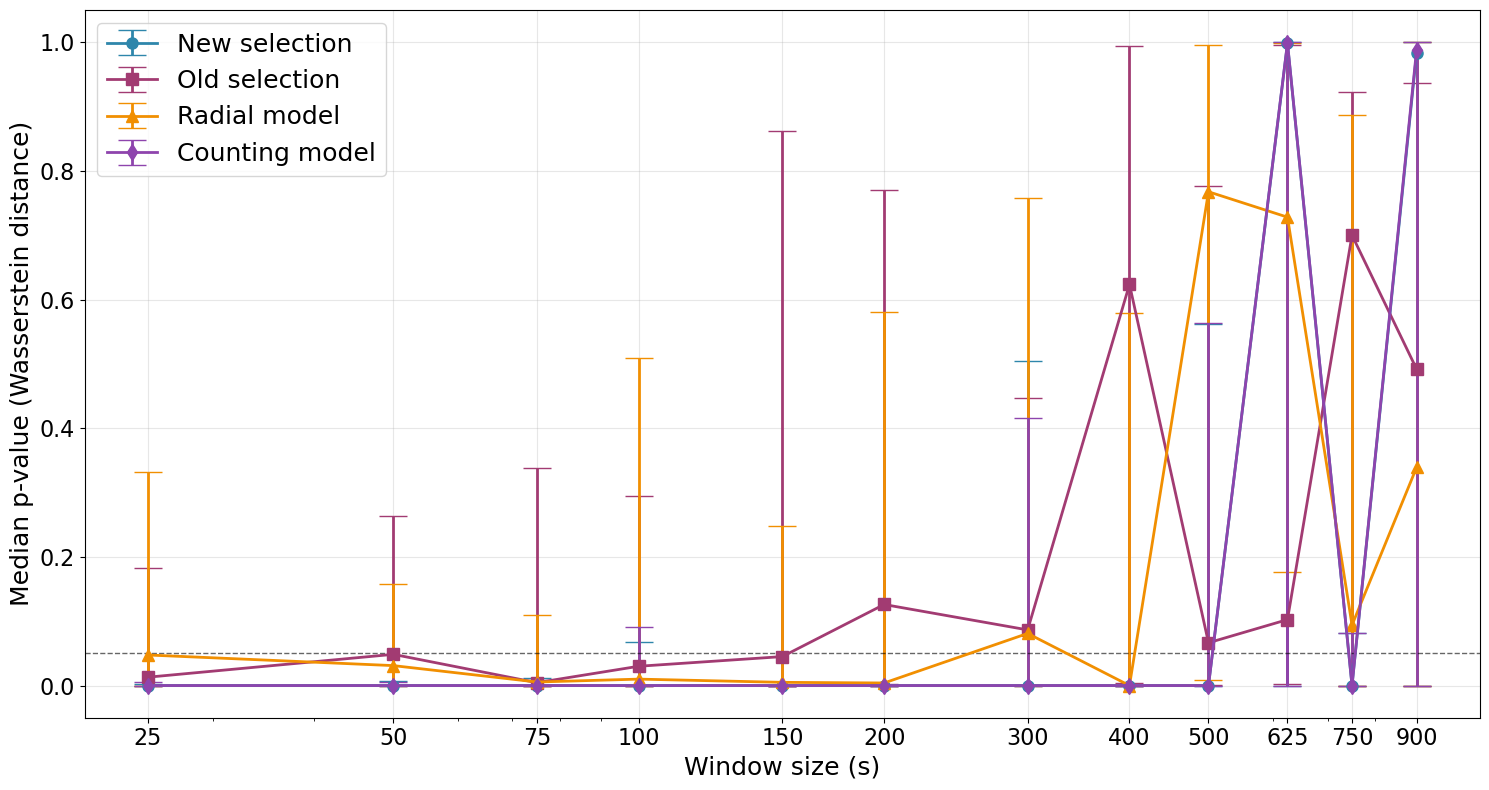

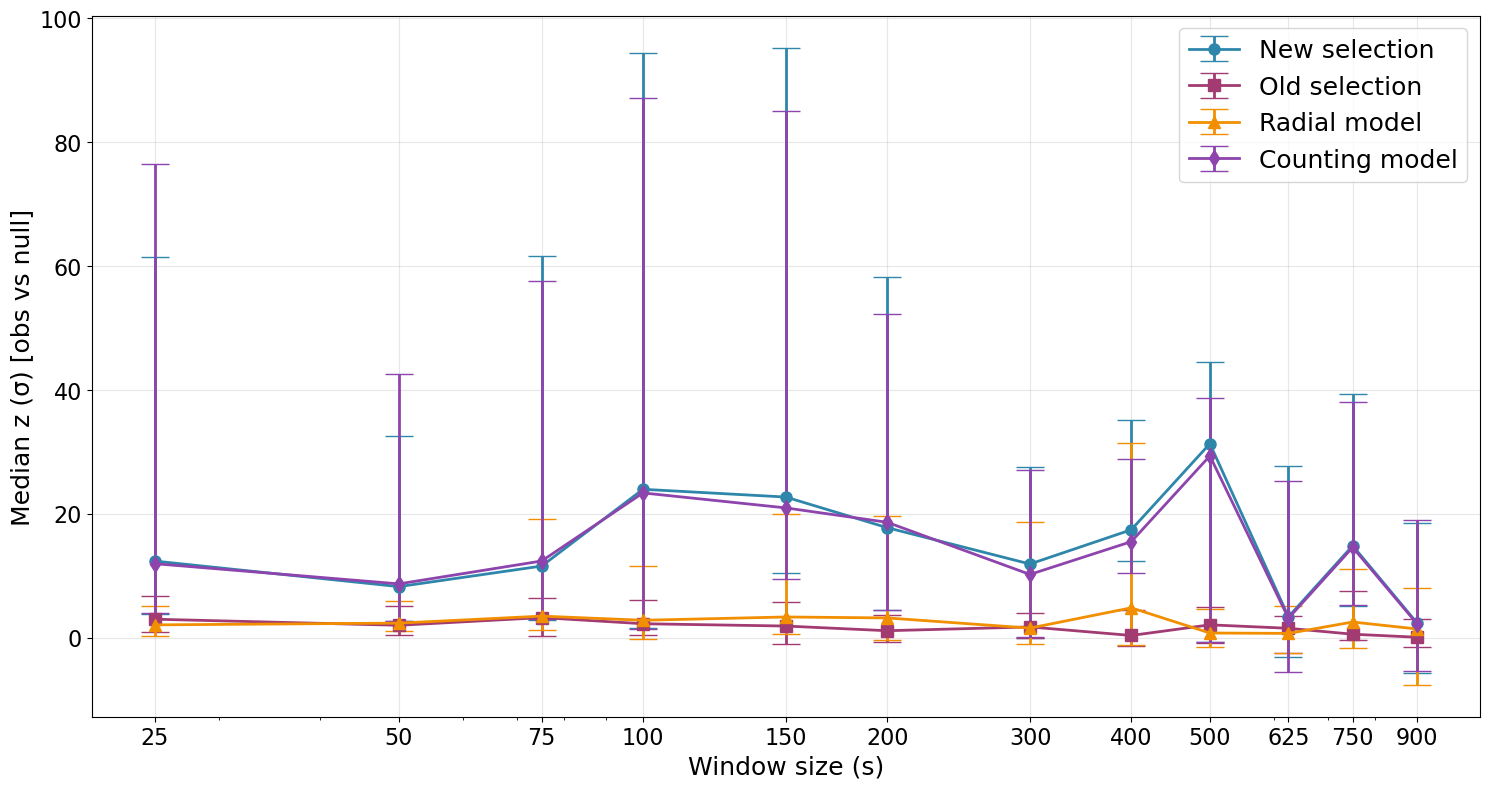

In [ ]:
#Permutation testing plotting

def summarise_with_errors(results_by_ws, key='pvals', metric='wass_time'):
    xs, meds, lo, hi = [], [], [], []

    for ws in sorted(results_by_ws.keys()):
        packs = results_by_ws[ws]
        if not packs:
            continue

        vals = [p[key][metric] for p in packs if not np.isnan(p[key][metric])]
        if len(vals) == 0:
            continue
        
        vals = np.array(vals)

        xs.append(ws)
        meds.append(np.median(vals))
        lo.append(np.percentile(vals, 16))   # 1σ lower
        hi.append(np.percentile(vals, 84))   # 1σ upper

    xs = np.array(xs)
    meds = np.array(meds)
    lo = np.array(lo)
    hi = np.array(hi)

    err_low  = meds - lo
    err_high = hi - meds

    return xs, meds, err_low, err_high


colours  = {'New selection':'#2E86AB','Old selection':'#A23B72','Radial model':'#F18F01','Counting model':'#8E44AD'}
markers = {'New selection':'o-','Old selection':'s-','Radial model':'^-','Counting model':'d-'}

results = {}

results['New selection'] = np.load(OUT + "new_gof_upto_900s.npy",      allow_pickle=True).item()
results['Old selection'] = np.load(OUT + "old_gof_upto_900s.npy",      allow_pickle=True).item()
results['Radial model'] = np.load(OUT + "rad_gof_upto_900s.npy",     allow_pickle=True).item()
results['Counting model'] = np.load(OUT + "cnt_gof_upto_900s.npy",    allow_pickle=True).item()

plt.figure(figsize=(15, 8))

for key in ['New selection','Old selection','Radial model', 'Counting model']: 
    xs_p, meds_p, errlo_p, errhi_p = summarise_with_errors(results[key], key = 'pvals', metric = 'wass_time')
    plt.errorbar(xs_p, meds_p, yerr = [errlo_p, errhi_p],
                    fmt = markers[key], lw = 2, capsize = 10, markersize = 8, color = colours[key], label=key)

plt.axhline(0.05, color='k', ls='--', lw=1, alpha=0.6) 
plt.xscale('log')
plt.xlabel("Window size (s)", fontsize=18)
plt.xticks(window_sizes) 
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter()) 
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel("Median p-value (Wasserstein distance)", fontsize=18) 
plt.grid(True, alpha=0.3)
plt.legend(fontsize=18)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(15, 8))

for key in ['New selection','Old selection','Radial model', 'Counting model']: 
    xs_z, meds_z, errlo_z, errhi_z = summarise_with_errors(results[key], key = 'z', metric = 'wass_time')
    plt.errorbar(xs_z, np.abs(meds_z), 
                yerr = [errlo_z, errhi_z],
                fmt = markers[key], lw = 2, capsize = 10, markersize = 8, color = colours[key], label = key)

plt.xscale('log')
plt.xlabel("Window size (s)", fontsize=18)
plt.xticks(window_sizes)
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel("Median z (σ) [obs vs null]", fontsize=18)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show() 